<a href="https://colab.research.google.com/github/sanchezluis5/TFM_2024/blob/main/TFM_VulnerabilidadHogares_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TRABAJO FINAL DEL MASTER UNIVERSITARIO EN BIG DATA Y CIENCIA DE DATOS**

--------------------------------------------------------------------------------------------------------------------------------------------

**Título**:"Índice de vulnerabilidad de los hogares peruanos mediante técnicas de estadística multivariante en el año 2022"

**Alumno**: Luis Alberto Sánchez Alvarado

--------------------------------------------------------------------------------------------------------------------------------------------



Este código ofrece una visión detallada de la metodología empleada en el análisis. Comienza con la lectura de datos del módulo seleccionado de la Encuesta Nacional de Hogares (ENAHO), específicamente del módulo "Características de la vivienda y el hogar". A continuación, se realiza un análisis exploratorio exhaustivo para comprender mejor las características de los datos, lo que incluye la imputación de casos perdidos mediante el algoritmo de k vecinos más cercanos. Posteriormente, se lleva a cabo un análisis multivariado, que emplea técnicas como los componentes principales categóricos, fundamentales para la creación del índice de vulnerabilidad. Seguidamente, se realiza un análisis de clúster que permite agrupar los departamentos y clasificarlos según su nivel de vulnerabilidad: baja, media o alta. Como complemento, se aplica un algoritmo de árboles de clasificación para reducir el número de variables y determinar si un hogar es vulnerable o no. En resumen, este código sirve como guía para que cualquier interesado en el tema pueda replicar el análisis

# 1 LECTURA DE LA BASE DE DATOS:

La Encuesta Nacional de Hogares (ENAHO) tiene como población objetivo a todas las viviendas particulares y a sus ocupantes residentes en áreas urbanas y rurales del país, convirtiéndose así en una fuente de datos de gran importancia para investigaciones como el estudio de la vulnerabilidad de los hogares. Para el presente trabajo, se utilizó el módulo de "Características de la vivienda y el hogar" de la última actualización disponible a la fecha de elaboración del análisis, que corresponde al año 2022. La base de datos se encuentra en el archivo BaseEnaho_2022.csv, y las variables que incluye son:

| Nombre de Variable | Etiqueta de variable | Escala | Objetivo |
| --- | --- | --- |--- |
| result | resultado final de la encuesta | Nominal| Sólo se quedara con completas e incompletas|
| estrato | Estrato geográfico | Nominal| Para formar el ámbito urbano /rural|
| p101 | Tipo de vivienda | Nominal |Se usará para el índice
| p102 | El material predominante en las paredes exteriores es | Nominal | Se usará para el índice
| p103 | El material predominante en los pisos es | Nominal | Se usará para el índice |
| p103a | El material predominante en los techos es | Nominal | Se usará para el índice |
| p110 | El agua que utilizan en el hogar | Nominal | Se usará para el índice
| p111a | El baño o servicio higiénico que tiene su hogar esta conectado a: | Nominal | Se usará para el índice
| p1121 | Tipo de alumbrado del hogar: Electricidad | Nominal | Se usará para el índice
| p1141| Su hogar tiene: Teléfono (fijo)  | Nominal | Se usará para el índice
| p1142 | Su hogar tiene: Teléfono Celular  | Nominal | Se usará para el índice
| p1143 | Su hogar tiene: Conexión a TV por cable o satelital | Nominal | Se usará para el índice
| p1144 | Su hogar tiene: Conexión a Internet | Nominal | Se usará para el índice
| ubigeo | Ubicación geográfica | Texto | Se usará para formar los departamentos
| factor07 | Factor de expansión | Continua | Sólo para sacar los descriptivos
| ingreso | Ingreso mensual del hogar | Continua | Sólo para categorizar variables del índice

A continuación se procede a leer la base de datos **BaseEnaho_2022.csv**:

In [ ]:
# Se lee el archivo que está en formato CSV
datos <- read.csv("BaseEnaho_2022.csv", header = TRUE, colClasses = c(UBIGEO = "character"))

In [ ]:
head(datos)

,FACTOR07,UBIGEO,RESULT,ESTRATO,P101,P102,P103,P103A,P110,P111A,P1121,P1141,P1142,P1143,P1144,Ingreso
,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,106.8902,010201,1,4,1,1,5,4,1,1,1,0,1,1,0,2883.870
2,106.8902,010201,1,4,1,1,2,4,1,1,1,0,1,1,1,6835.685
3,106.8902,010201,3,4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,106.8902,010201,1,4,1,1,6,4,1,1,1,0,1,0,1,2649.252
5,106.8902,010201,7,4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,106.8902,010201,1,4,1,1,5,1,1,1,1,0,1,1,0,2002.406


In [ ]:
#Se muestra la dimensión de la base cargada
dim(datos)

[1] 44122    16

Al revisar la base de datos, se observa que contiene las 16 variables planificadas y actualmente cuenta con 44,122 registros. Durante el preprocesamiento, se determinará si es necesario eliminar algunos registros.

# 2 PRE PROCESAMIENTO

**2.1 Registros con los que se trabajará**:

La base de datos también contiene registros con incidencias que no deben ser consideradas en el análisis, como rechazos, ausentes, viviendas desocupadas, entre otros. Según el Instituto Nacional de Estadística e Informática (INEI) del Perú, para obtener los indicadores de la ENAHO, solo se deben tomar en cuenta las encuestas completas e incompletas. Por lo tanto, se opta por seleccionar únicamente estas categorías de la variable 'result' (1=completa, 2=incompleta).


In [ ]:
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#Se crea el conjunto de datos"Base" que resulta de quedarnos con las encuestas completas e incompletas
library(dplyr)

# Crear el nuevo dataframe "Base" con los registros donde RESULT es igual a 1 o 2
Base <- datos %>%
  filter(RESULT %in% c(1,2))

# Verificar el nuevo dataframe "Base"
head(Base)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




,FACTOR07,UBIGEO,RESULT,ESTRATO,P101,P102,P103,P103A,P110,P111A,P1121,P1141,P1142,P1143,P1144,Ingreso
,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,106.8902,010201,1,4,1,1,5,4,1,1,1,0,1,1,0,2883.870
2,106.8902,010201,1,4,1,1,2,4,1,1,1,0,1,1,1,6835.685
3,106.8902,010201,1,4,1,1,6,4,1,1,1,0,1,0,1,2649.252
4,106.8902,010201,1,4,1,1,5,1,1,1,1,0,1,1,0,2002.406
5,106.8902,010201,1,4,1,3,5,4,1,1,1,0,1,1,0,3838.009
6,158.3513,010701,1,4,1,4,5,4,1,4,1,0,1,0,1,2632.216


In [ ]:
#Se revisa la dimensión de "Base"
dim(Base)

[1] 34213    16

Por lo tanto la base, al retirar los registros con incidencias se quedará con un total de 34 mil 213 hogares.

**2.2 Formando la variable "Departamento":**:

Uno de los objetivos principales del estudio es realizar un análisis detallado por departamentos. Para lograr esto, se empleará el UBIGEO, el cual es un código numérico utilizado en Perú para identificar diversas divisiones administrativas, tales como departamentos, provincias y distritos. Este código consta de seis dígitos, siendo los dos primeros los que representan el código del departamento. Por ejemplo, si el código comienza con 01, corresponde a Amazonas, y si empieza con 15, correspondería a Lima


In [ ]:
# Realizar la asignación basada en los códigos de departamento
Base$Departamento=substr(Base$UBIGEO,1,2)
Base$Departamento[Base$Departamento=="01"] <- "AMAZONAS"
Base$Departamento[Base$Departamento=="02"] <- "ANCASH"
Base$Departamento[Base$Departamento=="03"] <- "APURIMAC"
Base$Departamento[Base$Departamento=="04"] <- "AREQUIPA"
Base$Departamento[Base$Departamento=="05"] <- "AYACUCHO"
Base$Departamento[Base$Departamento=="06"] <- "CAJAMARCA"
Base$Departamento[Base$Departamento=="07"] <- "CALLAO"
Base$Departamento[Base$Departamento=="08"] <- "CUSCO"
Base$Departamento[Base$Departamento=="09"] <- "HUANCAVELICA"
Base$Departamento[Base$Departamento=="10"] <- "HUANUCO"
Base$Departamento[Base$Departamento=="11"] <- "ICA"
Base$Departamento[Base$Departamento=="12"] <- "JUNIN"
Base$Departamento[Base$Departamento=="13"] <- "LA LIBERTAD"
Base$Departamento[Base$Departamento=="14"] <- "LAMBAYEQUE"
Base$Departamento[Base$Departamento=="15"] <- "LIMA"
Base$Departamento[Base$Departamento=="16"] <- "LORETO"
Base$Departamento[Base$Departamento=="17"] <- "MADRE DE DIOS"
Base$Departamento[Base$Departamento=="18"] <- "MOQUEGUA"
Base$Departamento[Base$Departamento=="19"] <- "PASCO"
Base$Departamento[Base$Departamento=="20"] <- "PIURA"
Base$Departamento[Base$Departamento=="21"] <- "PUNO"
Base$Departamento[Base$Departamento=="22"] <- "SAN MARTIN"
Base$Departamento[Base$Departamento=="23"] <- "TACNA"
Base$Departamento[Base$Departamento=="24"] <- "TUMBES"
Base$Departamento[Base$Departamento=="25"] <- "UCAYALI"
# Verificar el resultado
head(Base)

,FACTOR07,UBIGEO,RESULT,ESTRATO,P101,P102,P103,P103A,P110,P111A,P1121,P1141,P1142,P1143,P1144,Ingreso,Departamento
,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>
1,106.8902,010201,1,4,1,1,5,4,1,1,1,0,1,1,0,2883.870,AMAZONAS
2,106.8902,010201,1,4,1,1,2,4,1,1,1,0,1,1,1,6835.685,AMAZONAS
3,106.8902,010201,1,4,1,1,6,4,1,1,1,0,1,0,1,2649.252,AMAZONAS
4,106.8902,010201,1,4,1,1,5,1,1,1,1,0,1,1,0,2002.406,AMAZONAS
5,106.8902,010201,1,4,1,3,5,4,1,1,1,0,1,1,0,3838.009,AMAZONAS
6,158.3513,010701,1,4,1,4,5,4,1,4,1,0,1,0,1,2632.216,AMAZONAS


**2.3 Formando la variable "Ambito":**:

Es común encontrar brechas de desarrollo entre las áreas urbanas y rurales. Por esta razón, resultaría interesante obtener resultados diferenciados según estos contextos. Por lo tanto, se propone la creación de la variable 'Ámbito', la cual clasificará las áreas según el número de habitantes. Según el INEI, se consideran localidades rurales aquellas con 2000 habitantes o menos, tal como se presenta a continuación:

| Código Variable | Etiqueta | Clasificación |
| --- | --- |--- |
| 1 | De 500 000 a más habitantes | Urbano
| 2 | De 100 000 a 499 999 habitantes | Urbano
| 3 | De 50 000 a 99 999 habitantes | Urbano
| 4 | De 20 000 a 49 999 habitantes | Urbano
| 5 | De 2 000 a 19 999 habitantes | Urbano
| 6 | De 500 a 1 999 habitantes | Rural
| 7 | Área de empadronamieto Rural compuesto | Rural
| 8 | Área de empadronamieto Rural simple | Rural

In [ ]:
#Se recodifica la variable "Estrato"
Base$Ambito[Base$ESTRATO <= 5] <- "Urbano"
Base$Ambito[Base$ESTRATO > 5] <- "Rural"

In [ ]:
#Se valida que se ha creado correctamente la variable
head(Base)

,FACTOR07,UBIGEO,RESULT,ESTRATO,P101,P102,P103,P103A,P110,P111A,P1121,P1141,P1142,P1143,P1144,Ingreso,Departamento,Ambito
,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<chr>
1,106.8902,010201,1,4,1,1,5,4,1,1,1,0,1,1,0,2883.870,AMAZONAS,Urbano
2,106.8902,010201,1,4,1,1,2,4,1,1,1,0,1,1,1,6835.685,AMAZONAS,Urbano
3,106.8902,010201,1,4,1,1,6,4,1,1,1,0,1,0,1,2649.252,AMAZONAS,Urbano
4,106.8902,010201,1,4,1,1,5,1,1,1,1,0,1,1,0,2002.406,AMAZONAS,Urbano
5,106.8902,010201,1,4,1,3,5,4,1,1,1,0,1,1,0,3838.009,AMAZONAS,Urbano
6,158.3513,010701,1,4,1,4,5,4,1,4,1,0,1,0,1,2632.216,AMAZONAS,Urbano


**2.4 Recodificación de las variables:**


Las variables disponibles están en una escala nominal, lo cual es una característica distintiva en comparación con otros índices. Por esta razón, para facilitar la interpretación del análisis de componentes principales categóricos que se realizará posteriormente, se llevarán a cabo recodificaciones. Estas recodificaciones se realizarán con el fin de asignar un sentido que vaya desde la menor vulnerabilidad hasta la mayor vulnerabilidad.

**2.4.1 Revisión de (p101) - Tipo de vivienda**

La variable cuenta con las siguientes categorías:

| Código Variable | Etiqueta |
| --- | --- |
| 1 | Casa independiente |
| 2 | Departamento en edificio |
| 3 | Vivienda en quinta |
| 4 | Vivienda en casa de vecindad |
| 5 | Choza o cabaña |
| 6 | Vivienda improvisada |
| 7 | Local no destinado para habilitación humana |
| 8 | Otro |




Se procede a trabajar un cuadro resumen de la variable:

In [ ]:
#Se define la variable que se trabajará
VariableTomar<-Base$P101

# Obtener las opciones de respuesta de la variable
opciones_respuesta <- unique(VariableTomar)

# Calcular el número de casos por opción de respuesta
num_casos <- aggregate(Base$Ingreso, by = list(VariableTomar), FUN = length)

# Calcular el promedio de ingreso por opción de respuesta
promedio_ingreso <- aggregate(Base$Ingreso, by = list(VariableTomar), FUN = mean)

# Renombrar las columnas de los resultados
names(num_casos) <- c("Opcion_respuesta", "Numero_casos")
names(promedio_ingreso) <- c("Opcion_respuesta", "Promedio_ingreso")

# Combinar los resultados en un nuevo dataframe
resultado <- merge(data.frame(Opcion_respuesta = opciones_respuesta), num_casos, by = "Opcion_respuesta")
resultado <- merge(resultado, promedio_ingreso, by = "Opcion_respuesta")

# Mostrar el dataframe resultado
resultado

Opcion_respuesta,Numero_casos,Promedio_ingreso
<int>,<int>,<dbl>
1,30406,3048.420
2,1576,5902.404
3,291,3893.492
4,1274,2217.611
5,300,1333.426
6,6,1352.236
7,1,2097.727


En este caso sólo se tiene un caso para el código 7 (local no destinado  para habilitación humana), por ello lo juntaremo con "vivienda improvisada" que bajo definición es el más cercano

In [ ]:
# Recodificar la variable P101
Base$P101 <- ifelse(Base$P101 == 7, 6, Base$P101)

Se vuelve a tener el cuadro de resumen de la variable, y ver que la recodificación fue hecha de manera correcta:

In [ ]:
#Se define la variable que se trabajará
VariableTomar<-Base$P101

# Obtener las opciones de respuesta de la variable
opciones_respuesta <- unique(VariableTomar)

# Calcular el número de casos por opción de respuesta
num_casos <- aggregate(Base$Ingreso, by = list(VariableTomar), FUN = length)

# Calcular el promedio de ingreso por opción de respuesta
promedio_ingreso <- aggregate(Base$Ingreso, by = list(VariableTomar), FUN = mean)

# Renombrar las columnas de los resultados
names(num_casos) <- c("Opcion_respuesta", "Numero_casos")
names(promedio_ingreso) <- c("Opcion_respuesta", "Promedio_ingreso")

# Combinar los resultados en un nuevo dataframe
resultado <- merge(data.frame(Opcion_respuesta = opciones_respuesta), num_casos, by = "Opcion_respuesta")
resultado <- merge(resultado, promedio_ingreso, by = "Opcion_respuesta")

# Mostrar el dataframe resultado
resultado

Opcion_respuesta,Numero_casos,Promedio_ingreso
<dbl>,<int>,<dbl>
1,30406,3048.420
2,1576,5902.404
3,291,3893.492
4,1274,2217.611
5,300,1333.426
6,7,1458.734


Se almacenan los promedios de ingreso de las categorías:

In [ ]:
#Se toma los valores de los promedio
valores_d<-resultado$Promedio_ingreso
valores_d

[1] 3048.420 5902.404 3893.492 2217.611 1333.426 1458.734

Se aplica un gráfico de codo para saber aproximadamente cuántos agrupaciones se deberán tomar:

In [ ]:
#Se instala el paquete para la parte gráfica
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



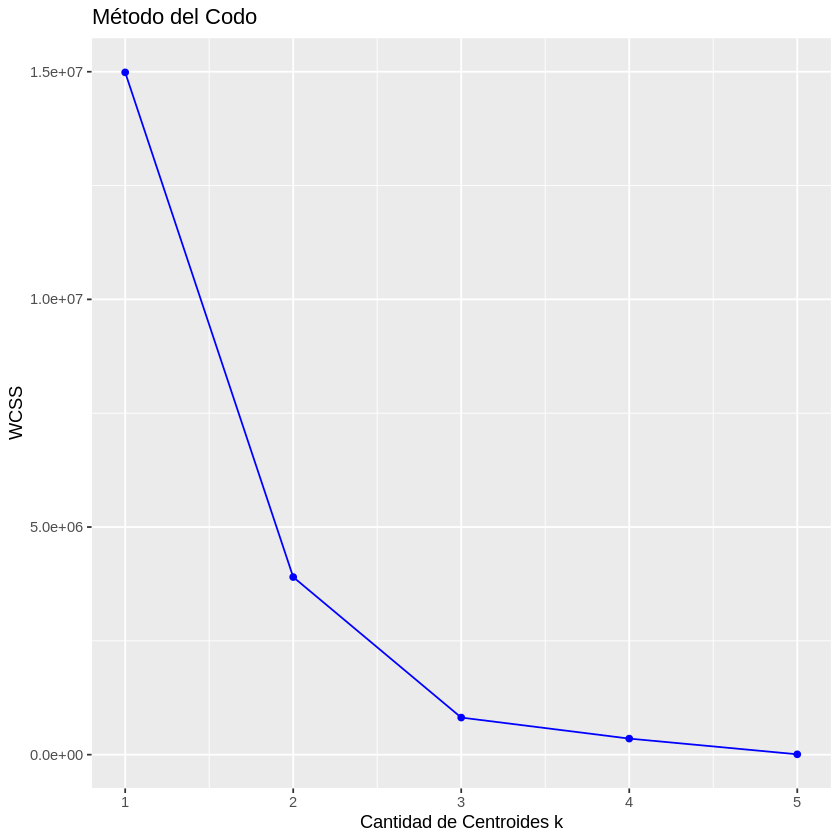

In [ ]:
wcss <- vector()
for(i in 1:5){
  wcss[i] <- sum(kmeans(valores_d, i)$withinss)
}
library(ggplot2)
ggplot() + geom_point(aes(x = 1:5, y = wcss), color = 'blue') +
  geom_line(aes(x = 1:5, y = wcss), color = 'blue') +
  ggtitle("Método del Codo") +
  xlab('Cantidad de Centroides k') +
  ylab('WCSS')

Se puede apreciar el el codo se da en 3 por lo tanto se tomará esta referencia y ver si hace sentido con la realidad, para ver las agrupaciones se usará un cluster jerárquico y su respectivo dendrograma:

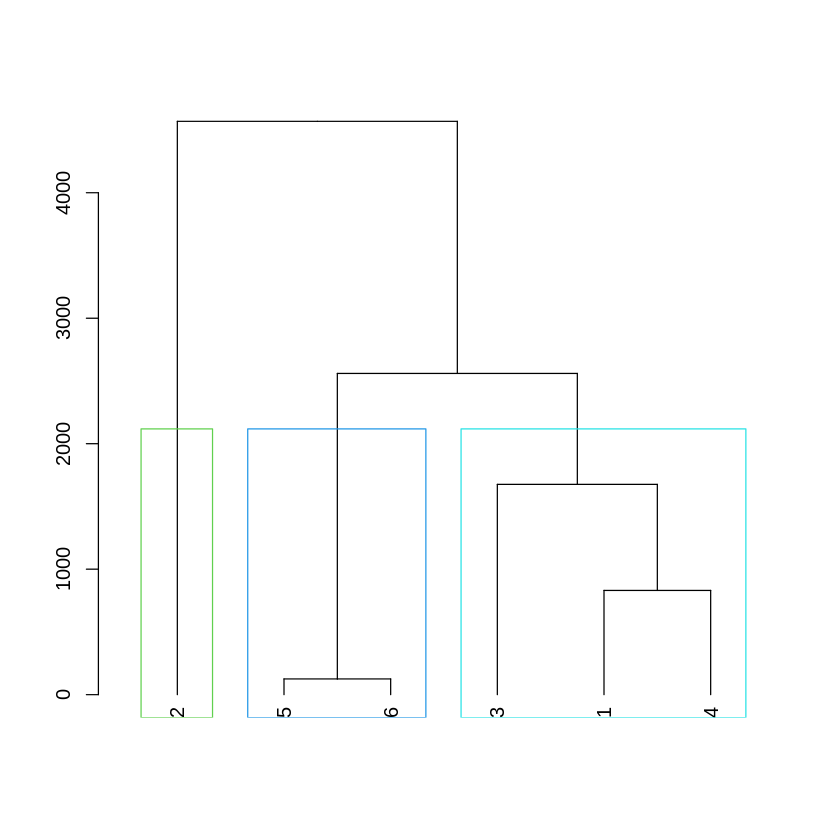

In [ ]:
#Se aplica el clúster jerárquico
# Matriz de distancias
d <- dist(valores_d)

# Clúster jerárquico
hc <- hclust(d)

# Dendrograma
plot(as.dendrogram(hc))
rect.hclust(hc, k = 3,
            border = 3:5)

Al revisar las agrupaciones la recodificación que se hará es:

| Código Variable | Etiqueta | Código nuevo |
| --- | --- |--- |
| 1 | Casa independiente | 2
| 2 | Departamento en edificio | 1
| 3 | Vivienda en quinta | 2
| 4 | Vivienda en casa de vecindad | 2
| 5 | Choza o cabaña | 3
| 6 | Vivienda improvisada | 3
| 7 | Local no destinado para habilitación humana |3


Se hace la recodificación ...


In [ ]:
#Haciendo el proceso de recodificación
Base$p101R<-Base$P101
Base$p101R[Base$P101==1] <- 2
Base$p101R[Base$P101==2] <- 1
Base$p101R[Base$P101==3] <- 2
Base$p101R[Base$P101==4] <- 2
Base$p101R[Base$P101==5] <- 3
Base$p101R[Base$P101==6] <- 3
Base$p101R[Base$P101==7] <- 3

In [ ]:
#Se verifica que se ha realizado la recodificación
table(Base$p101R)


    1     2     3 
 1576 31971   307 

Las categorías finales serán:

**P101R**: Tipo de vivienda

| Código  | Etiqueta |
| --- | --- |
| 1 | Departamento en edificio  |
| 2 | Casa independiente,Vivienda en quinta o vecindad  |
| 3 | Choza o cabaña   |






**2.4.2 Revisión de (p102) - El material predominante en las paredes exteriores**

La variable cuenta con las siguientes categorías:

| Código Variable | Etiqueta |
| --- | --- |
| 1 | Ladrillo o bloque de cemento |
| 2 | Piedra o sillar con cal o cemento |
| 3 | Adobe |
| 4 | Tapia |
| 5 | Quincha |
| 6 | Piedra con barro |
| 7 | Madera |
| 8 | Triplay |
| 9 | Otros |



Se ve un cuadro resumen de la variable:

In [ ]:
#Se define la variable que se trabajará
VariableTomar<-Base$P102

# Obtener las opciones de respuesta de la variable
opciones_respuesta <- unique(VariableTomar)

# Calcular el número de casos por opción de respuesta
num_casos <- aggregate(Base$Ingreso, by = list(VariableTomar), FUN = length)

# Calcular el promedio de ingreso por opción de respuesta
promedio_ingreso <- aggregate(Base$Ingreso, by = list(VariableTomar), FUN = mean)

# Renombrar las columnas de los resultados
names(num_casos) <- c("Opcion_respuesta", "Numero_casos")
names(promedio_ingreso) <- c("Opcion_respuesta", "Promedio_ingreso")

# Combinar los resultados en un nuevo dataframe
resultado <- merge(data.frame(Opcion_respuesta = opciones_respuesta), num_casos, by = "Opcion_respuesta")
resultado <- merge(resultado, promedio_ingreso, by = "Opcion_respuesta")

# Mostrar el dataframe resultado
resultado

Opcion_respuesta,Numero_casos,Promedio_ingreso
<int>,<int>,<dbl>
1,16923,4259.582
2,138,3015.536
3,8410,1949.036
4,2560,1651.925
5,413,2418.653
6,296,1344.392
7,3807,2326.550
8,569,2378.967
9,738,2211.261


Se almacena los promedios:

In [ ]:
#Se toma los valores de los promedio
valores_d<-resultado$Promedio_ingreso
valores_d

[1] 4259.582 3015.536 1949.036 1651.925 2418.653 1344.392 2326.550 2378.967
[9] 2211.261

Se trabaja un gráfico de codo para tener como referencia las agrupaciones de categorías:

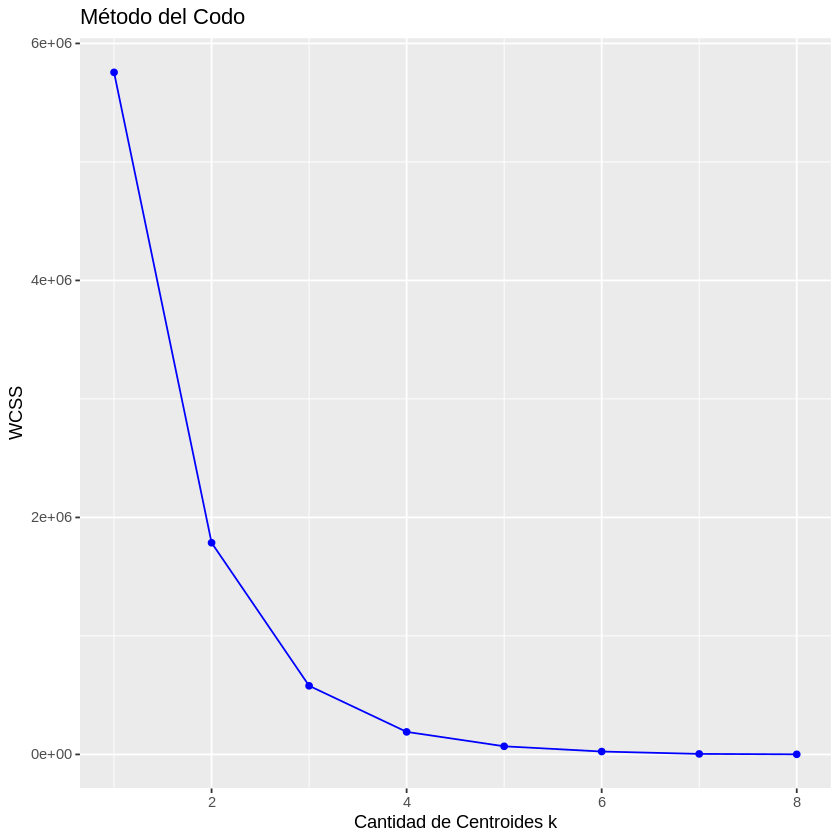

In [ ]:
wcss <- vector()
for(i in 1:8){
  wcss[i] <- sum(kmeans(valores_d, i)$withinss)
}
library(ggplot2)
ggplot() + geom_point(aes(x = 1:8, y = wcss), color = 'blue') +
  geom_line(aes(x = 1:8, y = wcss), color = 'blue') +
  ggtitle("Método del Codo") +
  xlab('Cantidad de Centroides k') +
  ylab('WCSS')

Se ve las agrupaciones con el dendrograma:

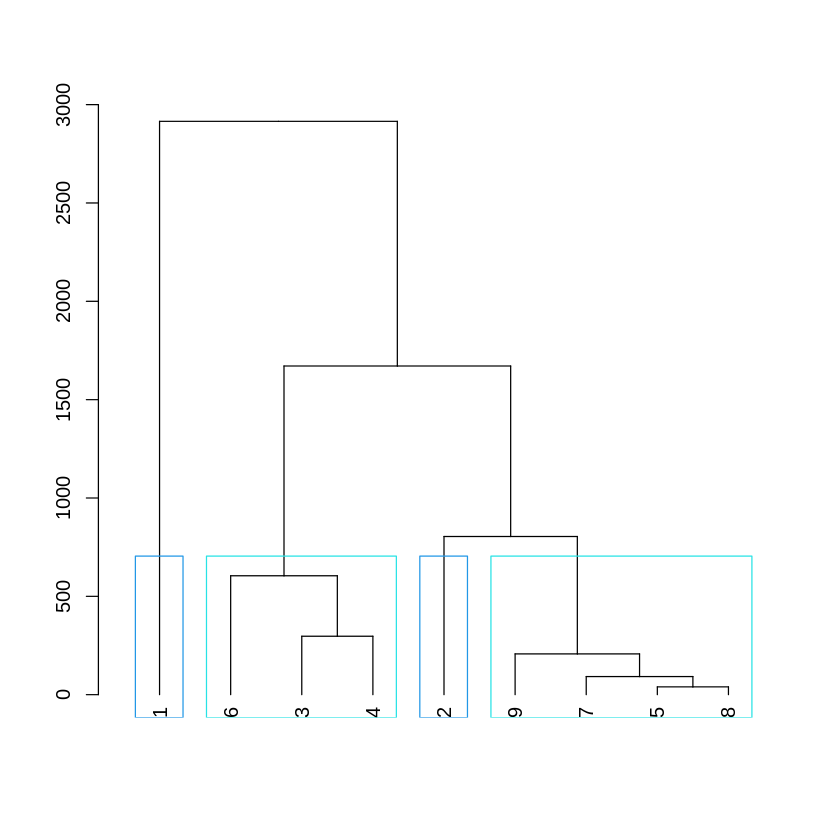

In [ ]:
#Se aplica el clúster jerárquico
# Matriz de distancias
d <- dist(valores_d)

# Clúster jerárquico
hc <- hclust(d)

# Dendrograma
plot(as.dendrogram(hc))
rect.hclust(hc, k = 4,
            border = 4:5)

Al revisar las agrupaciones se procede a la siguiente recodificación:

| Código Variable | Etiqueta | Código nuevo
| --- | --- |--- |
| 1 | Ladrillo o bloque de cemento | 1
| 2 | Piedra o sillar con cal o cemento | 2
| 3 | Adobe | 3
| 4 | Tapia | 3
| 5 | Quincha | 4
| 6 | Piedra con barro | 3
| 7 | Madera | 4
| 8 | Triplay | 4
| 9 | Otros | 4

Se hace la recodificación:

In [ ]:
#Haciendo el proceso de recodificación
Base$p102R<-Base$P102
Base$p102R[Base$P102==1] <- 1
Base$p102R[Base$P102==2] <- 2
Base$p102R[Base$P102==3] <- 3
Base$p102R[Base$P102==4] <- 3
Base$p102R[Base$P102==5] <- 4
Base$p102R[Base$P102==6] <- 3
Base$p102R[Base$P102==7] <- 4
Base$p102R[Base$P102==8] <- 4
Base$p102R[Base$P102==9] <- 4

In [ ]:
#Se verifica que se ha realizado la recodificación
table(Base$p102R)


    1     2     3     4 
16923   138 11266  5527 

Las categorías finales son:

**p102R**: El material predominante en las paredes exteriores

| Código Variable | Etiqueta |
| --- | --- |
| 1 | Ladrillo o bloque de cemento |
| 2 | Piedra o sillar con cal o cemento |
| 3 | Adobe, tapia,piedra con barro |
| 4 | Quincha, madera, triplay, otros |


**2.4.3 Revisión de (p103) - El material predominante en los pisos**

La variable cuenta con las siguientes categorías:

| Código Variable | Etiqueta |
| --- | --- |
| 1 | Parquet o madera pulida |
| 2 | Laminas asfálticas |
| 3 | Losetas |
| 4 | Madera |
| 5 | Cemento |
| 6 | Tierra |
| 7 | Otro |



Se hace el resumen:

In [ ]:
#Se define la variable que se trabajará
VariableTomar<-Base$P103

# Obtener las opciones de respuesta de la variable
opciones_respuesta <- unique(VariableTomar)

# Calcular el número de casos por opción de respuesta
num_casos <- aggregate(Base$Ingreso, by = list(VariableTomar), FUN = length)

# Calcular el promedio de ingreso por opción de respuesta
promedio_ingreso <- aggregate(Base$Ingreso, by = list(VariableTomar), FUN = mean)

# Renombrar las columnas de los resultados
names(num_casos) <- c("Opcion_respuesta", "Numero_casos")
names(promedio_ingreso) <- c("Opcion_respuesta", "Promedio_ingreso")

# Combinar los resultados en un nuevo dataframe
resultado <- merge(data.frame(Opcion_respuesta = opciones_respuesta), num_casos, by = "Opcion_respuesta")
resultado <- merge(resultado, promedio_ingreso, by = "Opcion_respuesta")

# Mostrar el dataframe resultado
resultado

Opcion_respuesta,Numero_casos,Promedio_ingreso
<int>,<int>,<dbl>
1,896,7091.019
2,1309,6188.062
3,4471,5474.390
4,2832,2128.933
5,14785,3089.273
6,9505,1641.535
7,56,2220.933


Se almacena los promedios:

In [ ]:
#Se toma los valores de los promedio
valores_d<-resultado$Promedio_ingreso
valores_d

[1] 7091.019 6188.062 5474.390 2128.933 3089.273 1641.535 2220.933

Se verifica el número de agrupaciones óptimas

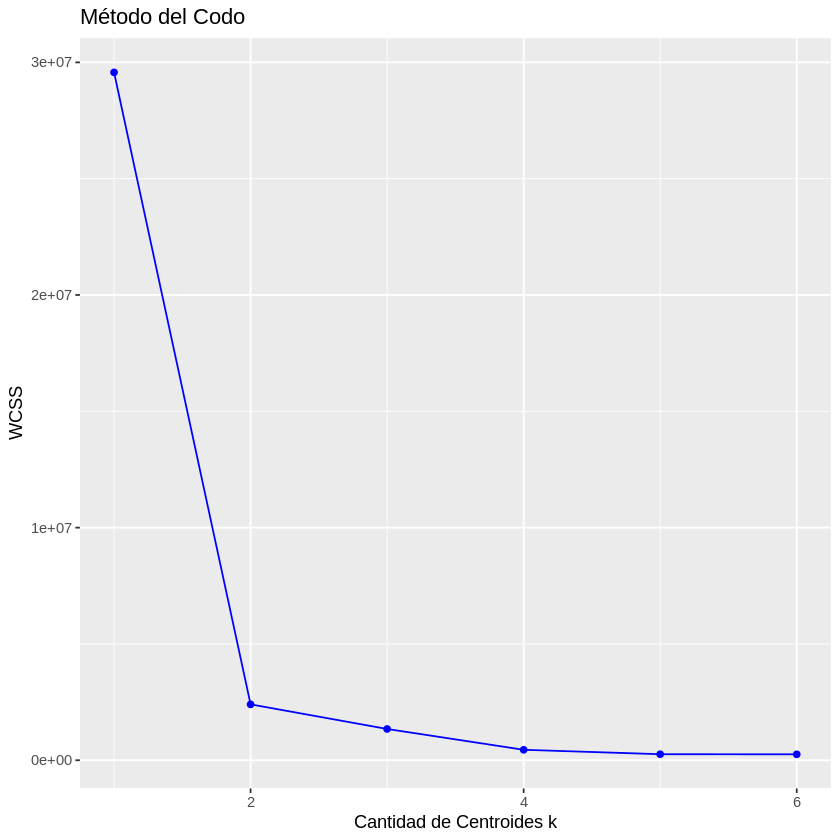

In [ ]:
wcss <- vector()
for(i in 1:6){
  wcss[i] <- sum(kmeans(valores_d, i)$withinss)
}
library(ggplot2)
ggplot() + geom_point(aes(x = 1:6, y = wcss), color = 'blue') +
  geom_line(aes(x = 1:6, y = wcss), color = 'blue') +
  ggtitle("Método del Codo") +
  xlab('Cantidad de Centroides k') +
  ylab('WCSS')

Se ve como queda las agrupaciones:

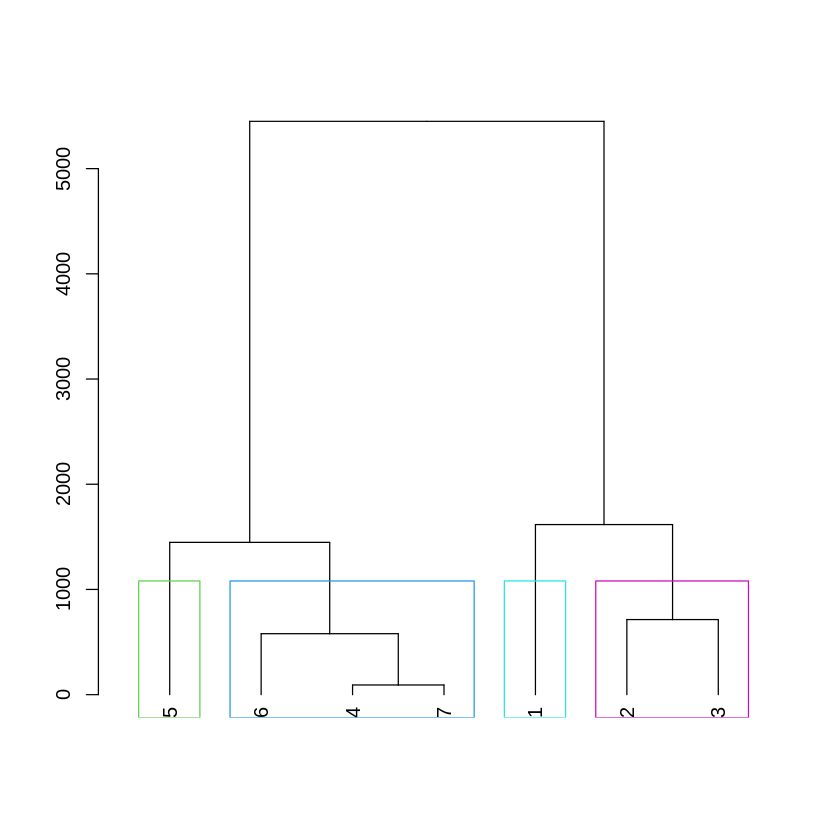

In [ ]:
#Se aplica el clúster jerárquico
# Matriz de distancias
d <- dist(valores_d)

# Clúster jerárquico
hc <- hclust(d)

# Dendrograma
plot(as.dendrogram(hc))
rect.hclust(hc, k = 4,
            border = 3:6)

Para esta variable se opta por usar parcialmente la recomendación de agrupación de categorías debido a que la categoría de "Tierra" es la ausencia de piso por lo que no debería juntarse con ningún otra y debería indicar el nivel de vulnerabilidad más alto. Por ello se tomarán 5 agrupaciones, quedando como sigue:

Al revisar las salidas preliminares de decide hacer la siguiente recodificación:

| Código Variable | Etiqueta | Código nuevo
| --- | --- |--- |
| 1 | Parquet o madera pulida | 1
| 2 | Laminas asfálticas | 2
| 3 | Losetas | 2
| 4 | Madera | 4
| 5 | Cemento | 3
| 6 | Tierra | 5
| 7 | Otro | 4

Se hace la recodificación:


In [ ]:
#Haciendo el proceso de recodificación
Base$p103R<-Base$P103
Base$p103R[Base$P103==1] <- 1
Base$p103R[Base$P103==2] <- 2
Base$p103R[Base$P103==3] <- 2
Base$p103R[Base$P103==4] <- 4
Base$p103R[Base$P103==5] <- 3
Base$p103R[Base$P103==6] <- 5
Base$p103R[Base$P103==7] <- 4


In [ ]:
#Se verifica que se ha realizado la recodificación
table(Base$p103R)


    1     2     3     4     5 
  896  5780 14785  2888  9505 

Las categorías finales son:

**p103R**: El material predominante en los pisos

| Código Variable | Etiqueta |
| --- | --- |
| 1 | Parquet o madera pulida |
| 2 | Laminas asfálticas, losetas |
| 3 | Cemento |
| 4 | Madera, otros |
| 5 | Tierra |




**2.4.4 Revisión de (p103a) - El material predominante en los techos**

La variable cuenta con las siguientes categorías:

| Código Variable | Etiqueta |
| --- | --- |
| 1 | Concreto armado |
| 2 | Madera |
| 3 | Tejas |
| 4 | Planchas de calamina |
| 5 | Caña o estera |
| 6 | Triplay |
| 7 | Paja,hojas |
| 8 | Otro material |

Se muestra el cuadro resumen:

In [ ]:
#Se define la variable que se trabajará
VariableTomar<-Base$P103A

# Obtener las opciones de respuesta de la variable
opciones_respuesta <- unique(VariableTomar)

# Calcular el número de casos por opción de respuesta
num_casos <- aggregate(Base$Ingreso, by = list(VariableTomar), FUN = length)

# Calcular el promedio de ingreso por opción de respuesta
promedio_ingreso <- aggregate(Base$Ingreso, by = list(VariableTomar), FUN = mean)

# Renombrar las columnas de los resultados
names(num_casos) <- c("Opcion_respuesta", "Numero_casos")
names(promedio_ingreso) <- c("Opcion_respuesta", "Promedio_ingreso")

# Combinar los resultados en un nuevo dataframe
resultado <- merge(data.frame(Opcion_respuesta = opciones_respuesta), num_casos, by = "Opcion_respuesta")
resultado <- merge(resultado, promedio_ingreso, by = "Opcion_respuesta")

# Mostrar el dataframe resultado
resultado


Opcion_respuesta,Numero_casos,Promedio_ingreso
<int>,<int>,<dbl>
1,11199,4740.828
2,463,2519.811
3,2451,1751.227
4,17965,2433.384
5,959,2844.997
6,182,2408.488
7,529,1274.982
8,106,2382.762


Se almacena los promedios:

In [ ]:
#Se toma los valores de los promedio
valores_d<-resultado$Promedio_ingreso
valores_d


[1] 4740.828 2519.811 1751.227 2433.384 2844.997 2408.488 1274.982 2382.762

Se revisa el número referencial de categorías por trabajar:

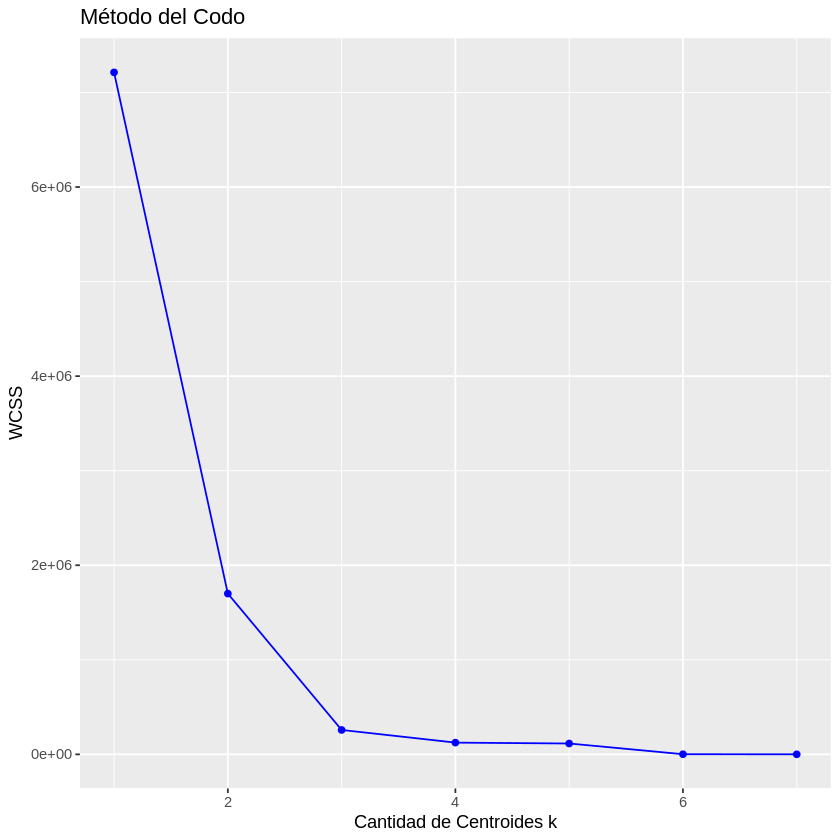

In [ ]:
wcss <- vector()
for(i in 1:7){
  wcss[i] <- sum(kmeans(valores_d, i)$withinss)
}
library(ggplot2)
ggplot() + geom_point(aes(x = 1:7, y = wcss), color = 'blue') +
  geom_line(aes(x = 1:7, y = wcss), color = 'blue') +
  ggtitle("Método del Codo") +
  xlab('Cantidad de Centroides k') +
  ylab('WCSS')

Se revisa las agrupaciones:

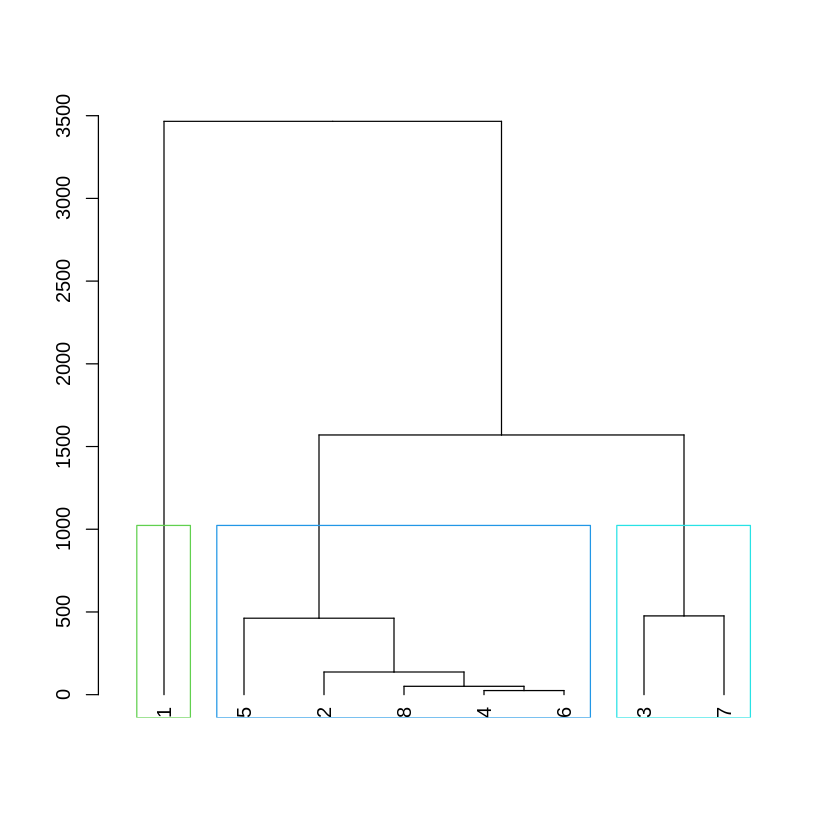

In [ ]:

#Se aplica el clúster jerárquico
# Matriz de distancias
d <- dist(valores_d)

# Clúster jerárquico
hc <- hclust(d)

# Dendrograma
plot(as.dendrogram(hc))
rect.hclust(hc, k = 3,
            border = 3:5)

La categoría de 5 parece también distante del grupo de (2,8,4,6) por lo que se lo almacenará en un grupo aparte. También se puede ver cierta distancia entre 3 y 7 por lo que se separarán, quedando las agrupaciones como:

La recodificación es:

| Código Variable | Etiqueta | Código nuevo
| --- | --- |--- |
| 1 | Concreto armado | 1
| 2 | Madera | 3
| 3 | Tejas | 4
| 4 | Planchas de calamina | 3
| 5 | Caña o estera | 2
| 6 | Triplay | 3
| 7 | Paja,hojas | 5
| 8 | Otro material | 3

Se hace la recodificación:

In [ ]:
#Haciendo el proceso de recodificación
Base$p103aR<-Base$P103A
Base$p103aR[Base$P103A==1] <- 1
Base$p103aR[Base$P103A==2] <- 3
Base$p103aR[Base$P103A==3] <- 4
Base$p103aR[Base$P103A==4] <- 3
Base$p103aR[Base$P103A==5] <- 2
Base$p103aR[Base$P103A==6] <- 3
Base$p103aR[Base$P103A==7] <- 5
Base$p103aR[Base$P103A==8] <- 3

In [ ]:
#Se verifica que se ha realizado la recodificación
table(Base$p103aR)


    1     2     3     4     5 
11199   959 18716  2451   529 

Las categorías finales son:

**p103aR**: El material predominante en los techos

| Código Variable | Etiqueta |
| --- | --- |
| 1 | Concreto armado |
| 2 | Caña o estera |
| 3 | Madera, Planchas de calamina, triplay, otros |
| 4 | Tejas |
| 5 | Pajas y hojas |

**2.4.5 Revisión de (p110) - El agua que utilizan en el hogar**

La variable cuenta con las siguientes categorías:

| Código Variable | Etiqueta |
| --- | --- |
| 1 | Red pública dentro de la vivienda |
| 2 | Red pública fuera de la vivienda |
| 3 | Pilón |
| 4 | Camión cisterna |
| 5 | Pozo |
| 6 | Manantial |
| 7 | Otra |
| 8 | río, lago, laguna |

Se muestra el resumen de la variable:

In [ ]:
#Se define la variable que se trabajará
VariableTomar<-Base$P110

# Obtener las opciones de respuesta de la variable
opciones_respuesta <- unique(VariableTomar)

# Calcular el número de casos por opción de respuesta
num_casos <- aggregate(Base$Ingreso, by = list(VariableTomar), FUN = length)

# Calcular el promedio de ingreso por opción de respuesta
promedio_ingreso <- aggregate(Base$Ingreso, by = list(VariableTomar), FUN = mean)

# Renombrar las columnas de los resultados
names(num_casos) <- c("Opcion_respuesta", "Numero_casos")
names(promedio_ingreso) <- c("Opcion_respuesta", "Promedio_ingreso")

# Combinar los resultados en un nuevo dataframe
resultado <- merge(data.frame(Opcion_respuesta = opciones_respuesta), num_casos, by = "Opcion_respuesta")
resultado <- merge(resultado, promedio_ingreso, by = "Opcion_respuesta")

# Mostrar el dataframe resultado
resultado


Opcion_respuesta,Numero_casos,Promedio_ingreso
<int>,<int>,<dbl>
1,27773,3357.182
2,1218,2317.242
3,730,2407.502
4,872,2822.296
5,689,2645.213
6,816,1499.598
7,1074,2120.401
8,1041,1699.727


Se toman los valores promedios:

In [ ]:
#Se toma los valores de los promedio
valores_d<-resultado$Promedio_ingreso
valores_d

[1] 3357.182 2317.242 2407.502 2822.296 2645.213 1499.598 2120.401 1699.727

Se valida el número aproximado de clúster a trabajar:

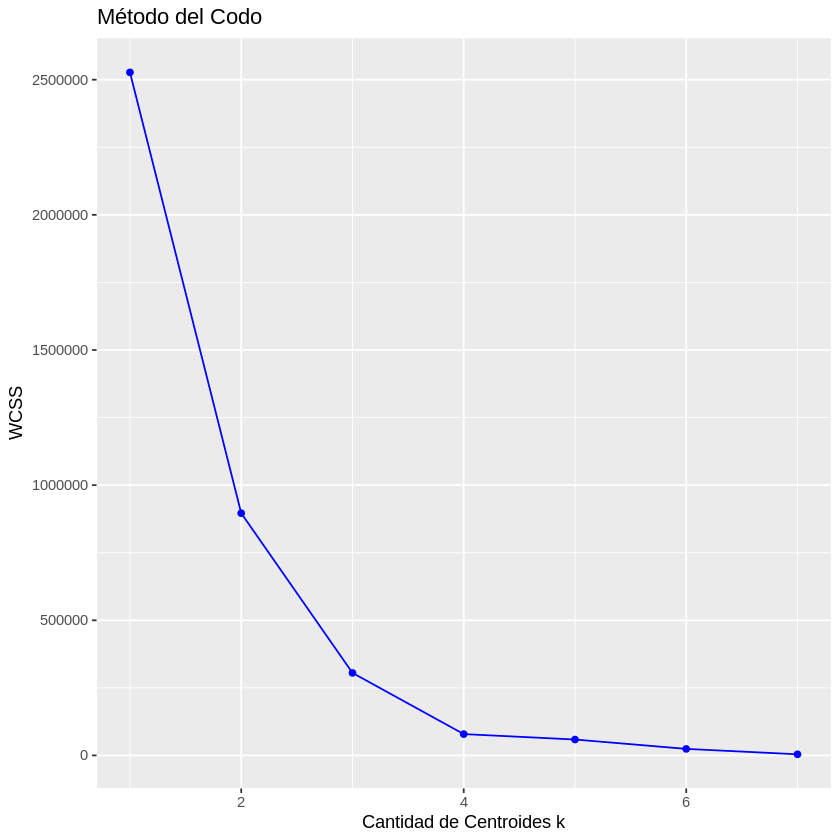

In [ ]:
wcss <- vector()
for(i in 1:7){
  wcss[i] <- sum(kmeans(valores_d, i)$withinss)
}
library(ggplot2)
ggplot() + geom_point(aes(x = 1:7, y = wcss), color = 'blue') +
  geom_line(aes(x = 1:7, y = wcss), color = 'blue') +
  ggtitle("Método del Codo") +
  xlab('Cantidad de Centroides k') +
  ylab('WCSS')


Se revisa las agrupaciones, se opta por trabajar con 4:

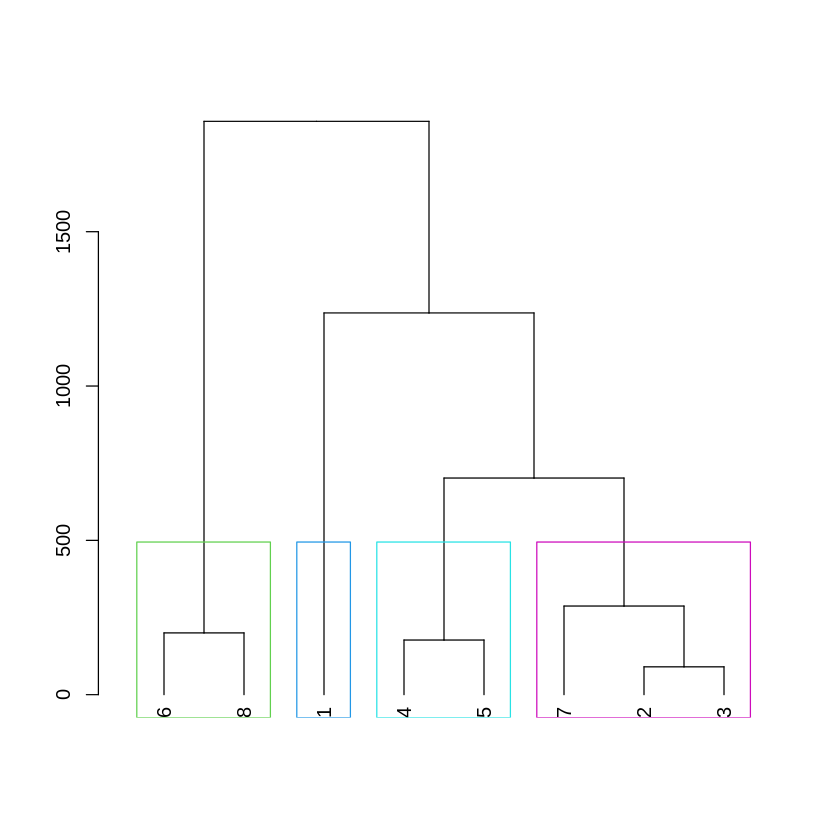

In [ ]:
#Se aplica el clúster jerárquico
# Matriz de distancias
d <- dist(valores_d)

# Clúster jerárquico
hc <- hclust(d)

# Dendrograma
plot(as.dendrogram(hc))
rect.hclust(hc, k = 4,
            border = 3:6)

Al revisar las salidas preliminares de decide hacer la siguiente recodificación:

| Código Variable | Etiqueta | Código nuevo
| --- | --- | --- |
| 1 | Red pública dentro de la vivienda | 1
| 2 | Red pública fuera de la vivienda | 3
| 3 | Pilón | 3
| 4 | Camión cisterna | 2
| 5 | Pozo | 2
| 6 | Manantial | 4
| 7 | Otra | 3
| 8 | río, lago, laguna | 4

Se hace la recodificación:

In [ ]:
#Haciendo el proceso de recodificación
Base$p110R<-Base$P110
Base$p110R[Base$P110==1] <- 1
Base$p110R[Base$P110==2] <- 3
Base$p110R[Base$P110==3] <- 3
Base$p110R[Base$P110==4] <- 2
Base$p110R[Base$P110==5] <- 2
Base$p110R[Base$P110==6] <- 4
Base$p110R[Base$P110==7] <- 3
Base$p110R[Base$P110==8] <- 4

In [ ]:
#Se verifica que se ha realizado la recodificación
table(Base$p110R)


    1     2     3     4 
27773  1561  3022  1857 

Las categorías finales son:

**p110R**: El agua que utilizan en el hogar

| Código Variable | Etiqueta |
| --- | --- |
| 1 | Red pública dentro de la vivienda |
| 2 | Camión cisterna,pozo |  
| 3 | Red pública fuera de la vivienda, pilón,otras |
| 4 | Manantial, rio,lago, lagunas, otros |  


**2.4.6 Revisión de (p111a) - El baño o servicio higiénico que tiene su hogar esta conectado**

La variable cuenta con las siguientes categorías:

| Código Variable | Etiqueta |
| --- | --- |
| 1 | Red pública de desague dentro del hogar |
| 2 | Red pública de desague fuera del hogar  |
| 3 | Letrina |
| 4 | Pozo séptico |
| 5 | Pozo ciego |
| 6 | Río acequia |
| 7 | Otra |
| 9 | Campo abierto |

Se muestra el resumen:

In [ ]:
#Se define la variable que se trabajará
VariableTomar<-Base$P111A

# Obtener las opciones de respuesta de la variable
opciones_respuesta <- unique(VariableTomar)

# Calcular el número de casos por opción de respuesta
num_casos <- aggregate(Base$Ingreso, by = list(VariableTomar), FUN = length)

# Calcular el promedio de ingreso por opción de respuesta
promedio_ingreso <- aggregate(Base$Ingreso, by = list(VariableTomar), FUN = mean)

# Renombrar las columnas de los resultados
names(num_casos) <- c("Opcion_respuesta", "Numero_casos")
names(promedio_ingreso) <- c("Opcion_respuesta", "Promedio_ingreso")

# Combinar los resultados en un nuevo dataframe
resultado <- merge(data.frame(Opcion_respuesta = opciones_respuesta), num_casos, by = "Opcion_respuesta")
resultado <- merge(resultado, promedio_ingreso, by = "Opcion_respuesta")

# Mostrar el dataframe resultado
resultado


Opcion_respuesta,Numero_casos,Promedio_ingreso
<int>,<int>,<dbl>
1,20610,3891.122
2,1176,2305.848
3,914,2705.283
4,3516,1751.075
5,3094,1977.371
6,482,2890.149
7,3016,2118.045
9,1405,1378.450


Se almacenan los promedios

In [ ]:
#Se toma los valores de los promedio
valores_d<-resultado$Promedio_ingreso
valores_d

[1] 3891.122 2305.848 2705.283 1751.075 1977.371 2890.149 2118.045 1378.450

Se ve el número de agrupamientos recomendados:

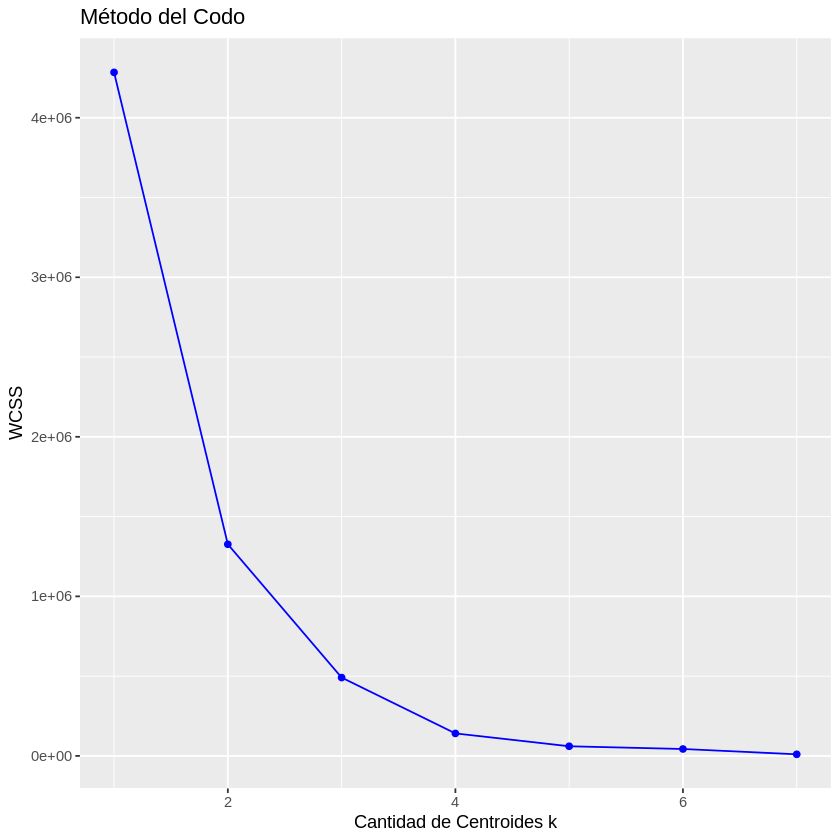

In [ ]:
wcss <- vector()
for(i in 1:7){
  wcss[i] <- sum(kmeans(valores_d, i)$withinss)
}
library(ggplot2)
ggplot() + geom_point(aes(x = 1:7, y = wcss), color = 'blue') +
  geom_line(aes(x = 1:7, y = wcss), color = 'blue') +
  ggtitle("Método del Codo") +
  xlab('Cantidad de Centroides k') +
  ylab('WCSS')

Se revisa las agrupaciones:

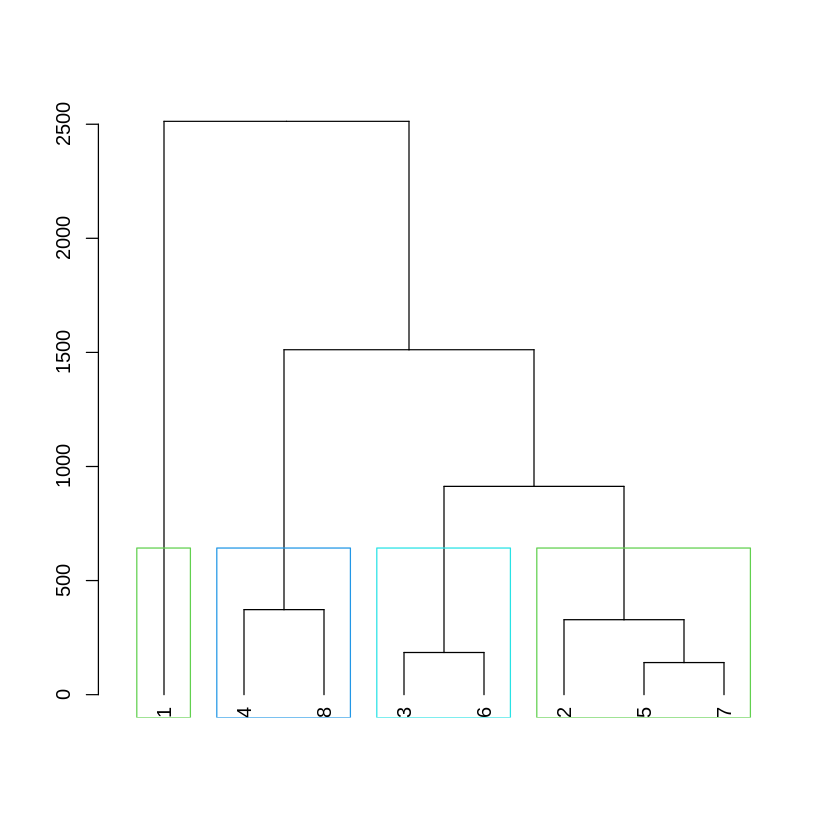

In [ ]:
#Se aplica el clúster jerárquico
# Matriz de distancias
d <- dist(valores_d)

# Clúster jerárquico
hc <- hclust(d)

# Dendrograma
plot(as.dendrogram(hc))
rect.hclust(hc, k = 4,
            border = 3:5)

Este último caso no tiene mucho sentido las agrupaciones, por lo que se agruparán como sigue:

| Código Variable | Etiqueta | Código nuevo
| --- | --- |--- |
| 1 | Red pública de desague dentro del hogar | 1
| 2 | Red pública de desague fuera del hogar  | 2
| 3 | Letrina | 3
| 4 | Pozo séptico | 4
| 5 | Pozo ciego | 4
| 6 | Río acequia | 5
| 7 | Otra | 5
| 9 | Campo abierto | 5

Se hace la recodificación:

In [ ]:
#Haciendo el proceso de recodificación
Base$p111aR<-Base$P111A
Base$p111aR[Base$P111A==1] <- 1
Base$p111aR[Base$P111A==2] <- 2
Base$p111aR[Base$P111A==3] <- 3
Base$p111aR[Base$P111A==4] <- 4
Base$p111aR[Base$P111A==5] <- 4
Base$p111aR[Base$P111A==6] <- 5
Base$p111aR[Base$P111A==7] <- 5
Base$p111aR[Base$P111A==9] <- 5

In [ ]:
#Se verifica que se ha realizado la recodificación
table(Base$p111aR)


    1     2     3     4     5 
20610  1176   914  6610  4903 

Las categorías finales son:

**p111aR**: El baño o servicio higiénico que tiene su hogar esta conectado a

| Código Variable | Etiqueta |
| --- | --- |
| 1 | Red pública de desague dentro del hogar |
| 2 | Red pública de desague fuera del hogar  |
| 3 | Letrina |
| 4 | Pozo  |
| 5 | Río acequia, campo abierto,otro |



Para el resto de variables ya no es necesario hacer un clúster jerárquico, por lo que es de no tenencia (Vulnerable) y tenencia (No Vulnerable):

**2.4.7 Revisión de (p1121) - Tipo de alumbrado: Electricidad**

La variable cuenta con las siguientes categorías:

| Código Variable | Etiqueta |
| --- | --- |
| 0 | Pase |
| 1 | Electricidad |


In [ ]:
#Se muestra la tabla
table(Base$P1121)


    0     1 
 2252 31961 

Al revisar las salidas preliminares de decide hacer la siguiente recodificación:

| Código Variable | Etiqueta | Código nuevo
| --- | --- | --- |
| 0 | Pase | 2
| 1 | Electricidad | 1

Se hace la recodificación

In [ ]:
#Haciendo el proceso de recodificación
Base$p1121R<-Base$P1121
Base$p1121R[Base$P1121==0] <- 2
Base$p1121R[Base$P1121==1] <- 1


In [ ]:
#Se verifica que se ha realizado la recodificación
table(Base$p1121R)


    1     2 
31961  2252 

Las categorías finales son:

**p1121R**: Tipo de alumbrado del hogar: Electricidad

| Código Variable | Etiqueta |
| --- | --- |
| 1 | Con electricidad|
| 2 | Sin electricidad |


**2.4.8 Revisión de (p1141) - Su hogar tiene: telefono fijo**

La variable cuenta con las siguientes categorías:

| Código Variable | Etiqueta |
| --- | --- |
| 0 | Pase |
| 1 | Teléfono(fijo) |

In [ ]:
#Se muestra la tabla
table(Base$P1141)


    0     1 
31323  2890 

Al revisar las salidas preliminares de decide hacer la siguiente recodificación:

| Código Variable | Etiqueta | Código nuevo
| --- | --- |--- |
| 0 | Pase | 2
| 1 | Teléfono(fijo) | 1

Se hace la recodificación:

In [ ]:
#Haciendo el proceso de recodificación
Base$p1141R<-Base$P1141
Base$p1141R[Base$P1141==0] <- 2
Base$p1141R[Base$P1141==1] <- 1


In [ ]:
#Se verifica que se ha realizado la recodificación
table(Base$p1141R)


    1     2 
 2890 31323 

**p1141R**: Su hogar tiene: Teléfono fijo

| Código Variable | Etiqueta |
| --- | --- |
| 1 | Con teléfono fijo |
| 2 | Sin teléfono fijo|

**2.4.9 Revisión de (p1142) - Su hogar tiene: telefono celular**

La variable cuenta con las siguientes categorías:

| Código Variable | Etiqueta |
| --- | --- |
| 0 | Pase |
| 1 | Teléfono (celular) |

In [ ]:
#Se muestra la tabla
table(Base$P1142)


    0     1 
 2349 31864 

Al revisar las salidas preliminares de decide hacer la siguiente recodificación:

| Código Variable | Etiqueta | Código nuevo
| --- | --- |--- |
| 0 | Pase | 2
| 1 | Teléfono (celular) | 1

Se hace la recodificación:

In [ ]:
#Haciendo el proceso de recodificación
Base$p1142R<-Base$P1142
Base$p1142R[Base$P1142==0] <- 2
Base$p1142R[Base$P1142==1] <- 1


In [ ]:
#Se verifica que se ha realizado la recodificación
table(Base$p1142R)


    1     2 
31864  2349 

**p1142R**: Su hogar tiene: Teléfono celular

| Código Variable | Etiqueta |
| --- | --- |
| 1 | Con Teléfono celular |
| 2 | Sin Teléfono celular|

**2.4.10 Revisión de (p1143) - Su hogar tiene: Conexión a TV por cable**

La variable cuenta con las siguientes categorías:

| Código Variable | Etiqueta |
| --- | --- |
| 0 | Pase |
| 1 | Conexión a TV por cable |

In [ ]:
#Se muestra la tabla
table(Base$P1143)



    0     1 
23876 10337 

Al revisar las salidas preliminares de decide hacer la siguiente recodificación:

| Código Variable | Etiqueta | Código nuevo
| --- | --- |--- |
| 0 | Pase | 2
| 1 | Conexión a TV por cable | 1

Se hace la recodificación

In [ ]:
#Haciendo el proceso de recodificación
Base$p1143R<-Base$P1143
Base$p1143R[Base$P1143==0] <- 2
Base$p1143R[Base$P1143==1] <- 1


In [ ]:
#Se verifica que se ha realizado la recodificación
table(Base$p1143R)


    1     2 
10337 23876 

**p1143R**: Su hogar tiene: tv cable

| Código Variable | Etiqueta |
| --- | --- |
| 1 | Con Tv cable |
| 2 | Sin Tv cable|

**2.4.11 Revisión de (p1144) - Su hogar tiene: Conexión a Internet**

La variable cuenta con las siguientes categorías:

| Código Variable | Etiqueta |
| --- | --- |
| 0 | Pase |
| 1 | Conexión a internet |


In [ ]:
#Se muestra la tabla
table(Base$P1144)


    0     1 
16861 17352 

Al revisar las salidas preliminares de decide hacer la siguiente recodificación:

| Código Variable | Etiqueta | Código nuevo
| --- | --- |--- |
| 0 | Pase | 2
| 1 | Conexión a internet | 1

Se hace la recodificación:

In [ ]:
#Haciendo el proceso de recodificación
Base$p1144R<-Base$P1144
Base$p1144R[Base$P1144==0] <- 2
Base$p1144R[Base$P1144==1] <- 1


In [ ]:
#Se verifica que se ha realizado la recodificación
table(Base$p1144R)


    1     2 
17352 16861 

**p1144R**: Su hogar tiene: internet

| Código Variable | Etiqueta |
| --- | --- |
| 1 | Con internet |
| 2 | Sin Internet|

Ahora se revisa las variables que se tiene hasta el momento:

In [ ]:
nombres_variables <- names(Base)
print(nombres_variables)

 [1] "FACTOR07"     "UBIGEO"       "RESULT"       "ESTRATO"      "P101"        
 [6] "P102"         "P103"         "P103A"        "P110"         "P111A"       
[11] "P1121"        "P1141"        "P1142"        "P1143"        "P1144"       
[16] "Ingreso"      "Departamento" "Ambito"       "p101R"        "p102R"       
[21] "p103R"        "p103aR"       "p110R"        "p111aR"       "p1121R"      
[26] "p1141R"       "p1142R"       "p1143R"       "p1144R"      


In [ ]:
#Se toma sólo las variables de interés
BaseR <- subset(Base, select = c("Departamento", "Ambito","FACTOR07", "p101R", "p102R", "p103R", "p103aR", "p110R", "p111aR", "p1121R", "p1141R", "p1142R", "p1143R", "p1144R"))
head(BaseR)


,Departamento,Ambito,FACTOR07,p101R,p102R,p103R,p103aR,p110R,p111aR,p1121R,p1141R,p1142R,p1143R,p1144R
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,AMAZONAS,Urbano,106.8902,2,1,3,3,1,1,1,2,1,1,2
2,AMAZONAS,Urbano,106.8902,2,1,2,3,1,1,1,2,1,1,1
3,AMAZONAS,Urbano,106.8902,2,1,5,3,1,1,1,2,1,2,1
4,AMAZONAS,Urbano,106.8902,2,1,3,1,1,1,1,2,1,1,2
5,AMAZONAS,Urbano,106.8902,2,3,3,3,1,1,1,2,1,1,2
6,AMAZONAS,Urbano,158.3513,2,3,3,3,1,4,1,2,1,2,1


**2.5 Tratamiento de los valores perdidos:**
***********************************************************

Como siguiente paso se revisará si se cuenta con valores perdidos en la base de datos:

In [ ]:
colSums(is.na(BaseR))

Departamento       Ambito     FACTOR07        p101R        p102R        p103R 
           0            0            0          359          359          359 
      p103aR        p110R       p111aR       p1121R       p1141R       p1142R 
         359            0            0            0            0            0 
      p1143R       p1144R 
           0            0

Se ve que existen valores perdidos en algunas variables, siendo en total 359 casos perdidos, esto equivale a un 1%, por lo que eliminarlos sería una opción; no obstante, se optará por hacer la imputación usando la moda dentro de cada departamento:

- Obteniendo los valores de p01R: Tipo de vivienda:

In [ ]:
#Se crea la tabla cruzada de la variable p101R por departamentos
tabla1 <-xtabs(FACTOR07~Departamento+p101R, data = BaseR)
round(prop.table(tabla1, 1), 2)

               p101R
Departamento       1    2    3
  AMAZONAS      0.00 0.98 0.02
  ANCASH        0.02 0.98 0.00
  APURIMAC      0.01 0.98 0.00
  AREQUIPA      0.03 0.97 0.00
  AYACUCHO      0.00 0.99 0.01
  CAJAMARCA     0.01 0.99 0.00
  CALLAO        0.13 0.87 0.00
  CUSCO         0.03 0.97 0.00
  HUANCAVELICA  0.01 0.98 0.01
  HUANUCO       0.02 0.98 0.00
  ICA           0.01 0.99 0.00
  JUNIN         0.01 0.98 0.01
  LA LIBERTAD   0.02 0.98 0.00
  LAMBAYEQUE    0.05 0.94 0.00
  LIMA          0.20 0.80 0.00
  LORETO        0.00 0.95 0.05
  MADRE DE DIOS 0.01 0.99 0.01
  MOQUEGUA      0.02 0.98 0.00
  PASCO         0.01 0.99 0.00
  PIURA         0.00 1.00 0.00
  PUNO          0.01 0.98 0.02
  SAN MARTIN    0.00 0.99 0.00
  TACNA         0.02 0.98 0.00
  TUMBES        0.00 1.00 0.00
  UCAYALI       0.00 0.97 0.03

En todos los departamentos lo que más predomina es el código 2 (casa independiente, vivienda en quinta o vecindad), por lo tanto podemos asignar  esta valor a todos los perdidos de esta variable:

In [ ]:
BaseR$p101R[is.na(BaseR$p101R)]=2

- Obteniendo los valores de p02R: El material predominante en las paredes exteriores

In [ ]:
# Se crea la tabla cruzada de la variable p101R por departamentos
tabla1 <- xtabs(FACTOR07 ~ Departamento + p102R, data = BaseR)

# Se calculan las proporciones por fila
proporciones <- prop.table(tabla1, 1)

# Se convierte la tabla de proporciones en un dataframe
df_proporciones <- as.data.frame.matrix(proporciones)

# Redondeamos los valores del dataframe a 2 decimales
df_proporciones <- round(df_proporciones, 2)

# Mostramos el dataframe de proporciones
df_proporciones


,1,2,3,4
,<dbl>,<dbl>,<dbl>,<dbl>
AMAZONAS,0.25,0.00,0.54,0.21
ANCASH,0.42,0.00,0.50,0.09
APURIMAC,0.26,0.00,0.73,0.01
AREQUIPA,0.81,0.06,0.07,0.06
AYACUCHO,0.25,0.00,0.70,0.06
CAJAMARCA,0.24,0.00,0.73,0.03
CALLAO,0.74,0.01,0.04,0.22
CUSCO,0.23,0.02,0.71,0.04
HUANCAVELICA,0.14,0.00,0.85,0.01


En este caso si los valores varían por departamento, por ello la imputación ira variando:

In [ ]:
BaseR$p102R[is.na(BaseR$p102R) & BaseR$Departamento=="AMAZONAS"] <- 3
BaseR$p102R[is.na(BaseR$p102R) & BaseR$Departamento=="ANCASH"] <- 3
BaseR$p102R[is.na(BaseR$p102R) & BaseR$Departamento=="APURIMAC"] <- 3
BaseR$p102R[is.na(BaseR$p102R) & BaseR$Departamento=="AREQUIPA"] <- 1
BaseR$p102R[is.na(BaseR$p102R) & BaseR$Departamento=="AYACUCHO"] <- 3
BaseR$p102R[is.na(BaseR$p102R) & BaseR$Departamento=="CAJAMARCA"] <- 3
BaseR$p102R[is.na(BaseR$p102R) & BaseR$Departamento=="CALLAO"] <- 1
BaseR$p102R[is.na(BaseR$p102R) & BaseR$Departamento=="CUSCO"] <- 3
BaseR$p102R[is.na(BaseR$p102R) & BaseR$Departamento=="HUANCAVELICA"] <- 3
BaseR$p102R[is.na(BaseR$p102R) & BaseR$Departamento=="HUANUCO"] <- 3
BaseR$p102R[is.na(BaseR$p102R) & BaseR$Departamento=="ICA"] <- 1
BaseR$p102R[is.na(BaseR$p102R) & BaseR$Departamento=="JUNIN"] <- 1
BaseR$p102R[is.na(BaseR$p102R) & BaseR$Departamento=="LA LIBERTAD"] <- 3
BaseR$p102R[is.na(BaseR$p102R) & BaseR$Departamento=="LAMBAYEQUE"] <- 1
BaseR$p102R[is.na(BaseR$p102R) & BaseR$Departamento=="LIMA"] <- 1
BaseR$p102R[is.na(BaseR$p102R) & BaseR$Departamento=="LORETO"] <- 3
BaseR$p102R[is.na(BaseR$p102R) & BaseR$Departamento=="MADRE DE DIOS"] <- 1
BaseR$p102R[is.na(BaseR$p102R) & BaseR$Departamento=="MOQUEGUA"] <- 1
BaseR$p102R[is.na(BaseR$p102R) & BaseR$Departamento=="PASCO"] <- 3
BaseR$p102R[is.na(BaseR$p102R) & BaseR$Departamento=="PIURA"] <- 1
BaseR$p102R[is.na(BaseR$p102R) & BaseR$Departamento=="PUNO"] <- 3
BaseR$p102R[is.na(BaseR$p102R) & BaseR$Departamento=="SAN MARTIN"] <- 1
BaseR$p102R[is.na(BaseR$p102R) & BaseR$Departamento=="TACNA"] <- 1
BaseR$p102R[is.na(BaseR$p102R) & BaseR$Departamento=="TUMBES"] <- 1
BaseR$p102R[is.na(BaseR$p102R) & BaseR$Departamento=="UCAYALI"] <- 4

- Obteniendo los valores de p103R: El material predominante en los pisos

In [ ]:
#Se crea la tabla cruzada de la variable p103R por departamentos
tabla1 <-xtabs(FACTOR07~Departamento+p103R, data = BaseR)
round(prop.table(tabla1, 1), 2)

               p103R
Departamento       1    2    3    4    5
  AMAZONAS      0.00 0.07 0.48 0.08 0.38
  ANCASH        0.00 0.16 0.41 0.02 0.41
  APURIMAC      0.00 0.05 0.22 0.06 0.67
  AREQUIPA      0.03 0.24 0.65 0.02 0.06
  AYACUCHO      0.00 0.06 0.27 0.03 0.63
  CAJAMARCA     0.00 0.06 0.35 0.05 0.54
  CALLAO        0.05 0.34 0.56 0.02 0.03
  CUSCO         0.01 0.10 0.27 0.26 0.36
  HUANCAVELICA  0.00 0.03 0.16 0.35 0.46
  HUANUCO       0.01 0.05 0.31 0.10 0.53
  ICA           0.01 0.22 0.66 0.00 0.11
  JUNIN         0.01 0.08 0.50 0.14 0.27
  LA LIBERTAD   0.02 0.15 0.54 0.01 0.27
  LAMBAYEQUE    0.01 0.25 0.55 0.00 0.19
  LIMA          0.10 0.34 0.50 0.01 0.05
  LORETO        0.00 0.08 0.36 0.35 0.21
  MADRE DE DIOS 0.00 0.12 0.64 0.12 0.12
  MOQUEGUA      0.01 0.20 0.61 0.02 0.15
  PASCO         0.00 0.04 0.27 0.48 0.21
  PIURA         0.00 0.13 0.52 0.01 0.34
  PUNO          0.01 0.02 0.41 0.11 0.45
  SAN MARTIN    0.00 0.10 0.53 0.02 0.35
  TACNA         0.02 0.21 0.65 0.01 

En este caso los valores también varía por valores, por ellos la imputación ira variando:

In [ ]:
BaseR$p103R[is.na(BaseR$p103R) & BaseR$Departamento=="AMAZONAS"] <- 3
BaseR$p103R[is.na(BaseR$p103R) & BaseR$Departamento=="ANCASH"] <- 3
BaseR$p103R[is.na(BaseR$p103R) & BaseR$Departamento=="APURIMAC"] <- 5
BaseR$p103R[is.na(BaseR$p103R) & BaseR$Departamento=="AREQUIPA"] <- 3
BaseR$p103R[is.na(BaseR$p103R) & BaseR$Departamento=="AYACUCHO"] <- 5
BaseR$p103R[is.na(BaseR$p103R) & BaseR$Departamento=="CAJAMARCA"] <- 5
BaseR$p103R[is.na(BaseR$p103R) & BaseR$Departamento=="CALLAO"] <- 3
BaseR$p103R[is.na(BaseR$p103R) & BaseR$Departamento=="CUSCO"] <- 5
BaseR$p103R[is.na(BaseR$p103R) & BaseR$Departamento=="HUANCAVELICA"] <- 5
BaseR$p103R[is.na(BaseR$p103R) & BaseR$Departamento=="HUANUCO"] <- 5
BaseR$p103R[is.na(BaseR$p103R) & BaseR$Departamento=="ICA"] <- 3
BaseR$p103R[is.na(BaseR$p103R) & BaseR$Departamento=="JUNIN"] <- 3
BaseR$p103R[is.na(BaseR$p103R) & BaseR$Departamento=="LA LIBERTAD"] <- 3
BaseR$p103R[is.na(BaseR$p103R) & BaseR$Departamento=="LAMBAYEQUE"] <- 3
BaseR$p103R[is.na(BaseR$p103R) & BaseR$Departamento=="LIMA"] <- 3
BaseR$p103R[is.na(BaseR$p103R) & BaseR$Departamento=="LORETO"] <- 3
BaseR$p103R[is.na(BaseR$p103R) & BaseR$Departamento=="MADRE DE DIOS"] <- 3
BaseR$p103R[is.na(BaseR$p103R) & BaseR$Departamento=="MOQUEGUA"] <- 3
BaseR$p103R[is.na(BaseR$p103R) & BaseR$Departamento=="PASCO"] <- 4
BaseR$p103R[is.na(BaseR$p103R) & BaseR$Departamento=="PIURA"] <- 3
BaseR$p103R[is.na(BaseR$p103R) & BaseR$Departamento=="PUNO"] <- 5
BaseR$p103R[is.na(BaseR$p103R) & BaseR$Departamento=="SAN MARTIN"] <- 3
BaseR$p103R[is.na(BaseR$p103R) & BaseR$Departamento=="TACNA"] <- 3
BaseR$p103R[is.na(BaseR$p103R) & BaseR$Departamento=="TUMBES"] <- 3
BaseR$p103R[is.na(BaseR$p103R) & BaseR$Departamento=="UCAYALI"] <- 3

- Obteniendo los valores de p103aR: El material predominante en los techos

In [ ]:
#Se crea la tabla cruzada de la variable p103R por departamentos
tabla1 <-xtabs(FACTOR07~Departamento+p103aR, data = BaseR)
round(prop.table(tabla1, 1), 2)

               p103aR
Departamento       1    2    3    4    5
  AMAZONAS      0.11 0.01 0.77 0.09 0.02
  ANCASH        0.31 0.03 0.49 0.17 0.00
  APURIMAC      0.20 0.00 0.52 0.26 0.02
  AREQUIPA      0.64 0.01 0.35 0.01 0.00
  AYACUCHO      0.20 0.00 0.64 0.14 0.02
  CAJAMARCA     0.18 0.00 0.56 0.26 0.00
  CALLAO        0.60 0.02 0.38 0.00 0.00
  CUSCO         0.19 0.00 0.48 0.32 0.02
  HUANCAVELICA  0.12 0.00 0.62 0.23 0.02
  HUANUCO       0.18 0.00 0.72 0.06 0.04
  ICA           0.57 0.20 0.23 0.00 0.00
  JUNIN         0.29 0.00 0.50 0.20 0.01
  LA LIBERTAD   0.43 0.06 0.38 0.12 0.00
  LAMBAYEQUE    0.46 0.05 0.49 0.00 0.00
  LIMA          0.67 0.04 0.29 0.00 0.00
  LORETO        0.01 0.00 0.92 0.00 0.06
  MADRE DE DIOS 0.13 0.00 0.86 0.00 0.01
  MOQUEGUA      0.55 0.00 0.45 0.00 0.00
  PASCO         0.09 0.00 0.90 0.00 0.00
  PIURA         0.18 0.00 0.76 0.06 0.00
  PUNO          0.25 0.01 0.70 0.00 0.05
  SAN MARTIN    0.10 0.00 0.88 0.01 0.01
  TACNA         0.59 0.02 0.39 0.00

Nuevamente la imputación dependerá del departamento:

In [ ]:
BaseR$p103aR[is.na(BaseR$p103aR) & BaseR$Departamento=="AMAZONAS"] <-3
BaseR$p103aR[is.na(BaseR$p103aR) & BaseR$Departamento=="ANCASH"] <- 3
BaseR$p103aR[is.na(BaseR$p103aR) & BaseR$Departamento=="APURIMAC"] <- 3
BaseR$p103aR[is.na(BaseR$p103aR) & BaseR$Departamento=="AREQUIPA"] <- 1
BaseR$p103aR[is.na(BaseR$p103aR) & BaseR$Departamento=="AYACUCHO"] <- 3
BaseR$p103aR[is.na(BaseR$p103aR) & BaseR$Departamento=="CAJAMARCA"] <- 3
BaseR$p103aR[is.na(BaseR$p103aR) & BaseR$Departamento=="CALLAO"] <- 1
BaseR$p103aR[is.na(BaseR$p103aR) & BaseR$Departamento=="CUSCO"] <- 3
BaseR$p103aR[is.na(BaseR$p103aR) & BaseR$Departamento=="HUANCAVELICA"] <- 3
BaseR$p103aR[is.na(BaseR$p103aR) & BaseR$Departamento=="HUANUCO"] <- 3
BaseR$p103aR[is.na(BaseR$p103aR) & BaseR$Departamento=="ICA"] <-1
BaseR$p103aR[is.na(BaseR$p103aR) & BaseR$Departamento=="JUNIN"] <- 3
BaseR$p103aR[is.na(BaseR$p103aR) & BaseR$Departamento=="LA LIBERTAD"] <-1
BaseR$p103aR[is.na(BaseR$p103aR) & BaseR$Departamento=="LAMBAYEQUE"] <- 3
BaseR$p103aR[is.na(BaseR$p103aR) & BaseR$Departamento=="LIMA"] <- 1
BaseR$p103aR[is.na(BaseR$p103aR) & BaseR$Departamento=="LORETO"] <- 3
BaseR$p103aR[is.na(BaseR$p103aR) & BaseR$Departamento=="MADRE DE DIOS"] <- 3
BaseR$p103aR[is.na(BaseR$p103aR) & BaseR$Departamento=="MOQUEGUA"] <- 1
BaseR$p103aR[is.na(BaseR$p103aR) & BaseR$Departamento=="PASCO"] <- 3
BaseR$p103aR[is.na(BaseR$p103aR) & BaseR$Departamento=="PIURA"] <- 3
BaseR$p103aR[is.na(BaseR$p103aR) & BaseR$Departamento=="PUNO"] <- 3
BaseR$p103aR[is.na(BaseR$p103aR) & BaseR$Departamento=="SAN MARTIN"] <- 3
BaseR$p103aR[is.na(BaseR$p103aR) & BaseR$Departamento=="TACNA"] <- 1
BaseR$p103aR[is.na(BaseR$p103aR) & BaseR$Departamento=="TUMBES"] <- 3
BaseR$p103aR[is.na(BaseR$p103aR) & BaseR$Departamento=="UCAYALI"] <- 3

Ahora validamos que ya se no tiene valores perdidos (recordar que hay q ver las variables con terminación en R ques son las recodificadas

In [ ]:
colSums(is.na(BaseR))

Departamento       Ambito     FACTOR07        p101R        p102R        p103R 
           0            0            0            0            0            0 
      p103aR        p110R       p111aR       p1121R       p1141R       p1142R 
           0            0            0            0            0            0 
      p1143R       p1144R 
           0            0

**6. Manejo de valores atípicos**
***********************************************************

Las variables que tiene en el estudio son del tipo nominal u ordinal,por lo que no se realizará la detección de atípicos.

# 3 ANÁLISIS EXPLORATORIO:


El primer objetivo secundario del estudio es:

a)	Realizar un análisis exploratorio exhaustivo de las variables contenidas en el módulo de vivienda de la ENAHO 2022. Este análisis permitirá obtener un perfil detallado y actualizado de las condiciones habitacionales en el país, así como identificar posibles tratamientos necesarios para las variables, asegurando la calidad de los datos

Algo importante de resaltar en este caso es que para poder sacar los descriptivos se deberá usar el factor de expansión, de esta manera se corrige las desproporciones que tiene el diseño de muestra de ENAHO.

**3A. CARACTERÍSTICAS DE LA VIVIENDA**:

***¿Cómo son los tipos de vivienda?***

In [ ]:
#Etiquetamos la variable pero en una variable auxiliar, para no malograr las variables detinadas al análisis del índice
BaseR$p101RF <- factor(BaseR$p101R,
                             labels = c("Departamento en edificio", "Casa independiente,Vivienda en quinta o vecindad", "Choza o cabaña"))

In [ ]:
#Paquete para el manejo de gráficos
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#Se crea una tabla pero considerando los factores de expansión
tabla1<- xtabs(FACTOR07 ~ p101RF, data = BaseR)
tabla1<-transform(tabla1,FrecuenciaRelativa=prop.table(Freq))
tabla1

p101RF,Freq,FrecuenciaRelativa
<fct>,<dbl>,<dbl>
Departamento en edificio,751506.8,0.07515597
"Casa independiente,Vivienda en quinta o vecindad",9206563.0,0.92072120
Choza o cabaña,41225.4,0.00412283


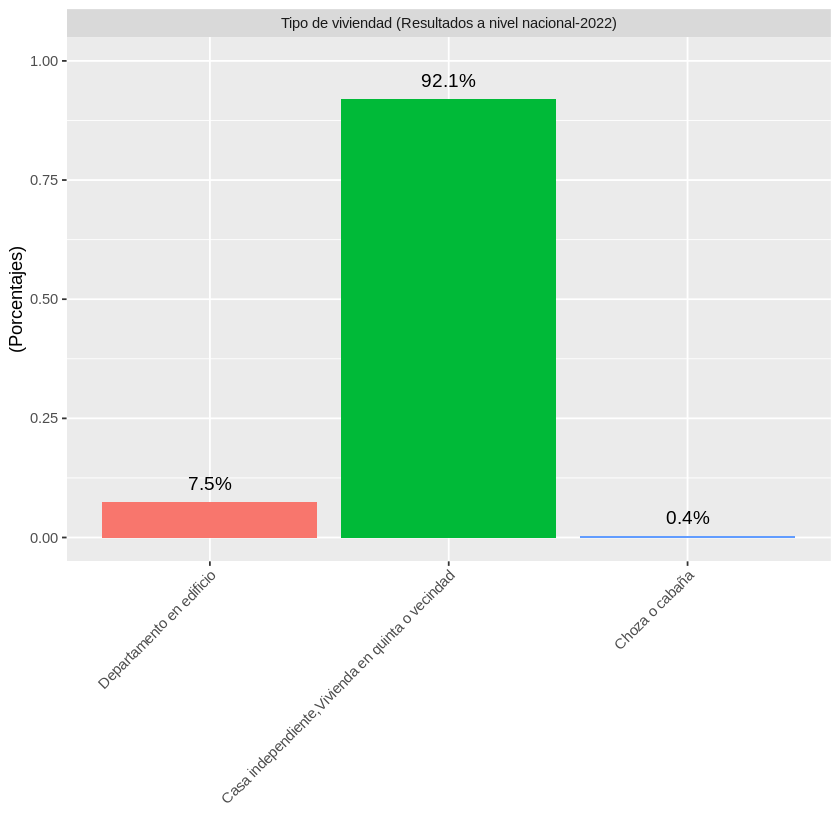

In [ ]:
library(ggplot2)
#Se crea la gráfica para poder entender mejor los resultados
ggplot(tabla1, aes(x = p101RF, y=FrecuenciaRelativa,fill=p101RF) ) +
  geom_bar(width = 0.9, stat="identity", position = position_dodge())+

  ylim(c(0,1))+
  labs(x="" ,y= "(Porcentajes)") +
  labs(fill = "")+

  geom_text(aes(label=paste0(round(FrecuenciaRelativa*100,1), "%")),
            vjust=-0.9,
            color="black",
            hjust=0.5,
            position = position_dodge(0.9),
            angle=0,
            size=4.0
            ) +

  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1),legend.position='none') +


  facet_wrap(~"Tipo de viviendad (Resultados a nivel nacional-2022)")


También sacamos los resultados por departamentos:

In [ ]:
# Calcular la tabla de frecuencia total por departamento y factor
tabla_total <- xtabs(FACTOR07 ~ Departamento + p101RF, data = BaseR)

# Convertir la tabla total a una tabla de frecuencia relativa (porcentajes)
tabla_total_prop <- prop.table(tabla_total, margin = 1) * 100

# Crear una nueva tabla con los porcentajes por departamento y que sumen 100% por fila
tabla_final <- cbind(Total = rowSums(tabla_total_prop), tabla_total_prop)

# Imprimir la tabla final
tabla_final


,Total,Departamento en edificio,"Casa independiente,Vivienda en quinta o vecindad",Choza o cabaña
AMAZONAS,100,6.022577e-02,98.14109,1.79868386
ANCASH,100,1.541575e+00,98.28613,0.17229480
APURIMAC,100,1.426703e+00,98.33599,0.23730796
AREQUIPA,100,2.631729e+00,97.24004,0.12823624
AYACUCHO,100,3.967681e-01,98.92274,0.68049230
CAJAMARCA,100,7.697282e-01,99.23027,0.00000000
CALLAO,100,1.221296e+01,87.78704,0.00000000
CUSCO,100,3.144836e+00,96.79267,0.06249497
HUANCAVELICA,100,8.708772e-01,98.46807,0.66104832
HUANUCO,100,1.600262e+00,97.95858,0.44115687


***¿Cuál es el material predominante de las paredes en las viviendas del Perú***

In [ ]:
#Etiquetamos la variable pero en una variable auxiliar, para no malograr las variables detinadas al análisis del índice
BaseR$p102RF <- factor(BaseR$p102R,
                             labels = c("Ladrillo o bloque de cemento","Piedra o sillar con cal o cemento","Adobe, tapia,piedra con barro","Quincha, madera, triplay, otros"))

In [ ]:
#Se crea una tabla pero considerando los factores de expansión
tabla2<- xtabs(FACTOR07 ~ p102RF, data = BaseR)
tabla2<-transform(tabla2,FrecuenciaRelativa=prop.table(Freq))
tabla2

p102RF,Freq,FrecuenciaRelativa
<fct>,<dbl>,<dbl>
Ladrillo o bloque de cemento,5718784.39,0.57191875
Piedra o sillar con cal o cemento,51821.45,0.00518251
"Adobe, tapia,piedra con barro",3006632.55,0.30068445
"Quincha, madera, triplay, otros",1222056.80,0.12221429


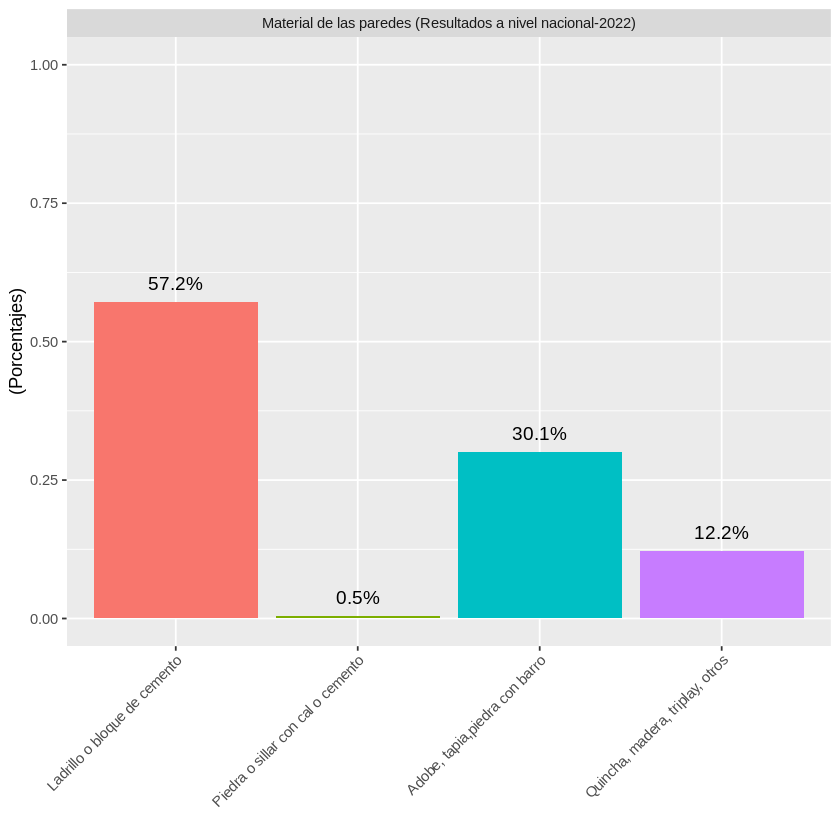

In [ ]:
#Se crea la gráfica para poder entender mejor los resultados

ggplot(tabla2, aes(x = p102RF, y=FrecuenciaRelativa,fill=p102RF) ) +
  geom_bar(width = 0.9, stat="identity", position = position_dodge())+

  ylim(c(0,1))+
  labs(x="" ,y= "(Porcentajes)") +
  labs(fill = "")+

  geom_text(aes(label=paste0(round(FrecuenciaRelativa*100,1), "%")),
            vjust=-0.9,
            color="black",
            hjust=0.5,
            position = position_dodge(0.9),
            angle=0,
            size=4.0
            ) +

  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1),legend.position='none') +


  facet_wrap(~"Material de las paredes (Resultados a nivel nacional-2022)")

In [ ]:
# Calcular la tabla de frecuencia total por departamento y factor
tabla_total <- xtabs(FACTOR07 ~ Departamento + p102RF, data = BaseR)

# Convertir la tabla total a una tabla de frecuencia relativa (porcentajes)
tabla_total_prop <- prop.table(tabla_total, margin = 1) * 100

# Crear una nueva tabla con los porcentajes por departamento y que sumen 100% por fila
tabla_final <- cbind(Total = rowSums(tabla_total_prop), tabla_total_prop)

# Imprimir la tabla final
tabla_final

,Total,Ladrillo o bloque de cemento,Piedra o sillar con cal o cemento,"Adobe, tapia,piedra con barro","Quincha, madera, triplay, otros"
AMAZONAS,100,24.40350,0.05131883,54.555013,20.9901727
ANCASH,100,41.13479,0.17797850,50.284565,8.4026702
APURIMAC,100,25.93066,0.32526335,72.974457,0.7696212
AREQUIPA,100,81.37779,5.84137493,7.070986,5.7098476
AYACUCHO,100,24.58247,0.06441435,69.786769,5.5663437
CAJAMARCA,100,24.32027,0.12980068,72.709330,2.8405995
CALLAO,100,74.64480,0.60354579,3.672826,21.0788269
CUSCO,100,23.32640,1.90824920,70.655226,4.1101294
HUANCAVELICA,100,13.80398,0.29429157,84.759196,1.1425363
HUANUCO,100,23.76187,0.00000000,65.033230,11.2048963


***¿Cuál es el material predominante de los pisos?***

In [ ]:
#Etiquetamos la variable pero en una variable auxiliar, para no malograr las variables detinadas al análisis del índice
BaseR$p103RF <- factor(BaseR$p103R,
                             labels = c("Parquet o madera pulida","Laminas asfálticas, losetas" ,"Cemento","Madera, otros",
                             "Tierra"
                                         ))

In [ ]:
#Se crea una tabla pero considerando los factores de expansión
tabla3<- xtabs(FACTOR07 ~ p103RF, data = BaseR)
tabla3<-transform(tabla3,FrecuenciaRelativa=prop.table(Freq))
tabla3

p103RF,Freq,FrecuenciaRelativa
<fct>,<dbl>,<dbl>
Parquet o madera pulida,387080.1,0.03871074
"Laminas asfálticas, losetas",1913989.0,0.19141239
Cemento,4761354.9,0.47616906
"Madera, otros",613678.4,0.06137217
Tierra,2323192.7,0.23233564


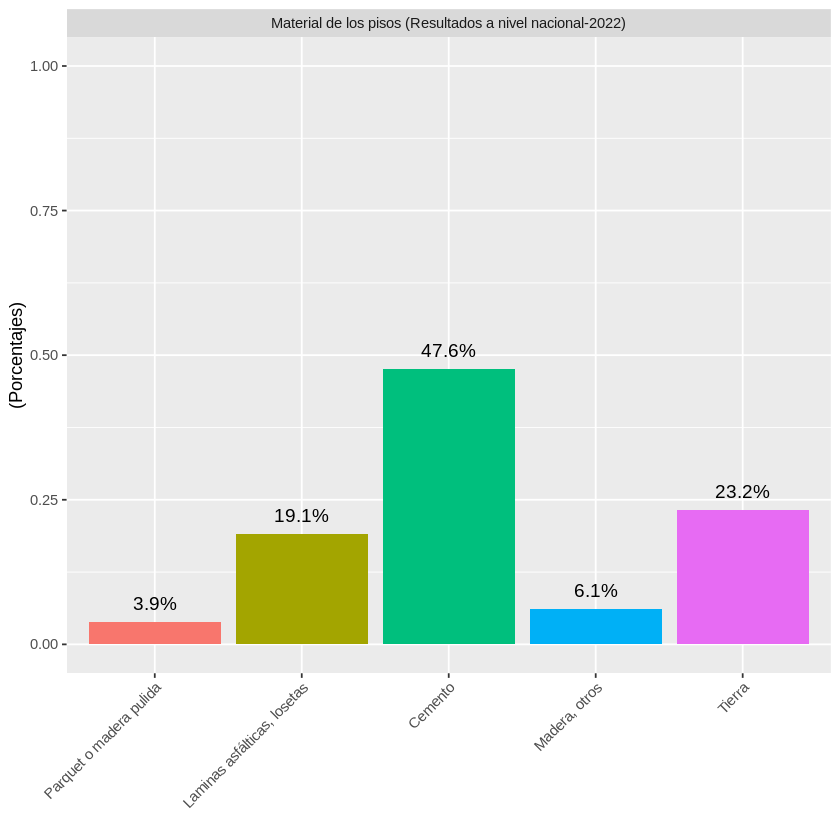

In [ ]:
#Se crea la gráfica para poder entender mejor los resultados

ggplot(tabla3, aes(x = p103RF, y=FrecuenciaRelativa,fill=p103RF) ) +
  geom_bar(width = 0.9, stat="identity", position = position_dodge())+

  ylim(c(0,1))+
  labs(x="" ,y= "(Porcentajes)") +
  labs(fill = "")+

  geom_text(aes(label=paste0(round(FrecuenciaRelativa*100,1), "%")),
            vjust=-0.9,
            color="black",
            hjust=0.5,
            position = position_dodge(0.9),
            angle=0,
            size=4.0
            ) +

  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1),legend.position='none') +


  facet_wrap(~"Material de los pisos (Resultados a nivel nacional-2022)")

In [ ]:
# Calcular la tabla de frecuencia total por departamento y factor
tabla_total <- xtabs(FACTOR07 ~ Departamento + p103RF, data = BaseR)

# Convertir la tabla total a una tabla de frecuencia relativa (porcentajes)
tabla_total_prop <- prop.table(tabla_total, margin = 1) * 100

# Crear una nueva tabla con los porcentajes por departamento y que sumen 100% por fila
tabla_final <- cbind(Total = rowSums(tabla_total_prop), tabla_total_prop)

# Imprimir la tabla final
tabla_final

,Total,Parquet o madera pulida,"Laminas asfálticas, losetas",Cemento,"Madera, otros",Tierra
AMAZONAS,100,0.2398988674,6.614032,47.80469,7.9600317,37.381352
ANCASH,100,0.4867555616,15.390007,41.64044,1.7902509,40.692549
APURIMAC,100,0.0471563556,5.185346,21.97549,6.1706198,66.621393
AREQUIPA,100,2.7997192766,23.817601,65.25002,1.7413618,6.391296
AYACUCHO,100,0.1039236137,6.335134,27.29911,2.9148470,63.346981
CAJAMARCA,100,0.1674691632,6.154255,34.61028,5.2826789,53.785318
CALLAO,100,5.1544436748,32.708927,57.07603,2.1633947,2.897199
CUSCO,100,1.2099263832,9.906702,26.91678,25.9938772,35.972711
HUANCAVELICA,100,0.0354167461,2.996229,16.37705,34.5967140,45.994593
HUANUCO,100,0.7648241675,5.495314,30.85730,9.9881190,52.894439


***¿Cuál es el material predominante de los techos?***

In [ ]:
#Etiquetamos la variable pero en una variable auxiliar, para no malograr las variables detinadas al análisis del índice
BaseR$p103aRF <- factor(BaseR$p103aR,
                             labels = c("Concreto armado","Caña o estera","Madera, Planchas de calamina, triplay, otros","Tejas",
                                        "Pajas y hojas"
                                         ))

In [ ]:
#Se crea una tabla pero considerando los factores de expansión
tabla4<- xtabs(FACTOR07 ~ p103aRF, data = BaseR)
tabla4<-transform(tabla4,FrecuenciaRelativa=prop.table(Freq))
tabla4

p103aRF,Freq,FrecuenciaRelativa
<fct>,<dbl>,<dbl>
Concreto armado,4163539.75,0.416383322
Caña o estera,252239.78,0.025225756
"Madera, Planchas de calamina, triplay, otros",4823575.49,0.482391549
Tejas,667325.13,0.066737216
Pajas y hojas,92615.04,0.009262157


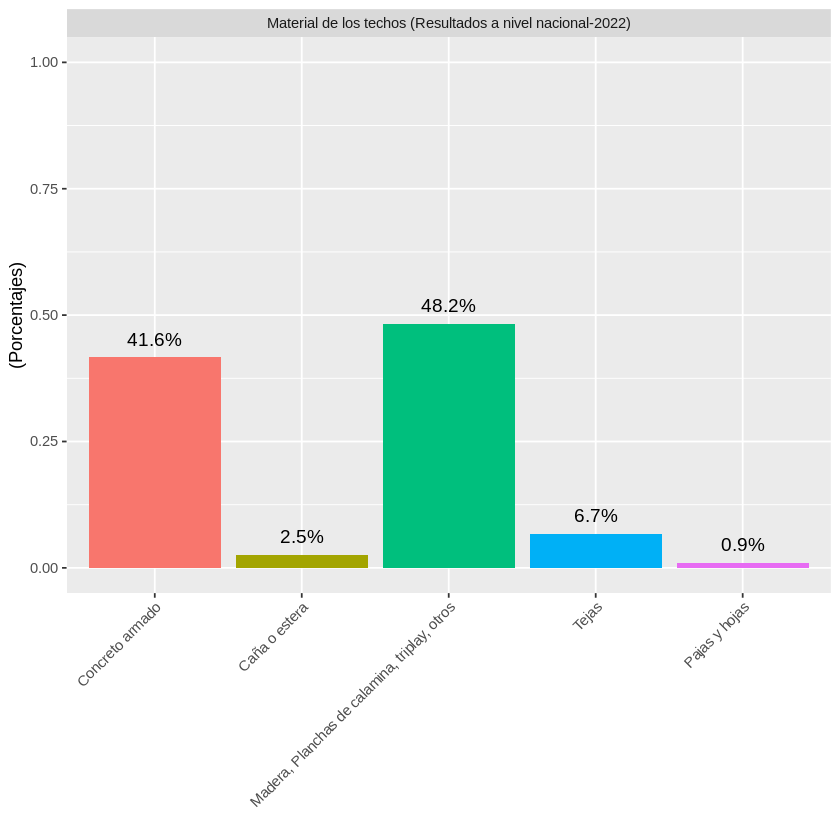

In [ ]:
#Se crea la gráfica para poder entender mejor los resultados

ggplot(tabla4, aes(x = p103aRF, y=FrecuenciaRelativa,fill=p103aRF) ) +
  geom_bar(width = 0.9, stat="identity", position = position_dodge())+

  ylim(c(0,1))+
  labs(x="" ,y= "(Porcentajes)") +
  labs(fill = "")+

  geom_text(aes(label=paste0(round(FrecuenciaRelativa*100,1), "%")),
            vjust=-0.9,
            color="black",
            hjust=0.5,
            position = position_dodge(0.9),
            angle=0,
            size=4.0
            ) +

  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1),legend.position='none') +


  facet_wrap(~"Material de los techos (Resultados a nivel nacional-2022)")

In [ ]:
# Calcular la tabla de frecuencia total por departamento y factor
tabla_total <- xtabs(FACTOR07 ~ Departamento + p103aRF, data = BaseR)

# Convertir la tabla total a una tabla de frecuencia relativa (porcentajes)
tabla_total_prop <- prop.table(tabla_total, margin = 1) * 100

# Crear una nueva tabla con los porcentajes por departamento y que sumen 100% por fila
tabla_final <- cbind(Total = rowSums(tabla_total_prop), tabla_total_prop)

# Imprimir la tabla final
tabla_final

,Total,Concreto armado,Caña o estera,"Madera, Planchas de calamina, triplay, otros",Tejas,Pajas y hojas
AMAZONAS,100,11.188628,0.56789419,77.34355,8.638453225,2.26147629
ANCASH,100,30.420196,2.95890266,49.71224,16.560029008,0.34863563
APURIMAC,100,20.301773,0.19015160,52.20417,25.766543033,1.53736085
AREQUIPA,100,64.005425,0.85653374,34.35536,0.624502683,0.15817702
AYACUCHO,100,20.125984,0.11955755,63.74054,13.860473743,2.15344574
CAJAMARCA,100,17.459076,0.20375606,56.58356,25.753612197,0.00000000
CALLAO,100,60.873874,1.48227648,37.39210,0.167830183,0.08391509
CUSCO,100,18.678863,0.17629738,47.73394,31.674289659,1.73661079
HUANCAVELICA,100,12.094477,0.17816281,61.98116,23.415813181,2.33038310
HUANUCO,100,17.542440,0.30746910,71.99049,6.360240552,3.79936257


***¿Cómo es el agua en el hogar?***

In [ ]:
#Etiquetamos la variable pero en una variable auxiliar, para no malograr las variables detinadas al análisis del índice
BaseR$p110RF <- factor(BaseR$p110R,
                             labels = c("Red pública dentro de la vivienda","Camión cisterna,pozo","Red pública fuera de la vivienda, pilón,otras","Manantial, rio,lago, lagunas, otros"
                                         ))

In [ ]:
#Se crea una tabla pero considerando los factores de expansión
tabla5<- xtabs(FACTOR07 ~ p110RF, data = BaseR)
tabla5<-transform(tabla5,FrecuenciaRelativa=prop.table(Freq))
tabla5

p110RF,Freq,FrecuenciaRelativa
<fct>,<dbl>,<dbl>
Red pública dentro de la vivienda,8237593.2,0.82381738
"Camión cisterna,pozo",544895.0,0.05449334
"Red pública fuera de la vivienda, pilón,otras",892251.4,0.08923143
"Manantial, rio,lago, lagunas, otros",324555.6,0.03245785


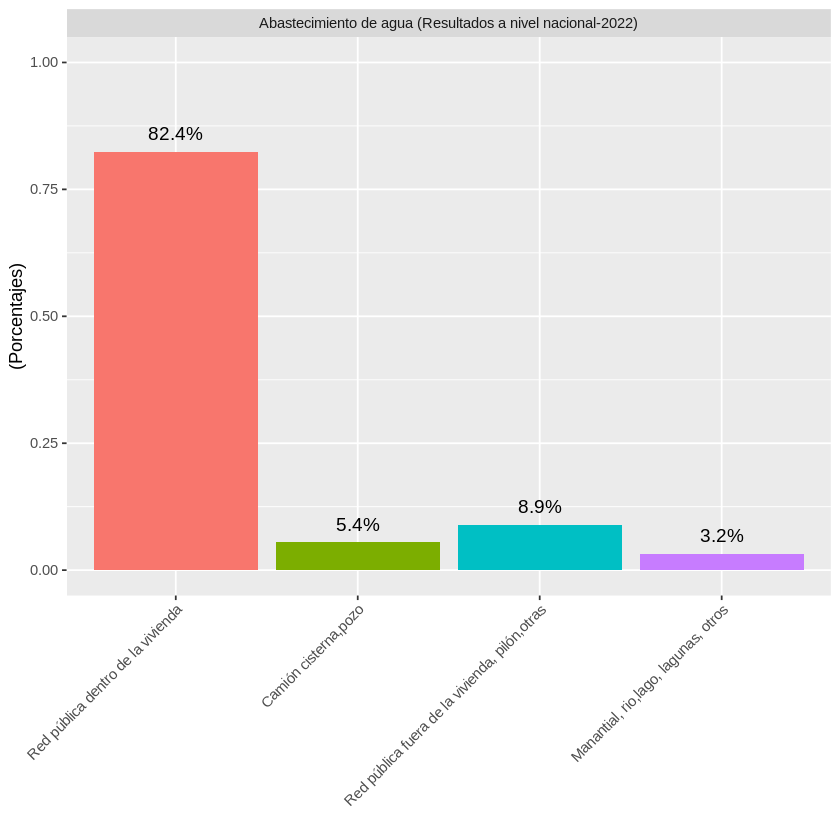

In [ ]:
#Se crea la gráfica para poder entender mejor los resultados

ggplot(tabla5, aes(x = p110RF, y=FrecuenciaRelativa,fill=p110RF) ) +
  geom_bar(width = 0.9, stat="identity", position = position_dodge())+

  ylim(c(0,1))+
  labs(x="" ,y= "(Porcentajes)") +
  labs(fill = "")+

  geom_text(aes(label=paste0(round(FrecuenciaRelativa*100,1), "%")),
            vjust=-0.9,
            color="black",
            hjust=0.5,
            position = position_dodge(0.9),
            angle=0,
            size=4.0
            ) +

  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1),legend.position='none') +


  facet_wrap(~"Abastecimiento de agua (Resultados a nivel nacional-2022)")

In [ ]:
# Calcular la tabla de frecuencia total por departamento y factor
tabla_total <- xtabs(FACTOR07 ~ Departamento + p110RF, data = BaseR)

# Convertir la tabla total a una tabla de frecuencia relativa (porcentajes)
tabla_total_prop <- prop.table(tabla_total, margin = 1) * 100

# Crear una nueva tabla con los porcentajes por departamento y que sumen 100% por fila
tabla_final <- cbind(Total = rowSums(tabla_total_prop), tabla_total_prop)

# Imprimir la tabla final
tabla_final

,Total,Red pública dentro de la vivienda,"Camión cisterna,pozo","Red pública fuera de la vivienda, pilón,otras","Manantial, rio,lago, lagunas, otros"
AMAZONAS,100,82.64988,2.5028250,8.142249,6.70504193
ANCASH,100,87.31816,4.7643998,6.301464,1.61597920
APURIMAC,100,87.93236,0.0000000,9.607146,2.46049726
AREQUIPA,100,75.49172,7.0081419,15.582471,1.91766216
AYACUCHO,100,78.95701,2.3829325,15.890665,2.76939573
CAJAMARCA,100,86.69420,1.8211791,6.457499,5.02711736
CALLAO,100,92.82145,1.5754773,5.603069,0.00000000
CUSCO,100,79.14198,0.6144597,15.852820,4.39074486
HUANCAVELICA,100,79.70008,0.0000000,11.677802,8.62211690
HUANUCO,100,74.70263,0.6839083,7.512026,17.10143848


***¿Cuál es la conexión del baño o servicio higiénico?***

In [ ]:
#Etiquetamos la variable pero en una variable auxiliar, para no malograr las variables detinadas al análisis del índice
BaseR$p111aRF <- factor(BaseR$p111aR,
                             labels = c("Red pública de desague dentro del hogar","Red pública de desague fuera del hogar","Letrina","Pozo",
                                        "Río acequia, campo abierto,otro"
                                         ))

In [ ]:
#Se crea una tabla pero considerando los factores de expansión
tabla6<- xtabs(FACTOR07 ~ p111aRF, data = BaseR)
tabla6<-transform(tabla6,FrecuenciaRelativa=prop.table(Freq))
tabla6

p111aRF,Freq,FrecuenciaRelativa
<fct>,<dbl>,<dbl>
Red pública de desague dentro del hogar,6724742.6,0.67252166
Red pública de desague fuera del hogar,408428.4,0.04084572
Letrina,239839.5,0.02398564
Pozo,1573655.7,0.15737666
"Río acequia, campo abierto,otro",1052629.0,0.10527032


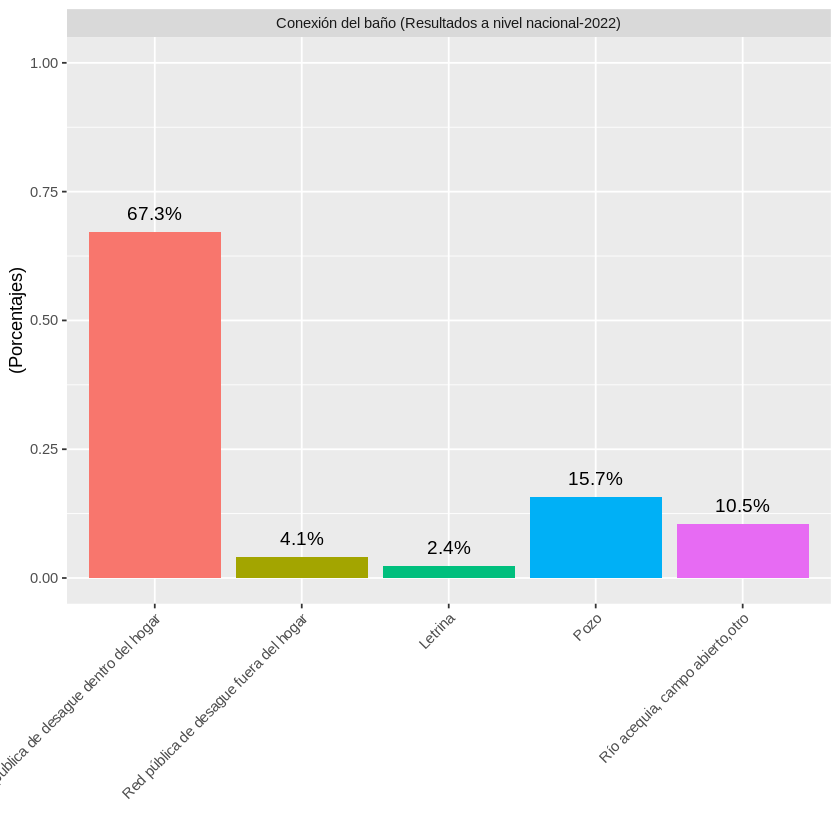

In [ ]:
#Se crea la gráfica para poder entender mejor los resultados

ggplot(tabla6, aes(x = p111aRF, y=FrecuenciaRelativa,fill=p111aRF) ) +
  geom_bar(width = 0.9, stat="identity", position = position_dodge())+

  ylim(c(0,1))+
  labs(x="" ,y= "(Porcentajes)") +
  labs(fill = "")+

  geom_text(aes(label=paste0(round(FrecuenciaRelativa*100,1), "%")),
            vjust=-0.9,
            color="black",
            hjust=0.5,
            position = position_dodge(0.9),
            angle=0,
            size=4.0
            ) +

  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1),legend.position='none') +


  facet_wrap(~"Conexión del baño (Resultados a nivel nacional-2022)")

In [ ]:
# Calcular la tabla de frecuencia total por departamento y factor
tabla_total <- xtabs(FACTOR07 ~ Departamento + p111aRF, data = BaseR)

# Convertir la tabla total a una tabla de frecuencia relativa (porcentajes)
tabla_total_prop <- prop.table(tabla_total, margin = 1) * 100

# Crear una nueva tabla con los porcentajes por departamento y que sumen 100% por fila
tabla_final <- cbind(Total = rowSums(tabla_total_prop), tabla_total_prop)

# Imprimir la tabla final
tabla_final

,Total,Red pública de desague dentro del hogar,Red pública de desague fuera del hogar,Letrina,Pozo,"Río acequia, campo abierto,otro"
AMAZONAS,100,53.44027,5.7498206,0.1047478,24.746383,15.958774
ANCASH,100,64.96315,1.4514016,2.6455471,17.994174,12.945730
APURIMAC,100,52.58550,7.3158893,1.9814426,28.852272,9.264896
AREQUIPA,100,71.83182,4.6378624,3.5774970,11.261884,8.690937
AYACUCHO,100,51.20830,10.0651500,0.8275165,25.012839,12.886194
CAJAMARCA,100,43.36021,2.2378332,4.8471280,41.797925,7.756899
CALLAO,100,91.34665,1.8958924,1.8703613,2.900385,1.986707
CUSCO,100,53.21114,13.5855300,0.2580973,12.748538,20.196690
HUANCAVELICA,100,37.72181,6.7791202,1.2730023,40.000093,14.225969
HUANUCO,100,41.03149,2.8968467,1.8628924,29.779317,24.429456


***¿Que porcentaje tiene alumbrado eléctrico?***

In [ ]:
#Etiquetamos la variable pero en una variable auxiliar, para no malograr las variables detinadas al análisis del índice
BaseR$p1121RF <- factor(BaseR$p1121R,
                             labels = c("Si","No"
                                         ))

In [ ]:
#Se crea una tabla pero considerando los factores de expansión
tabla7<- xtabs(FACTOR07 ~ p1121RF, data = BaseR)
tabla7<-transform(tabla7,FrecuenciaRelativa=prop.table(Freq))
tabla7

p1121RF,Freq,FrecuenciaRelativa
<fct>,<dbl>,<dbl>
Si,9580168,0.95808435
No,419127,0.04191565


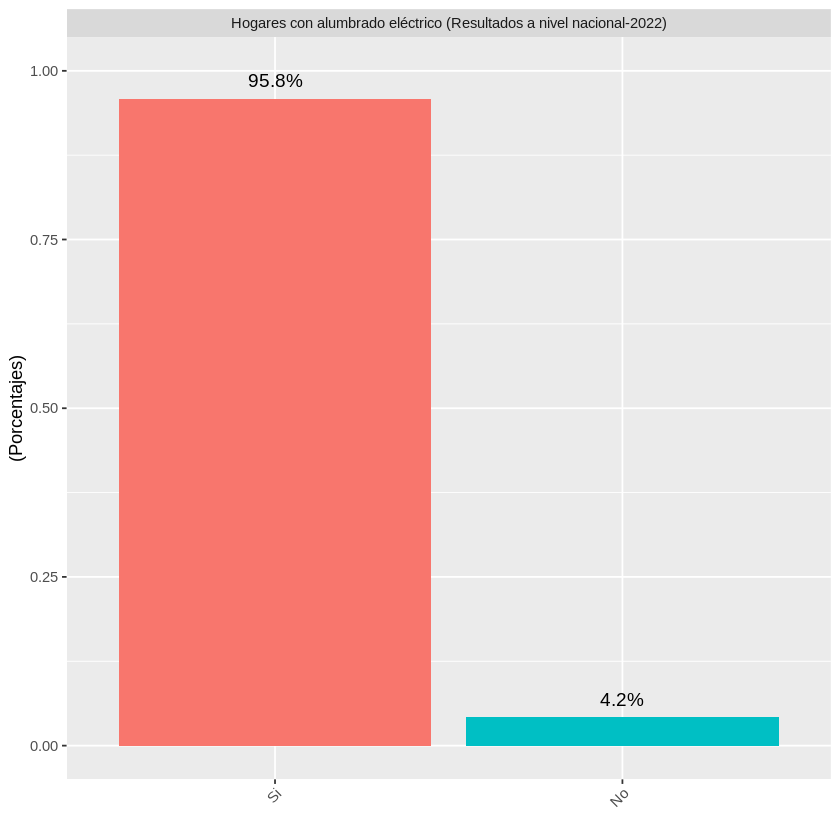

In [ ]:
#Se crea la gráfica para poder entender mejor los resultados

ggplot(tabla7, aes(x = p1121RF, y=FrecuenciaRelativa,fill=p1121RF) ) +
  geom_bar(width = 0.9, stat="identity", position = position_dodge())+

  ylim(c(0,1))+
  labs(x="" ,y= "(Porcentajes)") +
  labs(fill = "")+

  geom_text(aes(label=paste0(round(FrecuenciaRelativa*100,1), "%")),
            vjust=-0.9,
            color="black",
            hjust=0.5,
            position = position_dodge(0.9),
            angle=0,
            size=4.0
            ) +

  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1),legend.position='none') +


  facet_wrap(~"Hogares con alumbrado eléctrico (Resultados a nivel nacional-2022)")

In [ ]:
# Calcular la tabla de frecuencia total por departamento y factor
tabla_total <- xtabs(FACTOR07 ~ Departamento + p1121RF, data = BaseR)

# Convertir la tabla total a una tabla de frecuencia relativa (porcentajes)
tabla_total_prop <- prop.table(tabla_total, margin = 1) * 100

# Crear una nueva tabla con los porcentajes por departamento y que sumen 100% por fila
tabla_final <- cbind(Total = rowSums(tabla_total_prop), tabla_total_prop)

# Imprimir la tabla final
tabla_final

,Total,Si,No
AMAZONAS,100,89.10091,10.8990890
ANCASH,100,96.96190,3.0380950
APURIMAC,100,96.03219,3.9678051
AREQUIPA,100,97.11678,2.8832247
AYACUCHO,100,94.15407,5.8459297
CAJAMARCA,100,93.67494,6.3250638
CALLAO,100,99.26827,0.7317285
CUSCO,100,94.61345,5.3865520
HUANCAVELICA,100,91.35911,8.6408896
HUANUCO,100,84.98357,15.0164284


***¿Que porcentaje de hogares tienen teléfono fijo?***

In [ ]:
#Etiquetamos la variable pero en una variable auxiliar, para no malograr las variables detinadas al análisis del índice
BaseR$p1141RF <- factor(BaseR$p1141R,
                             labels = c("Si","No"
                                         ))

In [ ]:
#Se crea una tabla pero considerando los factores de expansión
tabla8<- xtabs(FACTOR07 ~ p1141RF, data = BaseR)
tabla8<-transform(tabla8,FrecuenciaRelativa=prop.table(Freq))
tabla8

p1141RF,Freq,FrecuenciaRelativa
<fct>,<dbl>,<dbl>
Si,1001854,0.1001925
No,8997441,0.8998075


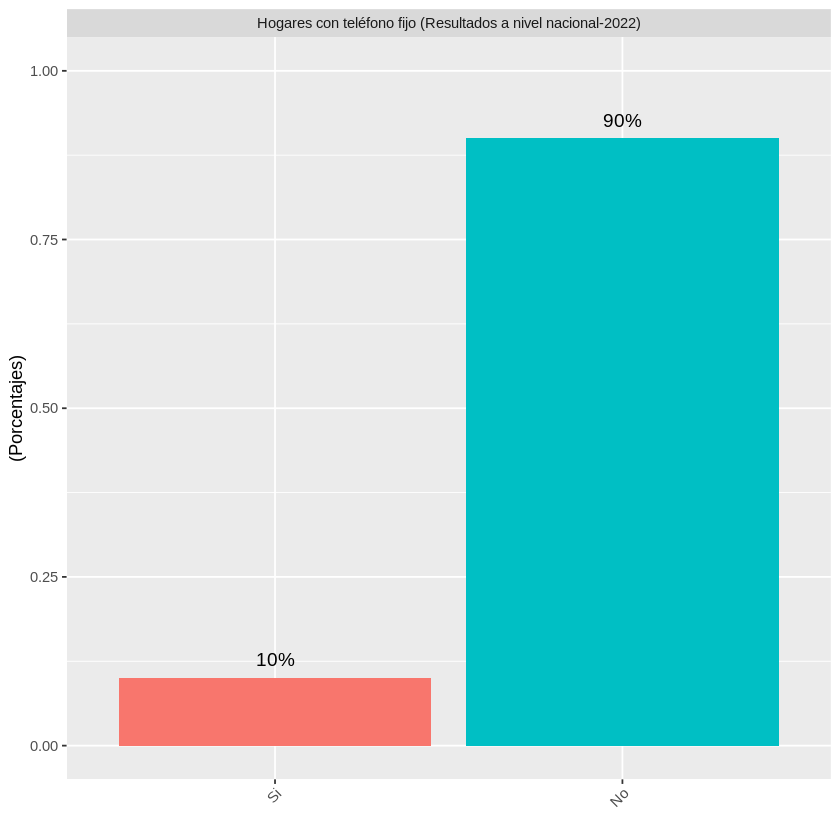

In [ ]:
#Se crea la gráfica para poder entender mejor los resultados

ggplot(tabla8, aes(x = p1141RF, y=FrecuenciaRelativa,fill=p1141RF) ) +
  geom_bar(width = 0.9, stat="identity", position = position_dodge())+

  ylim(c(0,1))+
  labs(x="" ,y= "(Porcentajes)") +
  labs(fill = "")+

  geom_text(aes(label=paste0(round(FrecuenciaRelativa*100,1), "%")),
            vjust=-0.9,
            color="black",
            hjust=0.5,
            position = position_dodge(0.9),
            angle=0,
            size=4.0
            ) +

  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1),legend.position='none') +


  facet_wrap(~"Hogares con teléfono fijo (Resultados a nivel nacional-2022)")

In [ ]:
# Calcular la tabla de frecuencia total por departamento y factor
tabla_total <- xtabs(FACTOR07 ~ Departamento + p1141RF, data = BaseR)

# Convertir la tabla total a una tabla de frecuencia relativa (porcentajes)
tabla_total_prop <- prop.table(tabla_total, margin = 1) * 100

# Crear una nueva tabla con los porcentajes por departamento y que sumen 100% por fila
tabla_final <- cbind(Total = rowSums(tabla_total_prop), tabla_total_prop)

# Imprimir la tabla final
tabla_final

,Total,Si,No
AMAZONAS,100,0.6375612,99.36244
ANCASH,100,8.9135702,91.08643
APURIMAC,100,0.7024289,99.29757
AREQUIPA,100,12.2781901,87.72181
AYACUCHO,100,1.9499738,98.05003
CAJAMARCA,100,2.0833406,97.91666
CALLAO,100,19.2194841,80.78052
CUSCO,100,2.7561344,97.24387
HUANCAVELICA,100,0.3736614,99.62634
HUANUCO,100,2.0235809,97.97642


***¿Que porcentaje de hogares con teléfono celular?***

In [ ]:
#Etiquetamos la variable pero en una variable auxiliar, para no malograr las variables detinadas al análisis del índice
BaseR$p1142RF <- factor(BaseR$p1142R,
                             labels = c("Si","No"
                                         ))

In [ ]:
#Se crea una tabla pero considerando los factores de expansión
tabla9<- xtabs(FACTOR07 ~ p1142RF, data = BaseR)
tabla9<-transform(tabla9,FrecuenciaRelativa=prop.table(Freq))
tabla9

p1142RF,Freq,FrecuenciaRelativa
<fct>,<dbl>,<dbl>
Si,9444708.5,0.94453742
No,554586.7,0.05546258


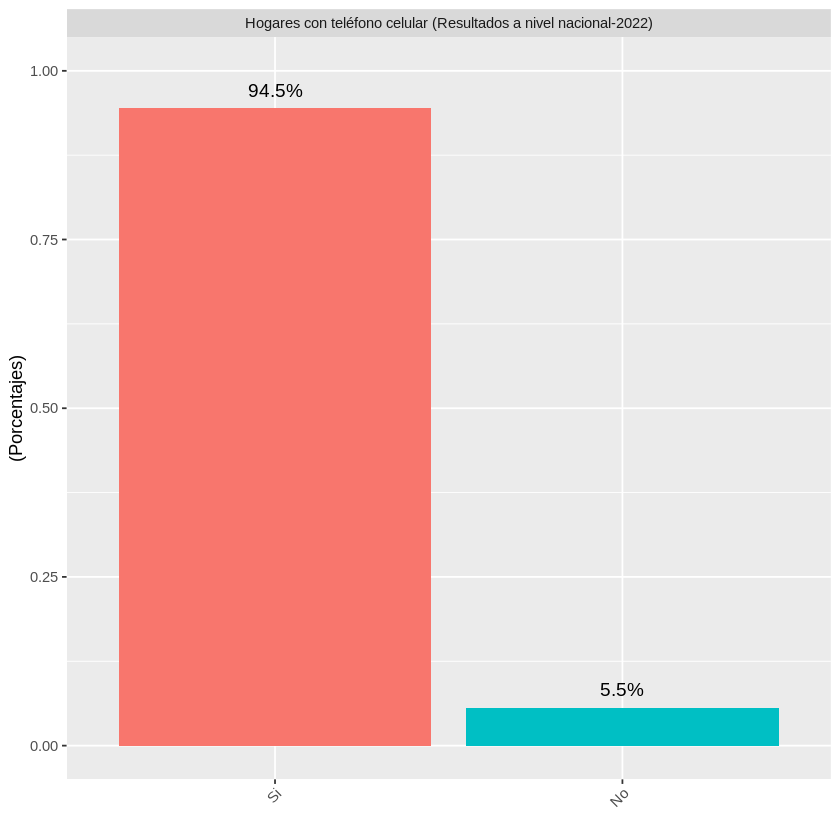

In [ ]:
#Se crea la gráfica para poder entender mejor los resultados

ggplot(tabla9, aes(x = p1142RF, y=FrecuenciaRelativa,fill=p1142RF) ) +
  geom_bar(width = 0.9, stat="identity", position = position_dodge())+

  ylim(c(0,1))+
  labs(x="" ,y= "(Porcentajes)") +
  labs(fill = "")+

  geom_text(aes(label=paste0(round(FrecuenciaRelativa*100,1), "%")),
            vjust=-0.9,
            color="black",
            hjust=0.5,
            position = position_dodge(0.9),
            angle=0,
            size=4.0
            ) +

  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1),legend.position='none') +


  facet_wrap(~"Hogares con teléfono celular (Resultados a nivel nacional-2022)")

In [ ]:
# Calcular la tabla de frecuencia total por departamento y factor
tabla_total <- xtabs(FACTOR07 ~ Departamento + p1142RF, data = BaseR)

# Convertir la tabla total a una tabla de frecuencia relativa (porcentajes)
tabla_total_prop <- prop.table(tabla_total, margin = 1) * 100

# Crear una nueva tabla con los porcentajes por departamento y que sumen 100% por fila
tabla_final <- cbind(Total = rowSums(tabla_total_prop), tabla_total_prop)

# Imprimir la tabla final
tabla_final

,Total,Si,No
AMAZONAS,100,90.37243,9.627574
ANCASH,100,95.68037,4.319627
APURIMAC,100,89.76031,10.239692
AREQUIPA,100,97.97752,2.022481
AYACUCHO,100,91.28381,8.716185
CAJAMARCA,100,91.06423,8.935765
CALLAO,100,96.96809,3.031908
CUSCO,100,92.52528,7.474719
HUANCAVELICA,100,91.25447,8.745527
HUANUCO,100,92.80445,7.195554


***¿Qué porrcentaje de hogares tiene TV cable?***

In [ ]:
#Etiquetamos la variable pero en una variable auxiliar, para no malograr las variables detinadas al análisis del índice
BaseR$p1143RF <- factor(BaseR$p1143R,
                             labels = c("Si","No"
                                         ))

In [ ]:
#Se crea una tabla pero considerando los factores de expansión
tabla10<- xtabs(FACTOR07 ~ p1143RF, data = BaseR)
tabla10<-transform(tabla10,FrecuenciaRelativa=prop.table(Freq))
tabla10

p1143RF,Freq,FrecuenciaRelativa
<fct>,<dbl>,<dbl>
Si,3197815,0.319804
No,6801480,0.680196


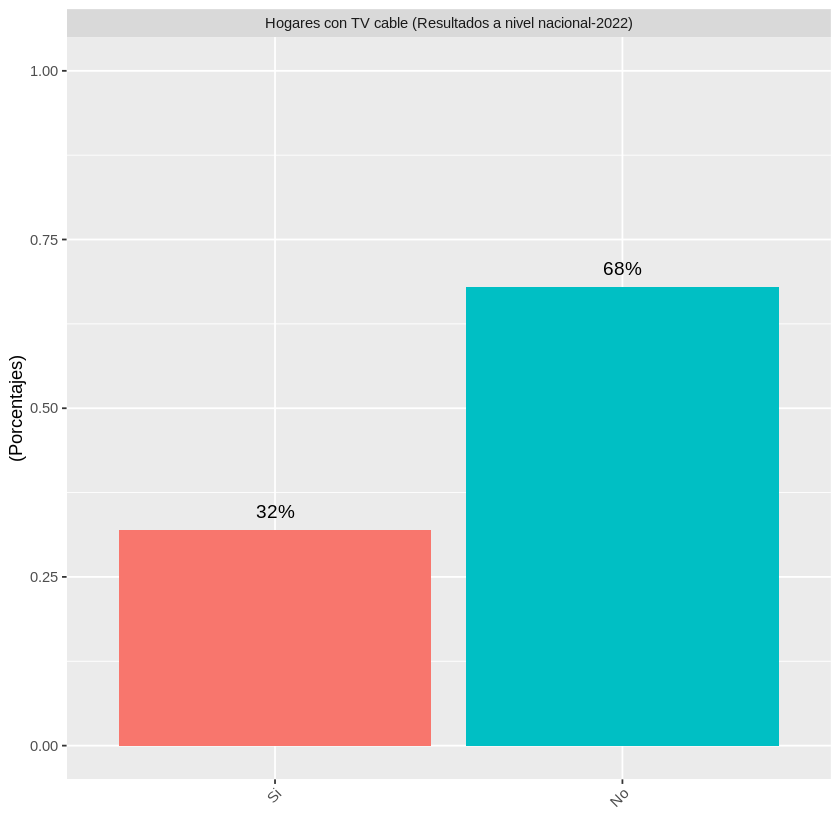

In [ ]:
#Se crea la gráfica para poder entender mejor los resultados

ggplot(tabla10, aes(x = p1143RF, y=FrecuenciaRelativa,fill=p1143RF) ) +
  geom_bar(width = 0.9, stat="identity", position = position_dodge())+

  ylim(c(0,1))+
  labs(x="" ,y= "(Porcentajes)") +
  labs(fill = "")+

  geom_text(aes(label=paste0(round(FrecuenciaRelativa*100,1), "%")),
            vjust=-0.9,
            color="black",
            hjust=0.5,
            position = position_dodge(0.9),
            angle=0,
            size=4.0
            ) +

  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1),legend.position='none') +


  facet_wrap(~"Hogares con TV cable (Resultados a nivel nacional-2022)")

In [ ]:
# Calcular la tabla de frecuencia total por departamento y factor
tabla_total <- xtabs(FACTOR07 ~ Departamento + p1143RF, data = BaseR)

# Convertir la tabla total a una tabla de frecuencia relativa (porcentajes)
tabla_total_prop <- prop.table(tabla_total, margin = 1) * 100

# Crear una nueva tabla con los porcentajes por departamento y que sumen 100% por fila
tabla_final <- cbind(Total = rowSums(tabla_total_prop), tabla_total_prop)

# Imprimir la tabla final
tabla_final

,Total,Si,No
AMAZONAS,100,31.756904,68.24310
ANCASH,100,30.532783,69.46722
APURIMAC,100,15.105876,84.89412
AREQUIPA,100,26.547601,73.45240
AYACUCHO,100,12.597070,87.40293
CAJAMARCA,100,14.476218,85.52378
CALLAO,100,38.585376,61.41462
CUSCO,100,9.243384,90.75662
HUANCAVELICA,100,9.487203,90.51280
HUANUCO,100,20.556092,79.44391


***¿Qué porcentaje de hogares tiene Internet?***

In [ ]:
#Etiquetamos la variable pero en una variable auxiliar, para no malograr las variables detinadas al análisis del índice
BaseR$p1144RF <- factor(BaseR$p1144R,
                             labels = c("Si","No"
                                         ))

In [ ]:
#Se crea una tabla pero considerando los factores de expansión
tabla11<- xtabs(FACTOR07 ~ p1144RF, data = BaseR)
tabla11<-transform(tabla11,FrecuenciaRelativa=prop.table(Freq))
tabla11

p1144RF,Freq,FrecuenciaRelativa
<fct>,<dbl>,<dbl>
Si,5520454,0.5520843
No,4478841,0.4479157


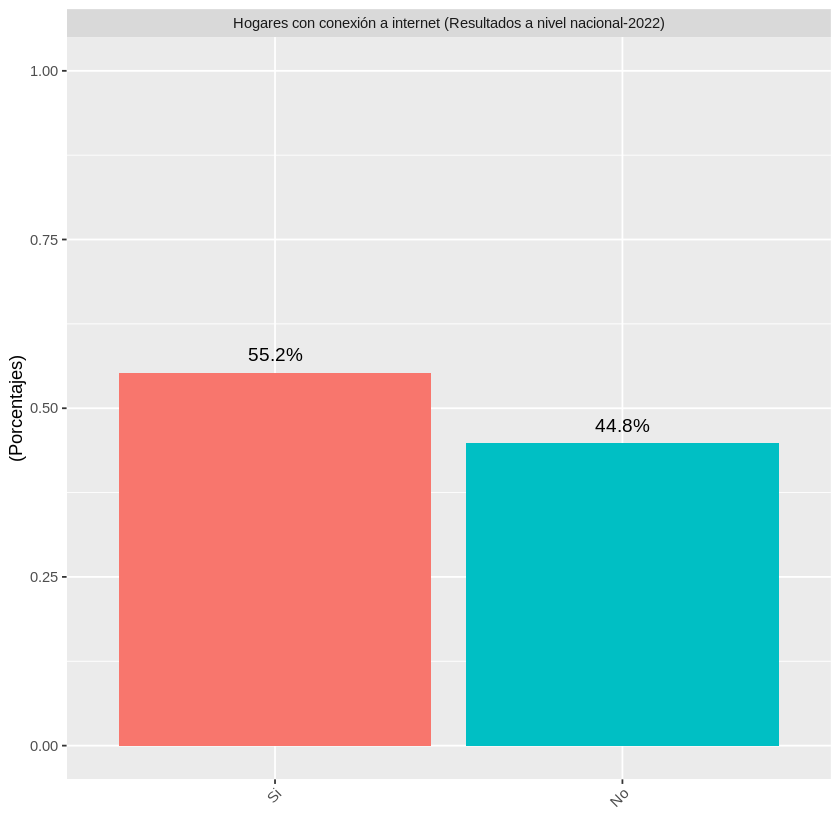

In [ ]:
#Se crea la gráfica para poder entender mejor los resultados

ggplot(tabla11, aes(x = p1144RF, y=FrecuenciaRelativa,fill=p1144RF) ) +
  geom_bar(width = 0.9, stat="identity", position = position_dodge())+

  ylim(c(0,1))+
  labs(x="" ,y= "(Porcentajes)") +
  labs(fill = "")+

  geom_text(aes(label=paste0(round(FrecuenciaRelativa*100,1), "%")),
            vjust=-0.9,
            color="black",
            hjust=0.5,
            position = position_dodge(0.9),
            angle=0,
            size=4.0
            ) +

  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1),legend.position='none') +


  facet_wrap(~"Hogares con conexión a internet (Resultados a nivel nacional-2022)")

In [ ]:
# Calcular la tabla de frecuencia total por departamento y factor
tabla_total <- xtabs(FACTOR07 ~ Departamento + p1144RF, data = BaseR)

# Convertir la tabla total a una tabla de frecuencia relativa (porcentajes)
tabla_total_prop <- prop.table(tabla_total, margin = 1) * 100

# Crear una nueva tabla con los porcentajes por departamento y que sumen 100% por fila
tabla_final <- cbind(Total = rowSums(tabla_total_prop), tabla_total_prop)

# Imprimir la tabla final
tabla_final

,Total,Si,No
AMAZONAS,100,40.85306,59.14694
ANCASH,100,50.85582,49.14418
APURIMAC,100,35.61248,64.38752
AREQUIPA,100,68.61825,31.38175
AYACUCHO,100,38.50395,61.49605
CAJAMARCA,100,34.35064,65.64936
CALLAO,100,71.49652,28.50348
CUSCO,100,39.75897,60.24103
HUANCAVELICA,100,26.10972,73.89028
HUANUCO,100,29.92456,70.07544


# 4 CONSTRUCCIÓN DEL ÍNDICE DE VULNERABILIDAD VIVIENDAS

**4. DESARROLLO DEL ANÁLISIS DE COMPONENTES PRINCIPALES CATEGÓRICOS**:

Este punto es el eje del estudio, es la creación del índice de vulnerabilidad que tendrá tres miradas:
- Carcaterísticas de la vivienda
- Acceso a serivicios básicos
- Accceso a servicios de tecnología

Luego dando un peso igual a cada una de las dimensiones (tal como lo hacen en la bibliografía encontrada) se llegará al índice de vulnerabilidad global, que va del 0 al 100, donde cero represente la mínima vulnerabilidad y 100 la máxima vulnerabilidad de los hogares. Esto facilitará las comparaciones entre departamentos.

**4.1 Variables a considerar**

Lo primero que hay especificar son las variables que participaran del indicador, estas han sido tomadas del módulo I de la ENAHO, recordar que ya estas han sido trabajadas y revisadas en los puntos anteriores.

| Nombre de Variable | Etiqueta de variable | Dimensión
| --- | --- | --- |
| p101R | Tipo de vivienda | A.	Características de las viviendas |
| p102R | El material predominante en las paredes exteriores | A.	Características de las viviendas |
| p103R | El material predominante en los pisos | A.	Características de las viviendas |
| p103aR | El material predominante en los techos | A.	Características de las viviendas|
| p110R | Agua que utilizan en el hogar  | B.	Servicios básicos |
| p111aR | El baño o servicio higiénico que tiene su hogar  | B.	Servicios básicos |
| p1121R | Tipo de alumbrado del hogar: Electricidad| B.	Servicios básicos |
| p1141R | Su hogar tiene: Teléfono (fijo) | C. Servicios de teconología |
| p1142R | Su hogar tiene: Teléfono Celular | C. Servicios de teconología |
| p1143R | Su hogar tiene: Conexión a TV | C. Servicios de teconología |
| p1144R | Su hogar tiene: Conexión a Internet | C. Servicios de teconología |

Se formará una base sólo con estas variables:

In [ ]:
BasePC<-BaseR %>% select(p101R,p102R,p103R,p103aR,p110R,p111aR,p1121R,p1141R,p1142R,p1143R,p1144R)
BasePC$p101R<-as.integer(BasePC$p101R)
BasePC$p102R<-as.integer(BasePC$p102R)
BasePC$p103R<-as.integer(BasePC$p103R)
BasePC$p103aR<-as.integer(BasePC$p103aR)
BasePC$p110R<-as.integer(BasePC$p110R)
BasePC$p111aR<-as.integer(BasePC$p111aR)
BasePC$p1121R<-as.integer(BasePC$p1121R)
BasePC$p1141R<-as.integer(BasePC$p1141R)
BasePC$p1142R<-as.integer(BasePC$p1142R)
BasePC$p1143R<-as.integer(BasePC$p1143R)
BasePC$p1144R<-as.integer(BasePC$p1144R)


In [ ]:
head(BasePC)

,p101R,p102R,p103R,p103aR,p110R,p111aR,p1121R,p1141R,p1142R,p1143R,p1144R
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2,1,3,3,1,1,1,2,1,1,2
2,2,1,2,3,1,1,1,2,1,1,1
3,2,1,5,3,1,1,1,2,1,2,1
4,2,1,3,1,1,1,1,2,1,1,2
5,2,3,3,3,1,1,1,2,1,1,2
6,2,3,3,3,1,4,1,2,1,2,1


In [ ]:
colSums(is.na(BasePC))

p101R  p102R  p103R p103aR  p110R p111aR p1121R p1141R p1142R p1143R p1144R 
     0      0      0      0      0      0      0      0      0      0      0

**4.2 Trabajo con el análisis de componentes principales**:

Si bien es cierto el análisis de componentes principales categóricos funciona con variables en escala ordinal o nominal, en este caso se optará por trabajar sólo con variables en escala ordinal, y para ello se está usando las recodificaciones hechas basado en los análisis clúster donde se agruparon las opciones de respuesta de menos vulnerables a más vulnerables). El análisis de componentes principales categóricos se irá aplicando en cada una de las dimensiones definidas: Características de la vivienda, servicios básicos y servicios de tecnología.

In [ ]:
#Se instala el paquete que contiene el paqueta para el trabajo de PRINCAL
install.packages("Gifi")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**4.2.1 Análisis de componentes principales categóricos- Características de la vivienda**:

Se comienza con el análisis multivariado de componentes principales categóricos para las variables de características de la vivienda:

| Nombre de Variable | Etiqueta de variable | Dimensión
| --- | --- | --- |
| p101R | Tipo de vivienda | A.	Características de las viviendas |
| p102R | El material predominante en las paredes exteriores | A.	Características de las viviendas |
| p103R | El material predominante en los pisos | A.	Características de las viviendas |
| p103aR | El material predominante en los techos | A.	Características de las viviendas|


**Paso 1 (Características de la vivienda) : Aplicación del análsis de componentes principales categóricos**

Se procede a correr el análisis:

In [ ]:

library("Gifi")
df1<-data.frame(BasePC$p101R,BasePC$p102R,BasePC$p103R,BasePC$p103aR)
resultados_d1<-princals(df1,ndim = 1,ordinal = TRUE)

Del análisis se puede revisar los autovalores obtenidos:

In [ ]:
resultados_d1$evals

[1] 2.4855367 0.8372609 0.3812517 0.2959508

Estos resultados son de suma importancia ya que permite validar el número de componentes a trabajar bajo tres miradas:
- Autovalores por encima de uno
- % de varianza explicada
- Gráfico de sedimentación

Se pasa a revisar los dos primeros puntos:

In [ ]:
# Calcular el porcentaje de varianza explicada por cada autovalor
porcentaje_varianza <- resultados_d1$evals / sum(resultados_d1$evals)

# Creando la tabla
tabla_autovalores <- data.frame(
  Numero_de_Variables = 1:length(resultados_d1$evals),
  Autovalores = resultados_d1$evals,
  Porcentaje = porcentaje_varianza
)

# Se imprime la tabla
tabla_autovalores


Numero_de_Variables,Autovalores,Porcentaje
<int>,<dbl>,<dbl>
1,2.4855367,0.62138416
2,0.8372609,0.20931523
3,0.3812517,0.09531292
4,0.2959508,0.07398769


Se puede observar que el primer componente es significativamente el de mayor magnitud, siendo el único que supera la unidad (valor de referencia). Con este componente, ya se explica más del 50% de la varianza, lo cual cumple con el segundo criterio. Por lo tanto, basado en estos dos primeros criterios, se optaría por retener solo un componente. Ahora se procede a revisar el último criterio, el gráfico de sedimentación:

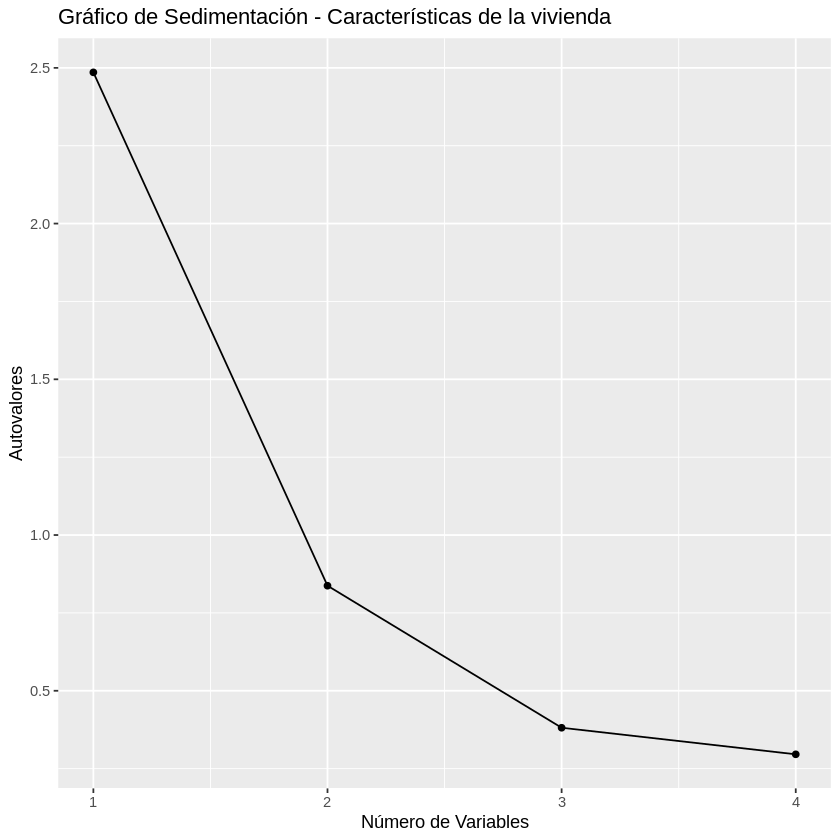

In [ ]:
# Graficar el gráfico de sedimentación (Scree plot)
library(ggplot2)

sedimentacion <- ggplot(data = tabla_autovalores, aes(x = Numero_de_Variables, y = Autovalores)) +
  geom_point() +
  geom_line() +
  labs(x = "Número de Variables", y = "Autovalores", title = "Gráfico de Sedimentación - Características de la vivienda")

print(sedimentacion)


En el gráfico de sedimentación, el primer punto de inflexión se produce al pasar del primer al segundo componente. Por lo tanto, se podría optar por retener únicamente el primer componente. En consecuencia, basado en los tres criterios revisados, se trabajará con una sola dimensión, lo que proporciona las condiciones ideales para la construcción del índice.

Ahora se explicará paso a paso la construcción del índice de vulnerabilidad para la "**Calidad de la vivienda**":

**Paso 2 (Características de la vivienda) : Proceso de cuantificación de categorías de las variables**

Lo que interesa en esta parte son los valores que se le asigna a cada una de las categorías de las variables ordinales, proceso de escalamiento óptimo, esto ayudará a la construcción del índice. A continuación se muestra que resultado tiene por cada variable:

In [ ]:
resultados_d1$quantifications

,D1
1,-0.0112340070
2,0.0004178313
3,0.0136687599
,D1
1,-0.0045901691
2,-0.0006365973
3,0.0046706074
4,0.0046706074
,D1
1,-0.009131813


Las cuantificaciones obtenidas serán guardado en vectores:

In [ ]:
print("Valores asignados a p101R-Tipo de vivienda:")
v1_p101R<-resultados_d1$quantifications$BasePC.p101R
v1_p101R

print("Valores asignados a p102R-Material de paredes:")
v1_p102R<-resultados_d1$quantifications$BasePC.p102R
v1_p102R

print("Valores asignados a p103R-Material de los pisos:")
v1_p103R<-resultados_d1$quantifications$BasePC.p103R
v1_p103R

print("Valores asignados a p103aR-Material de los techos:")
v1_p103aR<-resultados_d1$quantifications$BasePC.p103aR
v1_p103aR


[1] "Valores asignados a p101R-Tipo de vivienda:"


,D1
1,-0.0112340070
2,0.0004178313
3,0.0136687599


[1] "Valores asignados a p102R-Material de paredes:"


,D1
1,-0.0045901691
2,-0.0006365973
3,0.0046706074
4,0.0046706074


[1] "Valores asignados a p103R-Material de los pisos:"


,D1
1,-0.009131813
2,-0.007138662
3,-0.001002761
4,0.005209477
5,0.005209477


[1] "Valores asignados a p103aR-Material de los techos:"


,D1
1,-0.006470910
2,0.001487139
3,0.002748915
4,0.005776971
5,0.011420926


**Paso 3 (Características de la vivienda) : Formando el valor mínimo de cero**

Lo que se realizará es un proceso de conversión de los valores numéricos asignados a las variables de manera que el índice varíe de 0 a 100. Para lograr el valor mínimo, se resta el valor mínimo de todas las cuantificaciones, de forma que cero sea el valor mínimo:

In [ ]:
#Restando el valor mínimo a todos
print("Valores asignados a p101R-Tipo de vivienda:")
v1_p101R<-v1_p101R-min(v1_p101R)
v1_p101R

print("Valores asignados a p102R-Material de paredes:")
v1_p102R<-v1_p102R-min(v1_p102R)
v1_p102R

print("Valores asignados a p103aR-Material de los techos:")
v1_p103aR<-v1_p103aR-min(v1_p103aR)
v1_p103aR

print("Valores asignados a p103R-Material de los pisos:")
v1_p103R<-v1_p103R-min(v1_p103R)
v1_p103R


[1] "Valores asignados a p101R-Tipo de vivienda:"


,D1
1,0.00000000
2,0.01165184
3,0.02490277


[1] "Valores asignados a p102R-Material de paredes:"


,D1
1,0.000000000
2,0.003953572
3,0.009260777
4,0.009260777


[1] "Valores asignados a p103aR-Material de los techos:"


,D1
1,0.000000000
2,0.007958049
3,0.009219825
4,0.012247881
5,0.017891836


[1] "Valores asignados a p103R-Material de los pisos:"


,D1
1,0.000000000
2,0.001993151
3,0.008129052
4,0.014341291
5,0.014341291


**Paso 4 (Características de la vivienda) : Ubicando valores máximos**

Esto será de ayuda para luego poder llegar al máximo puntaje de 100 puntos

In [ ]:
maximos_variables=c(
max(v1_p101R),
max(v1_p102R),
max(v1_p103aR),
max(v1_p103R)
)

In [ ]:
suma_maximos<-sum(maximos_variables)
suma_maximos

[1] 0.06639667

In [ ]:
#Dado que se quiere tener como máximo 100 puntos, se ve un índice de escalamiento
indice_escalamiento<-100/suma_maximos
indice_escalamiento

[1] 1506.1

**Paso 5 (Características de la vivienda) : Llegando a los puntajes finales**

En esta parte se multiplica a los valores de las variables por el indice de escalamiento, de tal forma que ya se pueda tener como valor máximo al 100.

In [ ]:

print("Valores asignados a p101R-Tipo de vivienda:")
v1_p101R<-v1_p101R*indice_escalamiento
v1_p101R

print("Valores asignados a p102R-Material de paredes:")
v1_p102R<-v1_p102R*indice_escalamiento
v1_p102R

print("Valores asignados a p103aR-Material de los techos:")
v1_p103aR<-v1_p103aR*indice_escalamiento
v1_p103aR

print("Valores asignados a p103R-Material de los pisos:")
v1_p103R<-v1_p103R*indice_escalamiento
v1_p103R


[1] "Valores asignados a p101R-Tipo de vivienda:"


,D1
1,0.00000
2,17.54883
3,37.50605


[1] "Valores asignados a p102R-Material de paredes:"


,D1
1,0.000000
2,5.954473
3,13.947652
4,13.947652


[1] "Valores asignados a p103aR-Material de los techos:"


,D1
1,0.00000
2,11.98561
3,13.88598
4,18.44653
5,26.94689


[1] "Valores asignados a p103R-Material de los pisos:"


,D1
1,0.000000
2,3.001884
3,12.243163
4,21.599413
5,21.599413


Así, el índice será igual a los puntajes que el individuo adquiere por sus respuestas dada, vemos los siguientes cuadros resumen:

**P101R**: Tipo de vivienda

| Código  | Etiqueta | Puntaje |
| --- | --- | --- |
| 1 | Departamento en edificio  | 0.00000
| 2 | Casa independiente,Vivienda en quinta o vecindad  | 17.54883
| 3 | Choza o cabaña   | 37.50605







**p102R**: El material predominante en las paredes exteriores

| Código Variable | Etiqueta | Puntaje
| --- | --- |--- |
| 1 | Ladrillo o bloque de cemento | 0.000
| 2 | Piedra o sillar con cal o cemento | 5.954473
| 3 | Adobe, tapia,piedra con barro | 13.947652
| 4 | Quincha, madera, triplay, otros | 13.947652

**p103aR**: El material predominante en los techos

| Código Variable | Etiqueta | Puntaje
| --- | --- |--- |
| 1 | Concreto armado | 0.00000
| 2 | Caña o estera | 11.98561
| 3 | Madera, Planchas de calamina, triplay, otros | 13.88598
| 4 | Tejas | 18.44653
| 5 | Pajas y hojas | 26.94689


**p103R**: El material predominante en los pisos

| Código Variable | Etiqueta | Puntaje
| --- | --- | --- |
| 1 | Parquet o madera pulida | 0.000000
| 2 | Laminas asfálticas, losetas | 3.001884
| 3 | Cemento | 12.243163
| 4 | Madera, otros | 21.599413
| 5 | Tierra | 21.599413



**Paso 6 (Características de la vivienda) : Cálculo del índice**

Del punto anterior, ya se han obtenido los puntajes que el hogar recibe basados en las respuestas proporcionadas; por lo tanto, con esto ya se puede estimar el puntaje total del índice de vulnerabilidad en la dimensión de características de la vivienda. Este puntaje se compone de las respuestas a las 4 preguntas de este bloque, que, como se explicó anteriormente, van de cero a 100, donde un valor mayor indica una mayor vulnerabilidad

In [ ]:
#Puntaje para p101R-Tipo de vivienda
BaseR$P_p101R[BaseR$p101R==1] <- 0.00000
BaseR$P_p101R[BaseR$p101R==2] <- 17.54883
BaseR$P_p101R[BaseR$p101R==3] <- 37.50605

In [ ]:
#Puntaje para la p102R-Material de paredes
BaseR$P_p102R[BaseR$p102R==1] <- 0.000
BaseR$P_p102R[BaseR$p102R==2] <- 5.954473
BaseR$P_p102R[BaseR$p102R==3] <- 13.947652
BaseR$P_p102R[BaseR$p102R==4] <- 13.947652

In [ ]:
#Puntaje para la p103aR-Material de los techos
BaseR$P_p103aR[BaseR$p103aR==1] <- 0.00000
BaseR$P_p103aR[BaseR$p103aR==2] <- 11.98561
BaseR$P_p103aR[BaseR$p103aR==3] <- 13.88598
BaseR$P_p103aR[BaseR$p103aR==4] <- 18.44653
BaseR$P_p103aR[BaseR$p103aR==5] <- 26.94689

In [ ]:
#Puntaje para la p103R-Material de los pisos
BaseR$P_p103R[BaseR$p103R==1] <- 0.000000
BaseR$P_p103R[BaseR$p103R==2] <- 3.001884
BaseR$P_p103R[BaseR$p103R==3] <- 12.243163
BaseR$P_p103R[BaseR$p103R==4] <- 21.599413
BaseR$P_p103R[BaseR$p103R==5] <- 21.599413

In [ ]:
BaseR$Indice_Vulnerabilidad_Vivienda<-BaseR$P_p101R+
BaseR$P_p102R+
BaseR$P_p103aR+
BaseR$P_p103R

**Paso 7 (Características de la vivienda) : Análisis Descriptivos del índice**

Dado que los resultados son descriptivos se tendrá que tomar en cuenta los factores de expansión.

In [ ]:
#Instalamos la librería para los cálculos con factores de expansión
install.packages("plyr")
install.packages("Hmisc")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘checkmate’, ‘htmlwidgets’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘Formula’




In [ ]:
library(Hmisc)
library(plyr)
Media_Nacional_Vivienda<-wtd.mean(BaseR$Indice_Vulnerabilidad_Vivienda, BaseR$FACTOR07, na.rm=T)



Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units


------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:Hmisc’:

    is.discrete, summarize


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize




Mostramos el resultado a **NIVEL NACIONAL**:

In [ ]:
#Mostrando el resultado
print(paste("El índice de vulnerabilidad a nivel nacional es:", Media_Nacional_Vivienda))

[1] "El índice de vulnerabilidad a nivel nacional es: 43.4713257499631"


Ahora se procede con el resultado por ámbito urbano /rural

In [ ]:
library(Hmisc)
library(plyr)
Salidas_Indice_Ambito_Vivienda <- ddply(BaseR,~Ambito,summarise,
              Media=wtd.mean(Indice_Vulnerabilidad_Vivienda,FACTOR07, na.rm=T)
           )

Salidas_Indice_Ambito_Vivienda

Ambito,Media
<chr>,<dbl>
Rural,64.07951
Urbano,37.94657


Sacando las salidas por departamentos:

In [ ]:
library(Hmisc)
library(plyr)
Salidas_Indice_Departamento_Vivienda <- ddply(BaseR,~Departamento,summarise,
              Media=wtd.mean(Indice_Vulnerabilidad_Vivienda,FACTOR07, na.rm=T)
           )

Salidas_Indice_Departamento_Vivienda

Departamento,Media
<chr>,<dbl>
AMAZONAS,57.29276
ANCASH,50.65128
APURIMAC,58.65871
AREQUIPA,34.73435
AYACUCHO,57.97584
CAJAMARCA,57.77165
CALLAO,33.38016
CUSCO,57.48856
HUANCAVELICA,62.60440


**Paso 8 (Características de la vivienda) : Análisis Clúster**

Se realizará el análisis de clúster con el fin de poder clasificar a los departamentos como lugares alta, media y baja vulnerabilidad.

In [ ]:
# Se usa una semilla
set.seed(123)
# Se aplicar k-medias
k <- 3
kmeans_result_Viviendas <- kmeans(Salidas_Indice_Departamento_Vivienda$Media, centers = k)
# Asignar cada departamento a un segmento
Salidas_Indice_Departamento_Vivienda$Segmento <- as.factor(kmeans_result_Viviendas$cluster)

In [ ]:
#Se muestran los resultados
Salidas_Indice_Departamento_Vivienda

Departamento,Media,Segmento
<chr>,<dbl>,<fct>
AMAZONAS,57.29276,2
ANCASH,50.65128,3
APURIMAC,58.65871,2
AREQUIPA,34.73435,1
AYACUCHO,57.97584,2
CAJAMARCA,57.77165,2
CALLAO,33.38016,1
CUSCO,57.48856,2
HUANCAVELICA,62.60440,2


Ahora se procede al cálculo del indice de vulnerabilidad pero por Servicios básicos

**4.2.2 Análisis de componentes principales categóricos- Servicios básicos**:


Para el cálculo del índice para la dimensión de servicios básicos se toma en cuenta las variables:


| Nombre de Variable | Etiqueta de variable | Dimensión
| --- | --- | --- |
| p110R | Agua que utilizan en el hogar  | B.	Servicios básicos |
| p111aR | El baño o servicio higiénico que tiene su hogar  | B.	Servicios básicos |
| p1121R | Tipo de alumbrado del hogar: Electricidad| B.	Servicios básicos |


Los pasos a seguir son los mismos que se usó en la parte de características de la vivienda.

**Paso 1 (Servicios básicos) : Aplicación del análsis de componentes principales categóricos**

Se ejecuta el análisis de componentes principales:

In [ ]:
library("Gifi")
df2<-data.frame(BasePC$p110R,BasePC$p111aR,BasePC$p1121R)
resultados_d2<-princals(df2,ndim = 1,ordinal = TRUE)

Se revisa los autovalores para poder evaluar el número de dimensiones:

In [ ]:
resultados_d2$evals

[1] 1.8070434 0.6942240 0.4987326

En este caso también por los criterios descritos se opta por tomar una sola dimensión:

In [ ]:
# Calcular el porcentaje de varianza explicada por cada autovalor
porcentaje_varianza <- resultados_d2$evals / sum(resultados_d2$evals)

# Creando la tabla
tabla_autovalores <- data.frame(
  Numero_de_Variables = 1:length(resultados_d2$evals),
  Autovalores = resultados_d2$evals,
  Porcentaje = porcentaje_varianza
)

# Se imprime la tabla
tabla_autovalores

Numero_de_Variables,Autovalores,Porcentaje
<int>,<dbl>,<dbl>
1,1.8070434,0.6023478
2,0.6942240,0.2314080
3,0.4987326,0.1662442


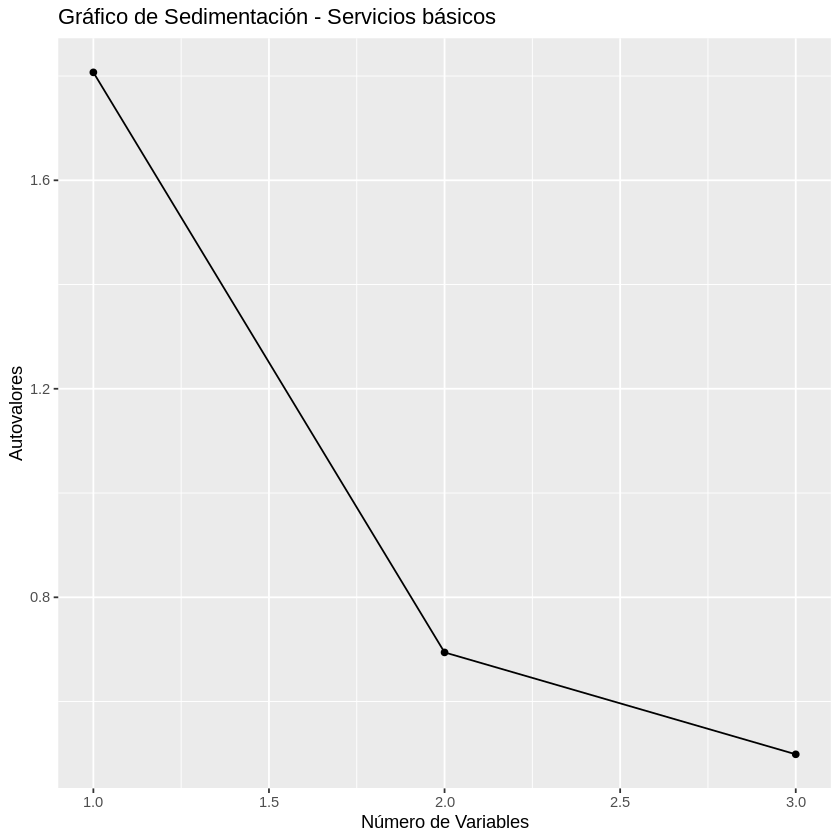

In [ ]:
# Graficar el gráfico de sedimentación (Scree plot)
library(ggplot2)

sedimentacion <- ggplot(data = tabla_autovalores, aes(x = Numero_de_Variables, y = Autovalores)) +
  geom_point() +
  geom_line() +
  labs(x = "Número de Variables", y = "Autovalores", title = "Gráfico de Sedimentación - Servicios básicos")

print(sedimentacion)


**Paso 2 (Servicios básicos) : Proceso de cuantificación de categorías de las variables**

Se procede a tener los valores iniciales de cada categoría:

In [ ]:
resultados_d2$quantifications

,D1
1,-0.001956546
2,0.005655144
3,0.005655144
4,0.015305129
,D1
1,-0.003355962
2,0.003826261
3,0.003826261
4,0.004694248
5,0.006147362


In [ ]:
print("Valores asignados a p110R-Agua:")
v1_p110R<-resultados_d2$quantifications$BasePC.p110R
v1_p110R

print("Valores asignados a p111aR-Baño servicios higiénicos:")
v1_p111aR<-resultados_d2$quantifications$BasePC.p111aR
v1_p111aR

print("Valores asignados a p1121R - Tipo alumbrado eléctrico:")
v1_p1121R<-resultados_d2$quantifications$BasePC.p1121R
v1_p1121R



[1] "Valores asignados a p110R-Agua:"


,D1
1,-0.001956546
2,0.005655144
3,0.005655144
4,0.015305129


[1] "Valores asignados a p111aR-Baño servicios higiénicos:"


,D1
1,-0.003355962
2,0.003826261
3,0.003826261
4,0.004694248
5,0.006147362


[1] "Valores asignados a p1121R - Tipo alumbrado eléctrico:"


,D1
1,-0.001040315
2,0.014764441


**Paso 3 (Servicios básicos) : Formando el valor mínimo de cero**

In [ ]:
print("Valores asignados a p110R-Agua:")
v1_p110R<-v1_p110R-min(v1_p110R)
v1_p110R

print("Valores asignados a p111aR-Baño servicios higiénicos:")
v1_p111aR<-v1_p111aR-min(v1_p111aR)
v1_p111aR

print("Valores asignados a p1121R - Tipo alumbrado eléctrico:")
v1_p1121R<-v1_p1121R-min(v1_p1121R)
v1_p1121R


[1] "Valores asignados a p110R-Agua:"


,D1
1,0.000000000
2,0.007611689
3,0.007611689
4,0.017261675


[1] "Valores asignados a p111aR-Baño servicios higiénicos:"


,D1
1,0.000000000
2,0.007182224
3,0.007182224
4,0.008050211
5,0.009503325


[1] "Valores asignados a p1121R - Tipo alumbrado eléctrico:"


,D1
1,0.00000000
2,0.01580476


**Paso 4 (Servicios básicos) : Ubicando valores máximos**

Se procede a identificar los máximos para hallar el indicador que permitirá que se llegue al máximo de 100.

In [ ]:
maximos_variables=c(
max(v1_p110R),
max(v1_p111aR),
max(v1_p1121R)
)

suma_maximos<-sum(maximos_variables)
suma_maximos


#Dado que se quiere tener como máximo 100 puntos, se ve un índice de escalamiento
indice_escalamiento<-100/suma_maximos
indice_escalamiento

[1] 0.04256976

[1] 2349.086

**Paso 5 (Servicios básicos) : Llegando a los puntajes finales**

Se multiplica por el índice para tener los puntajes finales:

In [ ]:
print("Valores asignados a p110R-Agua:")
v1_p110R<-v1_p110R*indice_escalamiento
v1_p110R

print("Valores asignados a p111aR-Baño servicios higiénicos:")
v1_p111aR<-v1_p111aR*indice_escalamiento
v1_p111aR

print("Valores asignados a p1121R - Tipo alumbrado eléctrico:")
v1_p1121R<-v1_p1121R*indice_escalamiento
v1_p1121R

[1] "Valores asignados a p110R-Agua:"


,D1
1,0.00000
2,17.88051
3,17.88051
4,40.54915


[1] "Valores asignados a p111aR-Baño servicios higiénicos:"


,D1
1,0.00000
2,16.87166
3,16.87166
4,18.91063
5,22.32412


[1] "Valores asignados a p1121R - Tipo alumbrado eléctrico:"


,D1
1,0.00000
2,37.12673


Con estos valores, se tiene:

**p110R**: El agua que utilizan en el hogar

| Código Variable | Etiqueta | Puntaje |
| --- | --- | --- |
| 1 | Red pública dentro de la vivienda | 0.00000
| 2 | Camión cisterna,pozo |  17.88051
| 3 | Red pública fuera de la vivienda, pilón,otras | 17.88051
| 4 | Manantial, rio,lago, lagunas, otros | 40.54915

**p111aR**: El baño o servicio higiénico que tiene su hogar esta conectado a

| Código Variable | Etiqueta | Puntaje |
| --- | --- | --- |
| 1 | Red pública de desague dentro del hogar | 0.00000
| 2 | Red pública de desague fuera del hogar  | 16.87166
| 3 | Letrina | 16.87166
| 4 | Pozo  | 18.91063
| 5 | Río acequia, campo abierto,otro | 22.32412


**p1121R**: Tipo de alumbrado del hogar: Electricidad

| Código Variable | Etiqueta | Puntaje |
| --- | --- | --- |
| 1 | Con electricidad| 0.00000
| 2 | Sin electricidad | 37.12673

**Paso 6 (Servicios básicos) : Cálculo del índice**

Se procese a calcular el índice

In [ ]:
#Puntaje para la p110R-Agua
BaseR$P_p110R[BaseR$p110R==1] <- 0.00000
BaseR$P_p110R[BaseR$p110R==2] <- 17.88051
BaseR$P_p110R[BaseR$p110R==3] <- 17.88051
BaseR$P_p110R[BaseR$p110R==4] <- 40.54915

In [ ]:
#Puntaje para la p111aR-Baño servicios hig
BaseR$P_p111aR[BaseR$p111aR==1] <- 0.00000
BaseR$P_p111aR[BaseR$p111aR==2] <- 16.87166
BaseR$P_p111aR[BaseR$p111aR==3] <- 16.87166
BaseR$P_p111aR[BaseR$p111aR==4] <- 18.91063
BaseR$P_p111aR[BaseR$p111aR==5] <- 22.32412

In [ ]:
#Puntaje para la p1121R - Tipo alumbrado eléctrico
BaseR$P_p1121R[BaseR$p1121R==1] <- 0.00000
BaseR$P_p1121R[BaseR$p1121R==2] <- 37.12673

In [ ]:
BaseR$Indice_Vulnerabilidad_ServBasicos<-BaseR$P_p110R+
BaseR$P_p111aR+
BaseR$P_p1121R

**Paso 7 (Servicios básicos) : Análisis Descriptivos del índice**

Se muestra el análisis descriptivo:

In [ ]:
library(Hmisc)
library(plyr)
Media_Nacional_ServBasicos<-wtd.mean(BaseR$Indice_Vulnerabilidad_ServBasicos, BaseR$FACTOR07, na.rm=T)

In [ ]:
#Mostrando el resultado
print(paste("El índice de vulnerabilidad a nivel nacional en servicios básicos es:", Media_Nacional_ServBasicos))


[1] "El índice de vulnerabilidad a nivel nacional en servicios básicos es: 11.862173311837"


Ahora los resultados por urbano y rural:

In [ ]:
library(Hmisc)
library(plyr)
Salidas_Indice_Ambito_SerBasicos <- ddply(BaseR,~Ambito,summarise,
              Media=wtd.mean(Indice_Vulnerabilidad_ServBasicos,FACTOR07, na.rm=T)
           )

Salidas_Indice_Ambito_SerBasicos

Ambito,Media
<chr>,<dbl>
Rural,29.142952
Urbano,7.229447


Ahora los resultados por departamentos:

In [ ]:
library(Hmisc)
library(plyr)
Salidas_Indice_Departamento_SerBasicos <- ddply(BaseR,~Departamento,summarise,
              Media=wtd.mean(Indice_Vulnerabilidad_ServBasicos,FACTOR07, na.rm=T)
           )

Salidas_Indice_Departamento_SerBasicos

Departamento,Media
<chr>,<dbl>
AMAZONAS,17.898822
ANCASH,10.745899
APURIMAC,13.281701
AREQUIPA,11.343296
AYACUCHO,16.005370
CAJAMARCA,16.698274
CALLAO,3.182653
CUSCO,15.979906
HUANCAVELICA,20.890944


**Paso 8 (Servicios básicos) : Análisis Clúster**

Con ello se tiene el análisis clúster con esta mirada:

In [ ]:
# Se usa una semilla
set.seed(123)
# Se aplicar k-medias
k <- 3
kmeans_result_ServBasicos <- kmeans(Salidas_Indice_Departamento_SerBasicos$Media, centers = k)
# Asignar cada departamento a un segmento
Salidas_Indice_Departamento_SerBasicos$Segmento <- as.factor(kmeans_result_ServBasicos$cluster)

In [ ]:
#Se muestran los resultados
Salidas_Indice_Departamento_SerBasicos

Departamento,Media,Segmento
<chr>,<dbl>,<fct>
AMAZONAS,17.898822,3
ANCASH,10.745899,1
APURIMAC,13.281701,3
AREQUIPA,11.343296,1
AYACUCHO,16.005370,3
CAJAMARCA,16.698274,3
CALLAO,3.182653,1
CUSCO,15.979906,3
HUANCAVELICA,20.890944,2


**4.2.3 Análisis de componentes principales categóricos- Servicios de tecnología**:

Ahora se procede con el cálculo del índice para la tercera dimensión, que trabajará con las siguientes variables:

| Nombre de Variable | Etiqueta de variable | Dimensión
| --- | --- | --- |
| p1141R | Su hogar tiene: Teléfono (fijo) | C. Servicios de teconología |
| p1142R | Su hogar tiene: Teléfono Celular | C. Servicios de teconología |
| p1143R | Su hogar tiene: Conexión a TV | C. Servicios de teconología |
| p1144R | Su hogar tiene: Conexión a Internet | C. Servicios de teconología |


**Paso 1 (Servicios de tecnología) : Aplicación del análsis de componentes principales categóricos**

In [ ]:
# Suponiendo que ya tienes los resultados de princals en la variable "resultados"
library("Gifi")
df3<-data.frame(BasePC$p1141R,BasePC$p1142R,BasePC$p1143R,BasePC$p1144R)
resultados_d3<-princals(df3,ndim = 1,ordinal = TRUE)

In [ ]:
resultados_d3$evals

[1] 1.6567551 0.9939811 0.7043845 0.6448793

En este caso los tres criterios nos dan directrices distintas, el valor del autovalor nos indica que se debe tomar un componente, de acuerdo al porcentaje explicado se recomienda 2 y con el gráfico de sedimentación se puede tomar 1 o 2; por lo tanto, se optará por tomar un solo componente.

In [ ]:
# Calcular el porcentaje de varianza explicada por cada autovalor
porcentaje_varianza <- resultados_d3$evals / sum(resultados_d3$evals)

# Creando la tabla
tabla_autovalores <- data.frame(
  Numero_de_Variables = 1:length(resultados_d3$evals),
  Autovalores = resultados_d3$evals,
  Porcentaje = porcentaje_varianza
)

# Se imprime la tabla
tabla_autovalores

Numero_de_Variables,Autovalores,Porcentaje
<int>,<dbl>,<dbl>
1,1.6567551,0.4141888
2,0.9939811,0.2484953
3,0.7043845,0.1760961
4,0.6448793,0.1612198


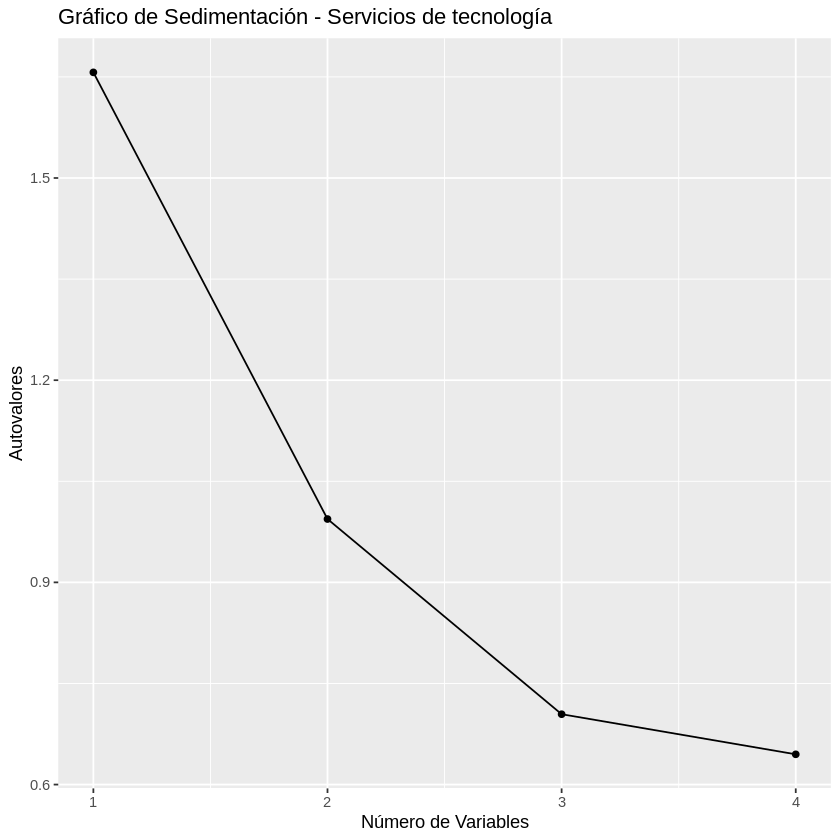

In [ ]:

# Graficar el gráfico de sedimentación (Scree plot)
library(ggplot2)

sedimentacion <- ggplot(data = tabla_autovalores, aes(x = Numero_de_Variables, y = Autovalores)) +
  geom_point() +
  geom_line() +
  labs(x = "Número de Variables", y = "Autovalores", title = "Gráfico de Sedimentación - Servicios de tecnología")

print(sedimentacion)



**Paso 2 (Servicios de tecnología) : Proceso de cuantificación de categorías de las variables**



Revisamos los números asignados a cada categoría:

In [ ]:
resultados_d3$quantifications

,D1
1,0.010962459
2,-0.001011446
,D1
1,0.0006971367
2,-0.0094566046
,D1
1,0.005744772
2,-0.002487172
,D1
1,0.003998793


In [ ]:
print("Valores asignados a p1141R-Tenencia teléfono fijo:")
v1_p1141R<-resultados_d3$quantifications$BasePC.p1141R*(-1)
v1_p1141R

print("Valores asignados a p1142R-Tenencia teléfono celular:")
v1_p1142R<-resultados_d3$quantifications$BasePC.p1142R*(-1)
v1_p1142R

print("Valores asignados a p1143R -Tenencia TV cable:")
v1_p1143R<-resultados_d3$quantifications$BasePC.p1143R*(-1)
v1_p1143R

print("Valores asignados a p1144R-Tenencia de internet:")
v1_p1144R<-resultados_d3$quantifications$BasePC.p1144R*(-1)
v1_p1144R

[1] "Valores asignados a p1141R-Tenencia teléfono fijo:"


,D1
1,-0.010962459
2,0.001011446


[1] "Valores asignados a p1142R-Tenencia teléfono celular:"


,D1
1,-0.0006971367
2,0.0094566046


[1] "Valores asignados a p1143R -Tenencia TV cable:"


,D1
1,-0.005744772
2,0.002487172


[1] "Valores asignados a p1144R-Tenencia de internet:"


,D1
1,-0.003998793
2,0.004115239



**Paso 3 (Servicios de tecnología) : Formando el valor mínimo de cero**

In [ ]:
#Restando el valor mínimo a todos
print("Valores asignados a p1141R-Tenencia teléfono fijo:")
v1_p1141R<-v1_p1141R-min(v1_p1141R)
v1_p1141R

print("Valores asignados a p1142R-Tenencia teléfono celular:")
v1_p1142R<-v1_p1142R-min(v1_p1142R)
v1_p1142R

print("Valores asignados a p1143R -Tenencia TV cable:")
v1_p1143R<-v1_p1143R-min(v1_p1143R)
v1_p1143R

print("Valores asignados a p1144R-Tenencia de internet:")
v1_p1144R<-v1_p1144R-min(v1_p1144R)
v1_p1144R

[1] "Valores asignados a p1141R-Tenencia teléfono fijo:"


,D1
1,0.0000000
2,0.0119739


[1] "Valores asignados a p1142R-Tenencia teléfono celular:"


,D1
1,0.00000000
2,0.01015374


[1] "Valores asignados a p1143R -Tenencia TV cable:"


,D1
1,0.000000000
2,0.008231944


[1] "Valores asignados a p1144R-Tenencia de internet:"


,D1
1,0.000000000
2,0.008114032


**Paso 4 (Servicios tecnológicos) : Ubicando valores máximos**

Se ubica el máximo para poder llegar al puntaje de 100 puntos.

In [ ]:
maximos_variables=c(
max(v1_p1141R),
max(v1_p1142R),
max(v1_p1143R),
max(v1_p1144R)
)

suma_maximos<-sum(maximos_variables)
suma_maximos


#Dado que se quiere tener como máximo 100 puntos, se ve un índice de escalamiento
indice_escalamiento<-100/suma_maximos
indice_escalamiento

[1] 0.03847362

[1] 2599.183

**Paso 5 (Servicios tecnológicos) : Llegando a los puntajes finales**

In [ ]:
#Restando el valor mínimo a todos
print("Valores asignados a p1141R-Tenencia teléfono fijo:")
v1_p1141R<-v1_p1141R*indice_escalamiento
v1_p1141R

print("Valores asignados a p1142R-Tenencia teléfono celular:")
v1_p1142R<-v1_p1142R*indice_escalamiento
v1_p1142R

print("Valores asignados a p1143R -Tenencia TV cable:")
v1_p1143R<-v1_p1143R*indice_escalamiento
v1_p1143R

print("Valores asignados a p1144R-Tenencia de internet:")
v1_p1144R<-v1_p1144R*indice_escalamiento
v1_p1144R

[1] "Valores asignados a p1141R-Tenencia teléfono fijo:"


,D1
1,0.00000
2,31.12237


[1] "Valores asignados a p1142R-Tenencia teléfono celular:"


,D1
1,0.00000
2,26.39144


[1] "Valores asignados a p1143R -Tenencia TV cable:"


,D1
1,0.00000
2,21.39633


[1] "Valores asignados a p1144R-Tenencia de internet:"


,D1
1,0.00000
2,21.08986


Con ello los puntajes quedan como sigue:

**p1141R**: Su hogar tiene: Teléfono fijo

| Código Variable | Etiqueta | Puntaje
| --- | --- |--- |
| 1 | Con teléfono fijo | 0.00000
| 2 | Sin teléfono fijo| 31.12237

**p1142R**: Su hogar tiene: Teléfono celular

| Código Variable | Etiqueta | Puntaje
| --- | --- |--- |
| 1 | Con Teléfono celular | 0.00000
| 2 | Sin Teléfono celular| 26.39144


**p1143R**: Su hogar tiene: tv cable

| Código Variable | Etiqueta | Puntaje
| --- | --- |--- |
| 1 | Con Tv cable | 0.00000
| 2 | Sin Tv cable| 21.39633

**p1144R**: Su hogar tiene: internet

| Código Variable | Etiqueta | Puntaje
| --- | --- |--- |
| 1 | Con internet | 0.00000
| 2 | Sin Internet| 21.08986


**Paso 6 (Servicios de tecnología) : Cálculo del índice**

Ya con los valores finales se procede al cálculo de indice de vulnerabilidad para la dimensión de Servicios de tecnología:

In [ ]:
#Puntaje para la p1141R-Tenencia teléfono fijo
BaseR$P_p1141R[BaseR$p1141R==1] <- 0.00000
BaseR$P_p1141R[BaseR$p1141R==2] <- 31.12237

In [ ]:
#Puntaje para la p1142R-Tenencia teléfono celular
BaseR$P_p1142R[BaseR$p1142R==1] <- 0.00000
BaseR$P_p1142R[BaseR$p1142R==2] <- 26.39144

In [ ]:
#Puntaje para la p1143R-Tenencia TV Cable
BaseR$P_p1143R[BaseR$p1143R==1] <- 0.00000
BaseR$P_p1143R[BaseR$p1143R==2] <- 21.39633

In [ ]:
#Puntaje para la p1144R-Tenencia internet
BaseR$P_p1144R[BaseR$p1144R==1] <- 0.00000
BaseR$P_p1144R[BaseR$p1144R==2] <- 21.08986

In [ ]:
BaseR$Indice_Vulnerabilidad_ServTecnologico<-BaseR$P_p1141R+
BaseR$P_p1142R+
BaseR$P_p1143R+BaseR$P_p1144R

**Paso 7 (Servicios de tecnología) : Análisis Descriptivos del índice**

Vemos el resultado a nivel nacional

In [ ]:
library(Hmisc)
library(plyr)
Media_Nacional_ServTecnologico<-wtd.mean(BaseR$Indice_Vulnerabilidad_ServTecnologico, BaseR$FACTOR07, na.rm=T)

In [ ]:
#Mostrando el resultado
print(paste("El índice de vulnerabilidad de servicios tecnológicos a nivel nacional es:", Media_Nacional_ServTecnologico))

[1] "El índice de vulnerabilidad de servicios tecnológicos a nivel nacional es: 53.4680552735602"


Se revisa el índice por ámbito:

In [ ]:

library(Hmisc)
library(plyr)
Salidas_Indice_Ambito_ServTenologico <- ddply(BaseR,~Ambito,summarise,
              Media=wtd.mean(Indice_Vulnerabilidad_ServTecnologico,FACTOR07, na.rm=T)
           )

Salidas_Indice_Ambito_ServTenologico

Ambito,Media
<chr>,<dbl>
Rural,70.61080
Urbano,48.87233


Luego por departamentos

In [ ]:

library(Hmisc)
library(plyr)
Salidas_Indice_Departamento_ServTecnologico <- ddply(BaseR,~Departamento,summarise,
              Media=wtd.mean(Indice_Vulnerabilidad_ServTecnologico,FACTOR07, na.rm=T)
           )

Salidas_Indice_Departamento_ServTecnologico

Departamento,Media
<chr>,<dbl>
AMAZONAS,60.54033
ANCASH,54.71614
APURIMAC,65.34963
AREQUIPA,50.16935
AYACUCHO,64.48627
CAJAMARCA,64.97657
CALLAO,45.09279
CUSCO,64.36061
HUANCAVELICA,68.26392


**Paso 8 (Servicios tecnológicos) : Análisis Clúster**

In [ ]:
# Se usa una semilla
set.seed(123)
# Se aplicar k-medias
k <- 3
kmeans_result_ServTecnologico <- kmeans(Salidas_Indice_Departamento_ServTecnologico$Media, centers = k)
# Asignar cada departamento a un segmento
Salidas_Indice_Departamento_ServTecnologico$Segmento <- as.factor(kmeans_result_ServTecnologico$cluster)

In [ ]:
#Se muestran los resultados
Salidas_Indice_Departamento_ServTecnologico

Departamento,Media,Segmento
<chr>,<dbl>,<fct>
AMAZONAS,60.54033,2
ANCASH,54.71614,3
APURIMAC,65.34963,2
AREQUIPA,50.16935,3
AYACUCHO,64.48627,2
CAJAMARCA,64.97657,2
CALLAO,45.09279,1
CUSCO,64.36061,2
HUANCAVELICA,68.26392,2


**4.2.4 Índice de vulnerabilidad global:**

De acuerdo con la bibliografía revisada, una opción viable es asignar un peso igual a todas las dimensiones; por lo tanto, el promedio de los puntajes de las dimensiones proporcionará el índice de vulnerabilidad global.

In [ ]:
BaseR$Indice_Vulnerabilidad<-(BaseR$Indice_Vulnerabilidad_Vivienda+
  BaseR$Indice_Vulnerabilidad_ServBasicos+
  BaseR$Indice_Vulnerabilidad_ServTecnologico
  )/3

Por lo tanto el resultado a nivel general es:

In [ ]:
library(Hmisc)
library(plyr)
Media_Indice_Vulnerabilidad<-wtd.mean(BaseR$Indice_Vulnerabilidad, BaseR$FACTOR07, na.rm=T)

In [ ]:
#Mostrando el resultado
print(paste("El índice de vulnerabilidad a nivel nacional es:", Media_Indice_Vulnerabilidad))

[1] "El índice de vulnerabilidad a nivel nacional es: 36.2671847784534"


Por ámbito:

In [ ]:
library(Hmisc)
library(plyr)
Salidas_Indice_Ambito <- ddply(BaseR,~Ambito,summarise,
              Media=wtd.mean(Indice_Vulnerabilidad,FACTOR07, na.rm=T)
           )

Salidas_Indice_Ambito

Ambito,Media
<chr>,<dbl>
Rural,54.61109
Urbano,31.34945


Por departamento

In [ ]:
library(Hmisc)
library(plyr)
Salidas_Indice_Departamento <- ddply(BaseR,~Departamento,summarise,
              Media=wtd.mean(Indice_Vulnerabilidad,FACTOR07, na.rm=T)
           )

Salidas_Indice_Departamento

Departamento,Media
<chr>,<dbl>
AMAZONAS,45.24397
ANCASH,38.70444
APURIMAC,45.76335
AREQUIPA,32.08233
AYACUCHO,46.15583
CAJAMARCA,46.48216
CALLAO,27.21853
CUSCO,45.94303
HUANCAVELICA,50.58642


También para este caso se empleará un análisis clúster para los departamentos, pero tomando en cuenta las 3 dimensiones:

In [ ]:
# Crear un data frame con las variables de interés
TablaDepartamento <- data.frame(
  Departamentos = Salidas_Indice_Departamento_Vivienda$Departamento,
  Vivienda = Salidas_Indice_Departamento_Vivienda$Media,
  Basicos = Salidas_Indice_Departamento_SerBasicos$Media,
  Tecnologicos = Salidas_Indice_Departamento_ServTecnologico$Media
)

# Imprimir el data frame resultante
TablaDepartamento


Departamentos,Vivienda,Basicos,Tecnologicos
<chr>,<dbl>,<dbl>,<dbl>
AMAZONAS,57.29276,17.898822,60.54033
ANCASH,50.65128,10.745899,54.71614
APURIMAC,58.65871,13.281701,65.34963
AREQUIPA,34.73435,11.343296,50.16935
AYACUCHO,57.97584,16.005370,64.48627
CAJAMARCA,57.77165,16.698274,64.97657
CALLAO,33.38016,3.182653,45.09279
CUSCO,57.48856,15.979906,64.36061
HUANCAVELICA,62.60440,20.890944,68.26392


In [ ]:
# Se usa una semilla
set.seed(123)

# Aplicar k-medias a las variables de interés
k <- 3
kmeans_result <- kmeans(TablaDepartamento[, c("Vivienda", "Basicos", "Tecnologicos")], centers = k)

# Se agrega la columna de segmento al data frame TablaDepartamento
TablaDepartamento$Segmento <- as.factor(kmeans_result$cluster)

# Se muestra el dataframe:
TablaDepartamento


Departamentos,Vivienda,Basicos,Tecnologicos,Segmento
<chr>,<dbl>,<dbl>,<dbl>,<fct>
AMAZONAS,57.29276,17.898822,60.54033,2
ANCASH,50.65128,10.745899,54.71614,3
APURIMAC,58.65871,13.281701,65.34963,2
AREQUIPA,34.73435,11.343296,50.16935,1
AYACUCHO,57.97584,16.005370,64.48627,2
CAJAMARCA,57.77165,16.698274,64.97657,2
CALLAO,33.38016,3.182653,45.09279,1
CUSCO,57.48856,15.979906,64.36061,2
HUANCAVELICA,62.60440,20.890944,68.26392,2


# 5. ÁRBOLES DE CLASIFICACIÓN

El objetivo de esta parte es poder usar los resultados de los índices: de vivienda, acceso a servicios básicos y servivios de acceso tecnológicos para construir un algoritmo para poder predecir si un hogar es altamente vulnerable.

Lo primero que se hará es aplicar un clúster para poder clasificar a los hogares en bajo, medio y altamente vulnerable:

In [ ]:
# Se usa una semilla
set.seed(123)

# Aplicar k-medias a las variables de interés
k <- 3
kmeans_hogares <- kmeans(BaseR[, c("Indice_Vulnerabilidad_Vivienda", "Indice_Vulnerabilidad_ServBasicos", "Indice_Vulnerabilidad_ServTecnologico")], centers = k)

# Se agrega la columna de segmento al data frame TablaDepartamento
BaseR$Segmento <- as.factor(kmeans_hogares$cluster)


In [ ]:
head(BaseR)

,Departamento,Ambito,FACTOR07,p101R,p102R,p103R,p103aR,p110R,p111aR,p1121R,⋯,P_p111aR,P_p1121R,Indice_Vulnerabilidad_ServBasicos,P_p1141R,P_p1142R,P_p1143R,P_p1144R,Indice_Vulnerabilidad_ServTecnologico,Indice_Vulnerabilidad,Segmento
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,AMAZONAS,Urbano,106.8902,2,1,3,3,1,1,1,⋯,0.00000,0,0.00000,31.12237,0,0.00000,21.08986,52.21223,31.96340,3
2,AMAZONAS,Urbano,106.8902,2,1,2,3,1,1,1,⋯,0.00000,0,0.00000,31.12237,0,0.00000,0.00000,31.12237,21.85302,1
3,AMAZONAS,Urbano,106.8902,2,1,5,3,1,1,1,⋯,0.00000,0,0.00000,31.12237,0,21.39633,0.00000,52.51870,35.18431,3
4,AMAZONAS,Urbano,106.8902,2,1,3,1,1,1,1,⋯,0.00000,0,0.00000,31.12237,0,0.00000,21.08986,52.21223,27.33474,1
5,AMAZONAS,Urbano,106.8902,2,3,3,3,1,1,1,⋯,0.00000,0,0.00000,31.12237,0,0.00000,21.08986,52.21223,36.61262,3
6,AMAZONAS,Urbano,158.3513,2,3,3,3,1,4,1,⋯,18.91063,0,18.91063,31.12237,0,21.39633,0.00000,52.51870,43.01832,3


In [ ]:
#PARA LOS INDICES DE VULNERABILIDAD DE VIVIENDAS
library(dplyr)

# Vulnerabilidad en viviendas: Segmento1
promedio_vivienda_1 <- BaseR %>%
  filter(Segmento == 1) %>%
  summarise(
    Promedio_Vivienda = weighted.mean(Indice_Vulnerabilidad_Vivienda, FACTOR07, na.rm = TRUE)
  )
# Vulnerabilidad en viviendas: Segmento2
promedio_vivienda_2 <- BaseR %>%
  filter(Segmento == 2) %>%
  summarise(
    Promedio_Vivienda = weighted.mean(Indice_Vulnerabilidad_Vivienda, FACTOR07, na.rm = TRUE)
  )
# Vulnerabilidad en viviendas: Segmento3
promedio_vivienda_3 <- BaseR %>%
  filter(Segmento == 3) %>%
  summarise(
    Promedio_Vivienda = weighted.mean(Indice_Vulnerabilidad_Vivienda, FACTOR07, na.rm = TRUE)
  )

#Se muestra los resultados
print(paste("El promedio del índice de vivienda del segmento 1 es:", promedio_vivienda_1))
print(paste("El promedio del índice de vivienda del segmento 2 es:", promedio_vivienda_2))
print(paste("El promedio del índice de vivienda del segmento 3 es:", promedio_vivienda_3))

#**********************************************************************************************************

#PARA LOS INDICES DE VULNERABILIDAD DE SERVICIOS BÁSICOS
library(dplyr)

# Vulnerabilidad en servicios básicos: Segmento1
promedio_basicos_1 <- BaseR %>%
  filter(Segmento == 1) %>%
  summarise(
    Promedio_basicos = weighted.mean(Indice_Vulnerabilidad_ServBasicos, FACTOR07, na.rm = TRUE)
  )
# Vulnerabilidad en servicios básicos: Segmento2
promedio_basicos_2 <- BaseR %>%
  filter(Segmento == 2) %>%
  summarise(
    Promedio_basicos = weighted.mean(Indice_Vulnerabilidad_ServBasicos, FACTOR07, na.rm = TRUE)
  )
# Vulnerabilidad en servicios básicos: Segmento3
promedio_basicos_3 <- BaseR %>%
  filter(Segmento == 3) %>%
  summarise(
    Promedio_basicos = weighted.mean(Indice_Vulnerabilidad_ServBasicos, FACTOR07, na.rm = TRUE)
  )

#Se muestra los resultados
print(paste("El promedio del índice de servicios básicos del segmento 1 es:", promedio_basicos_1))
print(paste("El promedio del índice de servicios básicos del segmento 2 es:", promedio_basicos_2))
print(paste("El promedio del índice de servicios básicos del segmento 3 es:", promedio_basicos_3))


#**********************************************************************************************************

#PARA LOS INDICES DE VULNERABILIDAD DE SERVICIOS TECNOLOGICOS
library(dplyr)

# Vulnerabilidad en servicios tecnológicos: Segmento1
promedio_tecnologicos_1 <- BaseR %>%
  filter(Segmento == 1) %>%
  summarise(
    Promedio_tecnologicos = weighted.mean(Indice_Vulnerabilidad_ServTecnologico, FACTOR07, na.rm = TRUE)
  )
# Vulnerabilidad en servicios tecnológicos: Segmento2
promedio_tecnologicos_2 <- BaseR %>%
  filter(Segmento == 2) %>%
  summarise(
    Promedio_tecnologicos = weighted.mean(Indice_Vulnerabilidad_ServTecnologico, FACTOR07, na.rm = TRUE)
  )
# Vulnerabilidad en servicios tecnológicos: Segmento3
promedio_tecnologicos_3 <- BaseR %>%
  filter(Segmento == 3) %>%
  summarise(
    Promedio_tecnologicos = weighted.mean(Indice_Vulnerabilidad_ServTecnologico, FACTOR07, na.rm = TRUE)
  )

#Se muestra los resultados
print(paste("El promedio del índice de servicios tecnológicos del segmento 1 es:", promedio_tecnologicos_1))
print(paste("El promedio del índice de servicios tecnológicos del segmento 2 es:", promedio_tecnologicos_2))
print(paste("El promedio del índice de servicios tecnológicos del segmento 3 es:", promedio_tecnologicos_3))


[1] "El promedio del índice de vivienda del segmento 1 es: 25.6694771855682"
[1] "El promedio del índice de vivienda del segmento 2 es: 67.2642818340773"
[1] "El promedio del índice de vivienda del segmento 3 es: 55.3656106489188"
[1] "El promedio del índice de servicios básicos del segmento 1 es: 2.44483889581586"
[1] "El promedio del índice de servicios básicos del segmento 2 es: 71.4597682208648"
[1] "El promedio del índice de servicios básicos del segmento 3 es: 12.9402971354578"
[1] "El promedio del índice de servicios tecnológicos del segmento 1 es: 34.620421523755"
[1] "El promedio del índice de servicios tecnológicos del segmento 2 es: 76.3764043540535"
[1] "El promedio del índice de servicios tecnológicos del segmento 3 es: 66.3142189948896"


Por lo tanto, el segmento de alta vulnerabilidad es el segmento 2 a ellos lo pondremos como uno en la variable vulnerabilidad:

In [ ]:
# Crear la variable "vulnerabilidad"
BaseR$vulnerabilidad <- ifelse(BaseR$Segmento == 2, 1, 0)

# Imprimir los primeros registros para verificar
head(BaseR)


,Departamento,Ambito,FACTOR07,p101R,p102R,p103R,p103aR,p110R,p111aR,p1121R,⋯,P_p1121R,Indice_Vulnerabilidad_ServBasicos,P_p1141R,P_p1142R,P_p1143R,P_p1144R,Indice_Vulnerabilidad_ServTecnologico,Indice_Vulnerabilidad,Segmento,vulnerabilidad
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,AMAZONAS,Urbano,106.8902,2,1,3,3,1,1,1,⋯,0,0.00000,31.12237,0,0.00000,21.08986,52.21223,31.96340,3,0
2,AMAZONAS,Urbano,106.8902,2,1,2,3,1,1,1,⋯,0,0.00000,31.12237,0,0.00000,0.00000,31.12237,21.85302,1,0
3,AMAZONAS,Urbano,106.8902,2,1,5,3,1,1,1,⋯,0,0.00000,31.12237,0,21.39633,0.00000,52.51870,35.18431,3,0
4,AMAZONAS,Urbano,106.8902,2,1,3,1,1,1,1,⋯,0,0.00000,31.12237,0,0.00000,21.08986,52.21223,27.33474,1,0
5,AMAZONAS,Urbano,106.8902,2,3,3,3,1,1,1,⋯,0,0.00000,31.12237,0,0.00000,21.08986,52.21223,36.61262,3,0
6,AMAZONAS,Urbano,158.3513,2,3,3,3,1,4,1,⋯,0,18.91063,31.12237,0,21.39633,0.00000,52.51870,43.01832,3,0


In [ ]:
# Calcular la frecuencia de la variable "vulnerabilidad"
frecuencia_vulnerabilidad <- table(BaseR$vulnerabilidad)

# Imprimir la frecuencia
print(frecuencia_vulnerabilidad)



    0     1 
31088  3125 


Al revisar la frecuencia de la variable objetivo, se observa que no es balanceada; por lo tanto, primero se creará un conjunto de datos balanceado. Se seleccionarán los 3125 hogares vulnerables y 3125 hogares no vulnerables (en forma aleatoria). Posteriormente, se trabajará con este conjunto de datos balanceado para construir los árboles de clasificación

In [ ]:
# Se forma la base de hogares vulnerables
BaseR_vulnerable <- BaseR[BaseR$vulnerabilidad == 1, c("p101R", "p102R", "p103R", "p103aR", "p110R", "p111aR", "p1121R", "p1141R", "p1142R", "p1143R", "p1144R","vulnerabilidad")]
# Se muestra los resultados
head(BaseR_vulnerable)


,p101R,p102R,p103R,p103aR,p110R,p111aR,p1121R,p1141R,p1142R,p1143R,p1144R,vulnerabilidad
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
18,2,3,5,3,4,4,1,2,1,2,2,1
22,2,3,3,3,4,4,1,2,1,1,2,1
206,2,3,5,4,4,5,1,2,1,2,2,1
358,2,3,5,4,4,4,1,2,1,1,2,1
380,2,3,5,3,2,4,2,2,2,2,2,1
476,2,4,4,3,1,4,2,2,1,2,2,1


In [ ]:
#Se queda con los hogares no vulnerables
BaseR_NoVulnerable <- BaseR[BaseR$vulnerabilidad == 0, ]

# Se procede a seleccionar aleatoriamente 3125 casos
set.seed(42)  # Fijar una semilla
indices_muestra <- sample(1:nrow(BaseR_NoVulnerable), 3125)

# Crear el dataframe BaseR_NoVulnerable con las variables especificadas
BaseR_NoVulnerable <- BaseR_NoVulnerable[indices_muestra, c("p101R", "p102R", "p103R", "p103aR", "p110R", "p111aR", "p1121R", "p1141R", "p1142R", "p1143R", "p1144R","vulnerabilidad")]

# Ver los primeros registros del nuevo dataframe
head(BaseR_NoVulnerable)


,p101R,p102R,p103R,p103aR,p110R,p111aR,p1121R,p1141R,p1142R,p1143R,p1144R,vulnerabilidad
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
29898,2,1,3,1,1,1,1,2,1,2,1,0
31524,2,4,4,3,1,4,1,2,1,2,2,0
20606,2,4,3,3,1,1,1,2,1,1,1,0
23785,2,1,3,1,1,1,1,2,1,2,1,0
10210,2,1,3,3,1,1,1,2,1,1,2,0
1334,2,1,3,1,1,1,1,2,1,2,2,0


In [ ]:
# Unir los dataframes BaseR_vulnerable y BaseR_NoVulnerable
BaseArboles <- rbind(BaseR_vulnerable, BaseR_NoVulnerable)

In [ ]:
# Se convierte la variable "vulnerabilidad" en factor binario
BaseArboles$vulnerabilidad <- factor(BaseArboles$vulnerabilidad, levels = c(0, 1), labels = c("No", "Sí"))
# Calcular la frecuencia de la variable "vulnerabilidad"
frecuencia_vulnerabilidad <- table(BaseArboles$vulnerabilidad)
# Imprimir la frecuencia
print(frecuencia_vulnerabilidad)


  No   Sí 
3125 3125 


In [ ]:
#Se instala los paquetes
install.packages("caret")
install.packages("rpart")
install.packages("rpart.plot")
install.packages("e1071")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



          Overall
p101R    27.03563
p102R   660.87784
p103aR   16.74259
p103R   807.47883
p110R  1782.01596
p111aR 1170.30022
p1121R 1475.20021
p1142R   66.44458
p1144R   61.89705
p1141R    0.00000
p1143R    0.00000
Confusion Matrix and Statistics

          Reference
Prediction  No  Sí
        No 929   7
        Sí   8 930
                                          
               Accuracy : 0.992           
                 95% CI : (0.9868, 0.9955)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.984           
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9925          
            Specificity : 0.9915          
         Pos Pred Value : 0.9915          
         Neg Pred Value : 0.9925          
             Prevalence : 0.5000          
         Detection Rate : 0.4

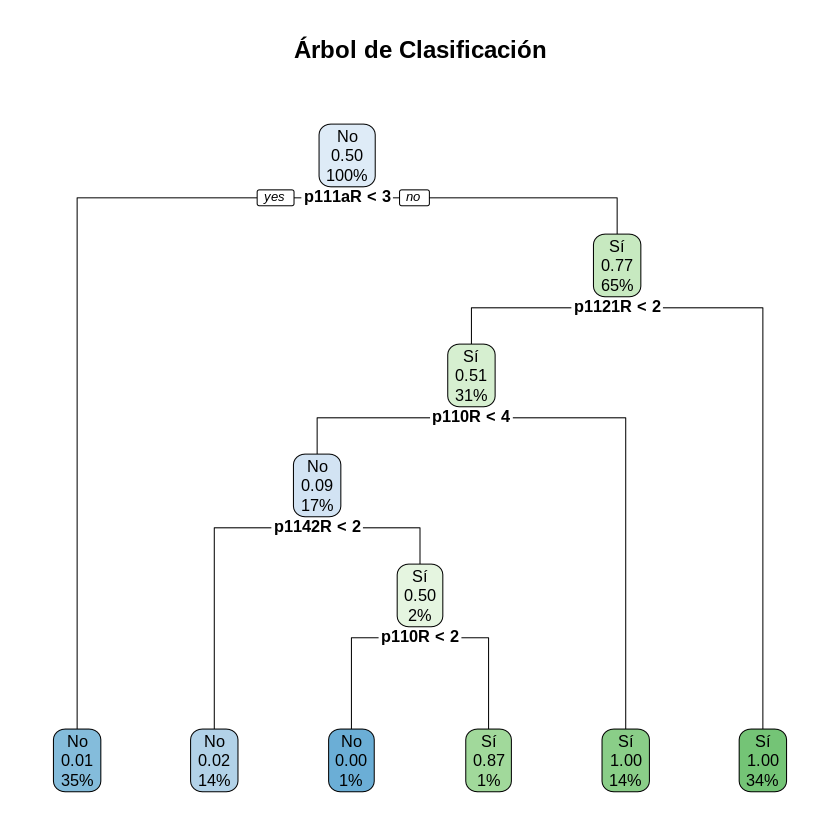

In [ ]:
#Se define las librerias que seran de utilidad para esta parte
library(rpart)
library(rpart.plot)
library(caret)
library(e1071)

# Paso 1: Se divide los datos en conjuntos de entrenamiento y prueba
set.seed(123) # Para reproducibilidad
indices_entrenamiento <- createDataPartition(BaseArboles$vulnerabilidad, p = 0.7, list = FALSE)
datos_entrenamiento <- BaseArboles[indices_entrenamiento, ]
datos_prueba <- BaseArboles[-indices_entrenamiento, ]

# Paso 2: Se entrena el modelo de árbol de clasificación
modelo_arbol <- rpart(vulnerabilidad ~ p101R + p102R + p103R + p103aR + p110R + p111aR + p1121R + p1141R + p1142R + p1143R + p1144R, data = datos_entrenamiento, method = "class")

# Paso 3: Evaluar el modelo
predicciones <- predict(modelo_arbol, datos_prueba, type = "class")
confusion_matrix <- confusionMatrix(predicciones, datos_prueba$vulnerabilidad, positive = "Sí")

# Paso 4: Visualizar el árbol de clasificación
rpart.plot(modelo_arbol, main = "Árbol de Clasificación")

# Visualizar la importancia de las variables
var_importance <- varImp(modelo_arbol)
print(var_importance)

# Mostrar la matriz de confusión y otros indicadores de desempeño
print(confusion_matrix)


In [ ]:
reglas <- rpart.rules(modelo_arbol)
print(reglas)

 vulnerabilidad                                                               
           0.00 when p111aR >= 3 & p1121R <  2 & p110R <  2      & p1142R >= 2
           0.01 when p111aR <  3                                              
           0.02 when p111aR >= 3 & p1121R <  2 & p110R <  4      & p1142R <  2
           0.87 when p111aR >= 3 & p1121R <  2 & p110R is 2 to 4 & p1142R >= 2
           1.00 when p111aR >= 3 & p1121R <  2 & p110R >=      4              
           1.00 when p111aR >= 3 & p1121R >= 2                                
